### Linear Algebra, Calculus, and Gradient Descent

#### Objectives
* Use operations with vectors and matrices to solve systems of linear equations
* Identify and describe of scalars, vectors,  matrices, using appropriate mathematical jargon
* Set up and solve systems of linear equations with real life examples
* Describe gradient descent in relation to slope, derivatives, and step size


## Why Linear Algebra?

Linear Algebra is the basis of many machine learning models.

Data is usually already set up into a matrix by default!

<img src= "./resources/dataset.jpeg">

It can be used to model complicated things like language

<img src = "./resources/Word-Vectors.png">

Important for image compression and recognition

<img src = "./resources/images.gif">

Recommendation engines are able to make much more sophisticated recommendations by using linear algebra in conjunction with user and content data.

<img src = "./resources/netflix.png">

### Group 1: using code to explain vectors and scalars

In [1]:
import numpy as np

## Vectors

An array with magnitude and direction. The coordinates of a vector represent where the tip of the vector would be if you travelled from the origin.


Operations with vectores
Assume

$ \vec{v} = \begin{bmatrix}v_{1} \\v_{2}\end{bmatrix} $


$ \vec{w} = \begin{bmatrix}w_{1} \\w_{2}\end{bmatrix} $

$ \vec{v} + \vec{w} = \begin{bmatrix}v_{1} + w_{1} \\v_{2} + w_{2}\end{bmatrix} $

What is happening graphically? Let's look at an example:


In [2]:

import numpy as np
v = np.array([2, 4])
w = np.array([3, 2])
v + w

array([5, 6])

#### Scalars

Have magnitude only. Can be multiplied by a vector or matrix to create a change in **scale** and/or direction.

What scalars would you need to change the direction of a vector?

In [3]:
v * 4

array([ 8, 16])

### Group 2: Desmos to explore vectors and scalars

[link to fun desmos interaction](https://www.desmos.com/calculator/yovo2ro9me)

To capture the relationship between (*a, b*), to capture the _direction_ rather than the length, what mathematical concept would you use?

### Group 3: Youtube vid

[Link to good video on scalars and vectors](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

## Linear Combination
If $v_{1},...,v_{n}$ are vectors and $a_{1},...,a_{n}$ are scalars, then the linear combination of those vectors with those scalars as coefficients is

<img src = "./resources/linear_combinations.svg"> 

### Dot Product

Can be thought of as one vector projected onto another

The dot product of v and w is $v \cdot w = (v_{1})(w_{2}) + (v_{1})(w_{2}) $

### _**Details of dot product for those who are interested**_

If v and w are perpendicular ($90^\circ$), their dot product will be 0.

If the angle between v and w is < $90^\circ$, the dot product will be positive.

If the angle between v and w is between $90^\circ$ and $180^\circ$, the dot product will be negative.





“The scalar projection of A onto B multiplied by the magnitude of B”

“The scalar projection of B onto A multiplied by the magnitude of A”

<img src = "./resources/dot_product.png">

<img src = "./resources/dot_product_components.png">

We are essentially, rotating vectors to the point of 
a · b = |a| × |b| × cos(θ)

Analogy from https://www.youtube.com/watch?v=FrDAU2N0FEg

In [4]:
v.dot(w)

14

## Application of dot product:

Imagine you are an e-commerce company. You have vectors to represent the transactions made with one of your items. Q is the quantity and represent the amount of cash either bought or sold.

$ Income = (q_{1},q_{2},q_{3})\cdot (p_{1},p_{2},p_{3}) $

What story is this telling?

In [5]:
q = np.array([4,6,10])
p = np.array([50,-30,45])

q.dot(p)

470

Wait, does that look familiar somehow?

## Slide break!

[Gradient slide](https://www.youtube.com/watch?v=vWFjqgb-ylQ)

**Good video on details of gradient decent**

https://www.youtube.com/watch?v=sDv4f4s2SB8

### Gradient Descent


[slide deck!](https://docs.google.com/presentation/d/15sZl0yjwrjXkOSftImmAlEOgJxB7Qc8e2vocvMUkRWI/edit?usp=sharing)

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [17]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [18]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 25)
m, n = np.shape(x)

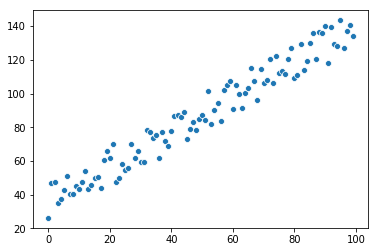

In [19]:
sns.scatterplot(x=x[:,1], y=y)

In [20]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

Iteration 0 | Cost: 180.018811
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 179.833001
[1.90690265 1.53886625]
Iteration 2 | Cost: 179.744934
[1.90783058 1.54195225]
Iteration 3 | Cost: 179.700951
[1.90874315 1.54402036]
Iteration 4 | Cost: 179.676850
[1.90964538 1.54540489]
Iteration 5 | Cost: 179.661718
[1.91054067 1.54633035]
Iteration 6 | Cost: 179.650630
[1.91143129 1.5469475 ]
Iteration 7 | Cost: 179.641367
[1.91231876 1.5473576 ]
Iteration 8 | Cost: 179.632926
[1.91320412 1.54762865]
Iteration 9 | Cost: 179.624857
[1.91408805 1.54780632]
Iteration 10 | Cost: 179.616956
[1.914971   1.54792127]
Iteration 11 | Cost: 179.609131
[1.9158533  1.54799411]
Iteration 12 | Cost: 179.601340
[1.91673516 1.54803867]
Iteration 13 | Cost: 179.593565
[1.9176167  1.54806423]
Iteration 14 | Cost: 179.585797
[1.91849803 1.54807703]
Iteration 15 | Cost: 179.578033
[1.91937921 1.54808127]
Iteration 16 | Cost: 179.570270
[1.92026027 1.54807975]
Iteration 17 | Cost: 179.562509
[1.92114126 1.54807437]
It

Iteration 334 | Cost: 177.122028
[2.19925338 1.54389756]
Iteration 335 | Cost: 177.114391
[2.20012717 1.54388439]
Iteration 336 | Cost: 177.106755
[2.20100094 1.54387122]
Iteration 337 | Cost: 177.099119
[2.20187468 1.54385804]
Iteration 338 | Cost: 177.091483
[2.20274841 1.54384487]
Iteration 339 | Cost: 177.083848
[2.20362211 1.5438317 ]
Iteration 340 | Cost: 177.076213
[2.20449579 1.54381853]
Iteration 341 | Cost: 177.068579
[2.20536944 1.54380535]
Iteration 342 | Cost: 177.060945
[2.20624308 1.54379218]
Iteration 343 | Cost: 177.053311
[2.20711669 1.54377901]
Iteration 344 | Cost: 177.045678
[2.20799028 1.54376584]
Iteration 345 | Cost: 177.038045
[2.20886385 1.54375267]
Iteration 346 | Cost: 177.030413
[2.2097374 1.5437395]
Iteration 347 | Cost: 177.022780
[2.21061092 1.54372633]
Iteration 348 | Cost: 177.015149
[2.21148442 1.54371316]
Iteration 349 | Cost: 177.007517
[2.2123579  1.54369999]
Iteration 350 | Cost: 176.999887
[2.21323136 1.54368682]
Iteration 351 | Cost: 176.992256


Iteration 715 | Cost: 174.240306
[2.53056773 1.53890249]
Iteration 716 | Cost: 174.232815
[2.53143311 1.53888944]
Iteration 717 | Cost: 174.225325
[2.53229847 1.5388764 ]
Iteration 718 | Cost: 174.217835
[2.53316382 1.53886335]
Iteration 719 | Cost: 174.210346
[2.53402913 1.5388503 ]
Iteration 720 | Cost: 174.202857
[2.53489443 1.53883726]
Iteration 721 | Cost: 174.195368
[2.5357597  1.53882421]
Iteration 722 | Cost: 174.187880
[2.53662496 1.53881117]
Iteration 723 | Cost: 174.180392
[2.53749019 1.53879812]
Iteration 724 | Cost: 174.172905
[2.5383554  1.53878508]
Iteration 725 | Cost: 174.165418
[2.53922058 1.53877203]
Iteration 726 | Cost: 174.157931
[2.54008575 1.53875899]
Iteration 727 | Cost: 174.150445
[2.54095089 1.53874595]
Iteration 728 | Cost: 174.142959
[2.54181601 1.5387329 ]
Iteration 729 | Cost: 174.135473
[2.54268111 1.53871986]
Iteration 730 | Cost: 174.127988
[2.54354619 1.53870682]
Iteration 731 | Cost: 174.120503
[2.54441124 1.53869378]
Iteration 732 | Cost: 174.11301

Iteration 1101 | Cost: 171.377029
[2.86297993 1.53389086]
Iteration 1102 | Cost: 171.369684
[2.86383688 1.53387794]
Iteration 1103 | Cost: 171.362339
[2.86469381 1.53386502]
Iteration 1104 | Cost: 171.354995
[2.86555072 1.5338521 ]
Iteration 1105 | Cost: 171.347651
[2.8664076  1.53383919]
Iteration 1106 | Cost: 171.340307
[2.86726447 1.53382627]
Iteration 1107 | Cost: 171.332964
[2.86812131 1.53381335]
Iteration 1108 | Cost: 171.325621
[2.86897813 1.53380043]
Iteration 1109 | Cost: 171.318278
[2.86983493 1.53378751]
Iteration 1110 | Cost: 171.310936
[2.8706917 1.5337746]
Iteration 1111 | Cost: 171.303594
[2.87154846 1.53376168]
Iteration 1112 | Cost: 171.296252
[2.87240519 1.53374876]
Iteration 1113 | Cost: 171.288911
[2.8732619  1.53373585]
Iteration 1114 | Cost: 171.281570
[2.87411859 1.53372293]
Iteration 1115 | Cost: 171.274230
[2.87497526 1.53371001]
Iteration 1116 | Cost: 171.266890
[2.87583191 1.5336971 ]
Iteration 1117 | Cost: 171.259550
[2.87668853 1.53368418]
Iteration 1118 |

[3.19215258 1.52892808]
Iteration 1488 | Cost: 168.562087
[3.19300118 1.52891528]
Iteration 1489 | Cost: 168.554884
[3.19384976 1.52890249]
Iteration 1490 | Cost: 168.547682
[3.19469832 1.5288897 ]
Iteration 1491 | Cost: 168.540481
[3.19554685 1.5288769 ]
Iteration 1492 | Cost: 168.533279
[3.19639536 1.52886411]
Iteration 1493 | Cost: 168.526078
[3.19724386 1.52885132]
Iteration 1494 | Cost: 168.518878
[3.19809233 1.52883853]
Iteration 1495 | Cost: 168.511678
[3.19894077 1.52882573]
Iteration 1496 | Cost: 168.504478
[3.1997892  1.52881294]
Iteration 1497 | Cost: 168.497278
[3.20063761 1.52880015]
Iteration 1498 | Cost: 168.490079
[3.20148599 1.52878736]
Iteration 1499 | Cost: 168.482881
[3.20233435 1.52877457]
Iteration 1500 | Cost: 168.475682
[3.20318269 1.52876178]
Iteration 1501 | Cost: 168.468484
[3.20403101 1.52874899]
Iteration 1502 | Cost: 168.461287
[3.20487931 1.5287362 ]
Iteration 1503 | Cost: 168.454089
[3.20572759 1.52872341]
Iteration 1504 | Cost: 168.446892
[3.20657584 1.

Iteration 1898 | Cost: 165.639540
[3.53911909 1.52369702]
Iteration 1899 | Cost: 165.632486
[3.53995889 1.52368436]
Iteration 1900 | Cost: 165.625433
[3.54079866 1.5236717 ]
Iteration 1901 | Cost: 165.618379
[3.54163842 1.52365904]
Iteration 1902 | Cost: 165.611326
[3.54247815 1.52364638]
Iteration 1903 | Cost: 165.604274
[3.54331786 1.52363372]
Iteration 1904 | Cost: 165.597221
[3.54415755 1.52362106]
Iteration 1905 | Cost: 165.590169
[3.54499722 1.5236084 ]
Iteration 1906 | Cost: 165.583118
[3.54583686 1.52359574]
Iteration 1907 | Cost: 165.576067
[3.54667649 1.52358308]
Iteration 1908 | Cost: 165.569016
[3.54751609 1.52357042]
Iteration 1909 | Cost: 165.561965
[3.54835568 1.52355777]
Iteration 1910 | Cost: 165.554915
[3.54919524 1.52354511]
Iteration 1911 | Cost: 165.547865
[3.55003478 1.52353245]
Iteration 1912 | Cost: 165.540816
[3.5508743  1.52351979]
Iteration 1913 | Cost: 165.533767
[3.5517138  1.52350714]
Iteration 1914 | Cost: 165.526718
[3.55255327 1.52349448]
Iteration 1915

[3.88082412 1.51854529]
Iteration 2308 | Cost: 162.777168
[3.88165524 1.51853276]
Iteration 2309 | Cost: 162.770260
[3.88248635 1.51852023]
Iteration 2310 | Cost: 162.763351
[3.88331743 1.5185077 ]
Iteration 2311 | Cost: 162.756443
[3.8841485  1.51849517]
Iteration 2312 | Cost: 162.749535
[3.88497954 1.51848264]
Iteration 2313 | Cost: 162.742628
[3.88581056 1.51847011]
Iteration 2314 | Cost: 162.735721
[3.88664156 1.51845759]
Iteration 2315 | Cost: 162.728814
[3.88747254 1.51844506]
Iteration 2316 | Cost: 162.721907
[3.8883035  1.51843253]
Iteration 2317 | Cost: 162.715001
[3.88913443 1.51842   ]
Iteration 2318 | Cost: 162.708096
[3.88996535 1.51840747]
Iteration 2319 | Cost: 162.701190
[3.89079625 1.51839495]
Iteration 2320 | Cost: 162.694285
[3.89162712 1.51838242]
Iteration 2321 | Cost: 162.687381
[3.89245797 1.51836989]
Iteration 2322 | Cost: 162.680476
[3.8932888  1.51835737]
Iteration 2323 | Cost: 162.673572
[3.89411961 1.51834484]
Iteration 2324 | Cost: 162.666669
[3.8949504  1.

[4.21571123 1.51349635]
Iteration 2713 | Cost: 160.007570
[4.21653386 1.51348395]
Iteration 2714 | Cost: 160.000801
[4.21735647 1.51347155]
Iteration 2715 | Cost: 159.994033
[4.21817906 1.51345915]
Iteration 2716 | Cost: 159.987266
[4.21900163 1.51344674]
Iteration 2717 | Cost: 159.980499
[4.21982418 1.51343434]
Iteration 2718 | Cost: 159.973732
[4.2206467  1.51342194]
Iteration 2719 | Cost: 159.966965
[4.22146921 1.51340954]
Iteration 2720 | Cost: 159.960199
[4.22229169 1.51339714]
Iteration 2721 | Cost: 159.953433
[4.22311415 1.51338474]
Iteration 2722 | Cost: 159.946667
[4.2239366  1.51337234]
Iteration 2723 | Cost: 159.939902
[4.22475902 1.51335994]
Iteration 2724 | Cost: 159.933137
[4.22558142 1.51334754]
Iteration 2725 | Cost: 159.926373
[4.2264038  1.51333515]
Iteration 2726 | Cost: 159.919608
[4.22722616 1.51332275]
Iteration 2727 | Cost: 159.912845
[4.2280485  1.51331035]
Iteration 2728 | Cost: 159.906081
[4.22887081 1.51329795]
Iteration 2729 | Cost: 159.899318
[4.22969311 1.

Iteration 3115 | Cost: 157.314202
[4.54554636 1.50852358]
Iteration 3116 | Cost: 157.307570
[4.54636062 1.5085113 ]
Iteration 3117 | Cost: 157.300939
[4.54717486 1.50849903]
Iteration 3118 | Cost: 157.294308
[4.54798908 1.50848675]
Iteration 3119 | Cost: 157.287677
[4.54880328 1.50847448]
Iteration 3120 | Cost: 157.281047
[4.54961746 1.5084622 ]
Iteration 3121 | Cost: 157.274417
[4.55043162 1.50844993]
Iteration 3122 | Cost: 157.267787
[4.55124576 1.50843765]
Iteration 3123 | Cost: 157.261158
[4.55205987 1.50842538]
Iteration 3124 | Cost: 157.254529
[4.55287397 1.5084131 ]
Iteration 3125 | Cost: 157.247900
[4.55368805 1.50840083]
Iteration 3126 | Cost: 157.241272
[4.5545021  1.50838856]
Iteration 3127 | Cost: 157.234644
[4.55531614 1.50837628]
Iteration 3128 | Cost: 157.228017
[4.55613015 1.50836401]
Iteration 3129 | Cost: 157.221389
[4.55694414 1.50835174]
Iteration 3130 | Cost: 157.214762
[4.55775812 1.50833947]
Iteration 3131 | Cost: 157.208136
[4.55857207 1.5083272 ]
Iteration 3132

Iteration 3492 | Cost: 154.837769
[4.85106357 1.50391744]
Iteration 3493 | Cost: 154.831263
[4.85187008 1.50390528]
Iteration 3494 | Cost: 154.824758
[4.85267657 1.50389312]
Iteration 3495 | Cost: 154.818252
[4.85348304 1.50388096]
Iteration 3496 | Cost: 154.811747
[4.85428949 1.5038688 ]
Iteration 3497 | Cost: 154.805243
[4.85509592 1.50385664]
Iteration 3498 | Cost: 154.798738
[4.85590233 1.50384448]
Iteration 3499 | Cost: 154.792234
[4.85670871 1.50383233]
Iteration 3500 | Cost: 154.785730
[4.85751508 1.50382017]
Iteration 3501 | Cost: 154.779227
[4.85832143 1.50380801]
Iteration 3502 | Cost: 154.772724
[4.85912776 1.50379586]
Iteration 3503 | Cost: 154.766221
[4.85993406 1.5037837 ]
Iteration 3504 | Cost: 154.759719
[4.86074035 1.50377154]
Iteration 3505 | Cost: 154.753217
[4.86154661 1.50375939]
Iteration 3506 | Cost: 154.746715
[4.86235286 1.50374723]
Iteration 3507 | Cost: 154.740214
[4.86315908 1.50373508]
Iteration 3508 | Cost: 154.733713
[4.86396528 1.50372292]
Iteration 3509

[5.18640798 1.4988616 ]
Iteration 3911 | Cost: 152.140465
[5.18720598 1.49884957]
Iteration 3912 | Cost: 152.134096
[5.18800396 1.49883754]
Iteration 3913 | Cost: 152.127727
[5.18880193 1.49882551]
Iteration 3914 | Cost: 152.121359
[5.18959987 1.49881348]
Iteration 3915 | Cost: 152.114991
[5.19039779 1.49880145]
Iteration 3916 | Cost: 152.108623
[5.19119569 1.49878942]
Iteration 3917 | Cost: 152.102255
[5.19199357 1.49877739]
Iteration 3918 | Cost: 152.095888
[5.19279143 1.49876536]
Iteration 3919 | Cost: 152.089521
[5.19358927 1.49875333]
Iteration 3920 | Cost: 152.083155
[5.19438709 1.4987413 ]
Iteration 3921 | Cost: 152.076789
[5.19518489 1.49872928]
Iteration 3922 | Cost: 152.070423
[5.19598267 1.49871725]
Iteration 3923 | Cost: 152.064057
[5.19678043 1.49870522]
Iteration 3924 | Cost: 152.057692
[5.19757817 1.49869319]
Iteration 3925 | Cost: 152.051327
[5.19837589 1.49868117]
Iteration 3926 | Cost: 152.044962
[5.19917359 1.49866914]
Iteration 3927 | Cost: 152.038598
[5.19997127 1.

Iteration 4344 | Cost: 149.412641
[5.53084571 1.49366867]
Iteration 4345 | Cost: 149.406410
[5.53163497 1.49365677]
Iteration 4346 | Cost: 149.400180
[5.53242422 1.49364487]
Iteration 4347 | Cost: 149.393950
[5.53321344 1.49363298]
Iteration 4348 | Cost: 149.387720
[5.53400265 1.49362108]
Iteration 4349 | Cost: 149.381490
[5.53479183 1.49360918]
Iteration 4350 | Cost: 149.375261
[5.53558099 1.49359728]
Iteration 4351 | Cost: 149.369033
[5.53637014 1.49358538]
Iteration 4352 | Cost: 149.362804
[5.53715926 1.49357349]
Iteration 4353 | Cost: 149.356576
[5.53794837 1.49356159]
Iteration 4354 | Cost: 149.350348
[5.53873745 1.49354969]
Iteration 4355 | Cost: 149.344120
[5.53952651 1.4935378 ]
Iteration 4356 | Cost: 149.337893
[5.54031556 1.4935259 ]
Iteration 4357 | Cost: 149.331666
[5.54110458 1.493514  ]
Iteration 4358 | Cost: 149.325440
[5.54189358 1.49350211]
Iteration 4359 | Cost: 149.319213
[5.54268257 1.49349021]
Iteration 4360 | Cost: 149.312987
[5.54347153 1.49347832]
Iteration 4361

[5.85042732 1.48885049]
Iteration 4752 | Cost: 146.896581
[5.85120848 1.48883871]
Iteration 4753 | Cost: 146.890478
[5.85198961 1.48882693]
Iteration 4754 | Cost: 146.884375
[5.85277073 1.48881516]
Iteration 4755 | Cost: 146.878273
[5.85355183 1.48880338]
Iteration 4756 | Cost: 146.872171
[5.8543329 1.4887916]
Iteration 4757 | Cost: 146.866069
[5.85511396 1.48877983]
Iteration 4758 | Cost: 146.859967
[5.855895   1.48876805]
Iteration 4759 | Cost: 146.853866
[5.85667601 1.48875628]
Iteration 4760 | Cost: 146.847765
[5.85745701 1.4887445 ]
Iteration 4761 | Cost: 146.841665
[5.85823799 1.48873273]
Iteration 4762 | Cost: 146.835564
[5.85901895 1.48872096]
Iteration 4763 | Cost: 146.829464
[5.85979988 1.48870918]
Iteration 4764 | Cost: 146.823365
[5.8605808  1.48869741]
Iteration 4765 | Cost: 146.817265
[5.8613617  1.48868563]
Iteration 4766 | Cost: 146.811166
[5.86214258 1.48867386]
Iteration 4767 | Cost: 146.805068
[5.86292344 1.48866209]
Iteration 4768 | Cost: 146.798969
[5.86370428 1.48

[6.17986642 1.48388368]
Iteration 5176 | Cost: 144.336464
[6.18063921 1.48387203]
Iteration 5177 | Cost: 144.330491
[6.18141199 1.48386038]
Iteration 5178 | Cost: 144.324518
[6.18218475 1.48384873]
Iteration 5179 | Cost: 144.318546
[6.18295749 1.48383708]
Iteration 5180 | Cost: 144.312573
[6.18373021 1.48382543]
Iteration 5181 | Cost: 144.306602
[6.18450291 1.48381378]
Iteration 5182 | Cost: 144.300630
[6.18527559 1.48380213]
Iteration 5183 | Cost: 144.294659
[6.18604825 1.48379048]
Iteration 5184 | Cost: 144.288688
[6.18682089 1.48377884]
Iteration 5185 | Cost: 144.282717
[6.18759351 1.48376719]
Iteration 5186 | Cost: 144.276746
[6.18836611 1.48375554]
Iteration 5187 | Cost: 144.270776
[6.18913869 1.48374389]
Iteration 5188 | Cost: 144.264807
[6.18991126 1.48373224]
Iteration 5189 | Cost: 144.258837
[6.1906838 1.4837206]
Iteration 5190 | Cost: 144.252868
[6.19145632 1.48370895]
Iteration 5191 | Cost: 144.246899
[6.19222883 1.4836973 ]
Iteration 5192 | Cost: 144.240930
[6.19300131 1.48

[6.50195763 1.47902766]
Iteration 5595 | Cost: 141.860075
[6.50272226 1.47901614]
Iteration 5596 | Cost: 141.854227
[6.50348686 1.47900461]
Iteration 5597 | Cost: 141.848380
[6.50425145 1.47899308]
Iteration 5598 | Cost: 141.842533
[6.50501602 1.47898155]
Iteration 5599 | Cost: 141.836686
[6.50578057 1.47897003]
Iteration 5600 | Cost: 141.830840
[6.5065451 1.4789585]
Iteration 5601 | Cost: 141.824994
[6.50730961 1.47894697]
Iteration 5602 | Cost: 141.819148
[6.5080741  1.47893545]
Iteration 5603 | Cost: 141.813303
[6.50883857 1.47892392]
Iteration 5604 | Cost: 141.807458
[6.50960302 1.4789124 ]
Iteration 5605 | Cost: 141.801613
[6.51036745 1.47890087]
Iteration 5606 | Cost: 141.795769
[6.51113186 1.47888935]
Iteration 5607 | Cost: 141.789924
[6.51189625 1.47887782]
Iteration 5608 | Cost: 141.784080
[6.51266063 1.4788663 ]
Iteration 5609 | Cost: 141.778237
[6.51342498 1.47885478]
Iteration 5610 | Cost: 141.772393
[6.51418932 1.47884325]
Iteration 5611 | Cost: 141.766550
[6.51495363 1.47

Iteration 6013 | Cost: 139.441505
[6.82064295 1.47422299]
Iteration 6014 | Cost: 139.435780
[6.82139949 1.47421158]
Iteration 6015 | Cost: 139.430056
[6.82215601 1.47420018]
Iteration 6016 | Cost: 139.424332
[6.82291251 1.47418877]
Iteration 6017 | Cost: 139.418608
[6.823669   1.47417737]
Iteration 6018 | Cost: 139.412884
[6.82442546 1.47416596]
Iteration 6019 | Cost: 139.407161
[6.8251819  1.47415456]
Iteration 6020 | Cost: 139.401438
[6.82593833 1.47414315]
Iteration 6021 | Cost: 139.395715
[6.82669474 1.47413175]
Iteration 6022 | Cost: 139.389993
[6.82745112 1.47412035]
Iteration 6023 | Cost: 139.384270
[6.82820749 1.47410894]
Iteration 6024 | Cost: 139.378549
[6.82896384 1.47409754]
Iteration 6025 | Cost: 139.372827
[6.82972017 1.47408614]
Iteration 6026 | Cost: 139.367106
[6.83047648 1.47407473]
Iteration 6027 | Cost: 139.361385
[6.83123277 1.47406333]
Iteration 6028 | Cost: 139.355664
[6.83198904 1.47405193]
Iteration 6029 | Cost: 139.349944
[6.83274529 1.47404053]
Iteration 6030

[7.10450253 1.46994337]
Iteration 6391 | Cost: 137.298112
[7.10525187 1.46993207]
Iteration 6392 | Cost: 137.292496
[7.10600119 1.46992078]
Iteration 6393 | Cost: 137.286881
[7.10675049 1.46990948]
Iteration 6394 | Cost: 137.281265
[7.10749977 1.46989818]
Iteration 6395 | Cost: 137.275650
[7.10824904 1.46988689]
Iteration 6396 | Cost: 137.270035
[7.10899828 1.46987559]
Iteration 6397 | Cost: 137.264421
[7.1097475  1.46986429]
Iteration 6398 | Cost: 137.258806
[7.11049671 1.469853  ]
Iteration 6399 | Cost: 137.253192
[7.11124589 1.4698417 ]
Iteration 6400 | Cost: 137.247579
[7.11199506 1.46983041]
Iteration 6401 | Cost: 137.241965
[7.11274421 1.46981911]
Iteration 6402 | Cost: 137.236352
[7.11349334 1.46980782]
Iteration 6403 | Cost: 137.230739
[7.11424245 1.46979653]
Iteration 6404 | Cost: 137.225127
[7.11499154 1.46978523]
Iteration 6405 | Cost: 137.219514
[7.11574061 1.46977394]
Iteration 6406 | Cost: 137.213902
[7.11648967 1.46976265]
Iteration 6407 | Cost: 137.208291
[7.1172387  1.

[7.39159705 1.46561498]
Iteration 6776 | Cost: 135.156881
[7.3923391  1.46560379]
Iteration 6777 | Cost: 135.151373
[7.39308114 1.4655926 ]
Iteration 6778 | Cost: 135.145866
[7.39382315 1.46558142]
Iteration 6779 | Cost: 135.140359
[7.39456515 1.46557023]
Iteration 6780 | Cost: 135.134853
[7.39530713 1.46555904]
Iteration 6781 | Cost: 135.129347
[7.39604909 1.46554786]
Iteration 6782 | Cost: 135.123841
[7.39679103 1.46553667]
Iteration 6783 | Cost: 135.118335
[7.39753296 1.46552548]
Iteration 6784 | Cost: 135.112830
[7.39827486 1.4655143 ]
Iteration 6785 | Cost: 135.107325
[7.39901675 1.46550311]
Iteration 6786 | Cost: 135.101820
[7.39975861 1.46549193]
Iteration 6787 | Cost: 135.096315
[7.40050046 1.46548074]
Iteration 6788 | Cost: 135.090811
[7.40124229 1.46546956]
Iteration 6789 | Cost: 135.085307
[7.4019841  1.46545838]
Iteration 6790 | Cost: 135.079803
[7.40272589 1.46544719]
Iteration 6791 | Cost: 135.074300
[7.40346766 1.46543601]
Iteration 6792 | Cost: 135.068797
[7.40420941 1.

[7.67590087 1.46132866]
Iteration 7161 | Cost: 133.057074
[7.67663571 1.46131758]
Iteration 7162 | Cost: 133.051673
[7.67737054 1.4613065 ]
Iteration 7163 | Cost: 133.046273
[7.67810534 1.46129542]
Iteration 7164 | Cost: 133.040872
[7.67884013 1.46128434]
Iteration 7165 | Cost: 133.035472
[7.67957489 1.46127327]
Iteration 7166 | Cost: 133.030073
[7.68030964 1.46126219]
Iteration 7167 | Cost: 133.024673
[7.68104437 1.46125111]
Iteration 7168 | Cost: 133.019274
[7.68177908 1.46124004]
Iteration 7169 | Cost: 133.013875
[7.68251378 1.46122896]
Iteration 7170 | Cost: 133.008477
[7.68324845 1.46121788]
Iteration 7171 | Cost: 133.003078
[7.6839831  1.46120681]
Iteration 7172 | Cost: 132.997680
[7.68471774 1.46119573]
Iteration 7173 | Cost: 132.992282
[7.68545236 1.46118466]
Iteration 7174 | Cost: 132.986885
[7.68618696 1.46117358]
Iteration 7175 | Cost: 132.981488
[7.68692154 1.46116251]
Iteration 7176 | Cost: 132.976091
[7.6876561  1.46115143]
Iteration 7177 | Cost: 132.970694
[7.68839064 1.

Iteration 7554 | Cost: 130.955528
[7.96398976 1.45698527]
Iteration 7555 | Cost: 130.950234
[7.96471729 1.45697431]
Iteration 7556 | Cost: 130.944940
[7.96544481 1.45696334]
Iteration 7557 | Cost: 130.939646
[7.9661723  1.45695237]
Iteration 7558 | Cost: 130.934353
[7.96689978 1.4569414 ]
Iteration 7559 | Cost: 130.929060
[7.96762724 1.45693043]
Iteration 7560 | Cost: 130.923767
[7.96835468 1.45691947]
Iteration 7561 | Cost: 130.918475
[7.9690821 1.4569085]
Iteration 7562 | Cost: 130.913182
[7.9698095  1.45689753]
Iteration 7563 | Cost: 130.907890
[7.97053689 1.45688657]
Iteration 7564 | Cost: 130.902599
[7.97126425 1.4568756 ]
Iteration 7565 | Cost: 130.897307
[7.9719916  1.45686463]
Iteration 7566 | Cost: 130.892016
[7.97271893 1.45685367]
Iteration 7567 | Cost: 130.886725
[7.97344624 1.4568427 ]
Iteration 7568 | Cost: 130.881434
[7.97417353 1.45683174]
Iteration 7569 | Cost: 130.876144
[7.97490081 1.45682077]
Iteration 7570 | Cost: 130.870854
[7.97562806 1.45680981]
Iteration 7571 |

Iteration 7950 | Cost: 128.879908
[8.25065373 1.45266337]
Iteration 7951 | Cost: 128.874719
[8.25137399 1.45265251]
Iteration 7952 | Cost: 128.869531
[8.25209423 1.45264166]
Iteration 7953 | Cost: 128.864342
[8.25281445 1.4526308 ]
Iteration 7954 | Cost: 128.859154
[8.25353466 1.45261994]
Iteration 7955 | Cost: 128.853966
[8.25425484 1.45260908]
Iteration 7956 | Cost: 128.848779
[8.25497501 1.45259822]
Iteration 7957 | Cost: 128.843592
[8.25569516 1.45258737]
Iteration 7958 | Cost: 128.838405
[8.25641529 1.45257651]
Iteration 7959 | Cost: 128.833218
[8.2571354  1.45256565]
Iteration 7960 | Cost: 128.828031
[8.2578555 1.4525548]
Iteration 7961 | Cost: 128.822845
[8.25857558 1.45254394]
Iteration 7962 | Cost: 128.817659
[8.25929563 1.45253308]
Iteration 7963 | Cost: 128.812474
[8.26001567 1.45252223]
Iteration 7964 | Cost: 128.807288
[8.2607357  1.45251137]
Iteration 7965 | Cost: 128.802103
[8.2614557  1.45250052]
Iteration 7966 | Cost: 128.796918
[8.26217568 1.45248966]
Iteration 7967 |

Iteration 8356 | Cost: 126.794735
[8.54158175 1.44827718]
Iteration 8357 | Cost: 126.789652
[8.54229463 1.44826644]
Iteration 8358 | Cost: 126.784569
[8.54300749 1.44825569]
Iteration 8359 | Cost: 126.779487
[8.54372033 1.44824494]
Iteration 8360 | Cost: 126.774404
[8.54443316 1.4482342 ]
Iteration 8361 | Cost: 126.769322
[8.54514596 1.44822345]
Iteration 8362 | Cost: 126.764240
[8.54585875 1.4482127 ]
Iteration 8363 | Cost: 126.759159
[8.54657152 1.44820196]
Iteration 8364 | Cost: 126.754078
[8.54728427 1.44819121]
Iteration 8365 | Cost: 126.748997
[8.54799701 1.44818046]
Iteration 8366 | Cost: 126.743916
[8.54870972 1.44816972]
Iteration 8367 | Cost: 126.738836
[8.54942242 1.44815897]
Iteration 8368 | Cost: 126.733755
[8.5501351  1.44814823]
Iteration 8369 | Cost: 126.728675
[8.55084776 1.44813749]
Iteration 8370 | Cost: 126.723596
[8.5515604  1.44812674]
Iteration 8371 | Cost: 126.718516
[8.55227303 1.448116  ]
Iteration 8372 | Cost: 126.713437
[8.55298563 1.44810525]
Iteration 8373

Iteration 8715 | Cost: 124.986397
[8.79634626 1.44443622]
Iteration 8716 | Cost: 124.981406
[8.79705267 1.44442557]
Iteration 8717 | Cost: 124.976415
[8.79775907 1.44441492]
Iteration 8718 | Cost: 124.971424
[8.79846544 1.44440427]
Iteration 8719 | Cost: 124.966433
[8.79917181 1.44439362]
Iteration 8720 | Cost: 124.961443
[8.79987815 1.44438297]
Iteration 8721 | Cost: 124.956453
[8.80058447 1.44437232]
Iteration 8722 | Cost: 124.951463
[8.80129078 1.44436167]
Iteration 8723 | Cost: 124.946474
[8.80199707 1.44435102]
Iteration 8724 | Cost: 124.941485
[8.80270334 1.44434037]
Iteration 8725 | Cost: 124.936496
[8.80340959 1.44432973]
Iteration 8726 | Cost: 124.931507
[8.80411583 1.44431908]
Iteration 8727 | Cost: 124.926518
[8.80482205 1.44430843]
Iteration 8728 | Cost: 124.921530
[8.80552825 1.44429778]
Iteration 8729 | Cost: 124.916542
[8.80623443 1.44428714]
Iteration 8730 | Cost: 124.911554
[8.80694059 1.44427649]
Iteration 8731 | Cost: 124.906567
[8.80764674 1.44426584]
Iteration 8732

Iteration 8946 | Cost: 123.840112
[8.95905281 1.44198316]
Iteration 8947 | Cost: 123.835179
[8.9597551  1.44197258]
Iteration 8948 | Cost: 123.830246
[8.96045737 1.44196199]
Iteration 8949 | Cost: 123.825314
[8.96115962 1.4419514 ]
Iteration 8950 | Cost: 123.820381
[8.96186185 1.44194081]
Iteration 8951 | Cost: 123.815449
[8.96256407 1.44193023]
Iteration 8952 | Cost: 123.810517
[8.96326626 1.44191964]
Iteration 8953 | Cost: 123.805586
[8.96396844 1.44190905]
Iteration 8954 | Cost: 123.800654
[8.9646706  1.44189847]
Iteration 8955 | Cost: 123.795723
[8.96537275 1.44188788]
Iteration 8956 | Cost: 123.790792
[8.96607487 1.4418773 ]
Iteration 8957 | Cost: 123.785862
[8.96677698 1.44186671]
Iteration 8958 | Cost: 123.780931
[8.96747907 1.44185613]
Iteration 8959 | Cost: 123.776001
[8.96818115 1.44184554]
Iteration 8960 | Cost: 123.771071
[8.9688832  1.44183496]
Iteration 8961 | Cost: 123.766142
[8.96958524 1.44182437]
Iteration 8962 | Cost: 123.761212
[8.97028726 1.44181379]
Iteration 8963

Iteration 9201 | Cost: 122.590238
[9.13756006 1.43929189]
Iteration 9202 | Cost: 122.585368
[9.13825782 1.43928137]
Iteration 9203 | Cost: 122.580499
[9.13895556 1.43927085]
Iteration 9204 | Cost: 122.575630
[9.13965328 1.43926033]
Iteration 9205 | Cost: 122.570761
[9.14035098 1.43924982]
Iteration 9206 | Cost: 122.565892
[9.14104867 1.4392393 ]
Iteration 9207 | Cost: 122.561024
[9.14174634 1.43922878]
Iteration 9208 | Cost: 122.556155
[9.14244399 1.43921826]
Iteration 9209 | Cost: 122.551287
[9.14314162 1.43920774]
Iteration 9210 | Cost: 122.546420
[9.14383924 1.43919722]
Iteration 9211 | Cost: 122.541552
[9.14453684 1.43918671]
Iteration 9212 | Cost: 122.536685
[9.14523442 1.43917619]
Iteration 9213 | Cost: 122.531818
[9.14593198 1.43916567]
Iteration 9214 | Cost: 122.526951
[9.14662953 1.43915516]
Iteration 9215 | Cost: 122.522085
[9.14732705 1.43914464]
Iteration 9216 | Cost: 122.517219
[9.14802456 1.43913412]
Iteration 9217 | Cost: 122.512353
[9.14872206 1.43912361]
Iteration 9218

Iteration 9540 | Cost: 120.953486
[9.37308853 1.43574094]
Iteration 9541 | Cost: 120.948699
[9.37378031 1.43573051]
Iteration 9542 | Cost: 120.943913
[9.37447207 1.43572008]
Iteration 9543 | Cost: 120.939127
[9.37516382 1.43570965]
Iteration 9544 | Cost: 120.934341
[9.37585555 1.43569922]
Iteration 9545 | Cost: 120.929555
[9.37654726 1.43568879]
Iteration 9546 | Cost: 120.924769
[9.37723895 1.43567836]
Iteration 9547 | Cost: 120.919984
[9.37793063 1.43566794]
Iteration 9548 | Cost: 120.915199
[9.37862229 1.43565751]
Iteration 9549 | Cost: 120.910415
[9.37931393 1.43564708]
Iteration 9550 | Cost: 120.905630
[9.38000556 1.43563665]
Iteration 9551 | Cost: 120.900846
[9.38069716 1.43562623]
Iteration 9552 | Cost: 120.896062
[9.38138875 1.4356158 ]
Iteration 9553 | Cost: 120.891278
[9.38208032 1.43560537]
Iteration 9554 | Cost: 120.886495
[9.38277188 1.43559495]
Iteration 9555 | Cost: 120.881711
[9.38346341 1.43558452]
Iteration 9556 | Cost: 120.876928
[9.38415493 1.43557409]
Iteration 9557

[9.63196506 1.43183798]
Iteration 9917 | Cost: 119.166025
[9.63265027 1.43182764]
Iteration 9918 | Cost: 119.161329
[9.63333547 1.43181731]
Iteration 9919 | Cost: 119.156633
[9.63402065 1.43180698]
Iteration 9920 | Cost: 119.151938
[9.63470581 1.43179665]
Iteration 9921 | Cost: 119.147243
[9.63539096 1.43178632]
Iteration 9922 | Cost: 119.142548
[9.63607608 1.431776  ]
Iteration 9923 | Cost: 119.137853
[9.63676119 1.43176567]
Iteration 9924 | Cost: 119.133158
[9.63744628 1.43175534]
Iteration 9925 | Cost: 119.128464
[9.63813136 1.43174501]
Iteration 9926 | Cost: 119.123770
[9.63881642 1.43173468]
Iteration 9927 | Cost: 119.119076
[9.63950146 1.43172435]
Iteration 9928 | Cost: 119.114383
[9.64018648 1.43171402]
Iteration 9929 | Cost: 119.109689
[9.64087148 1.4317037 ]
Iteration 9930 | Cost: 119.104996
[9.64155647 1.43169337]
Iteration 9931 | Cost: 119.100303
[9.64224144 1.43168304]
Iteration 9932 | Cost: 119.095611
[9.6429264  1.43167272]
Iteration 9933 | Cost: 119.090918
[9.64361133 1.

[9.91958651 1.42750164]
Iteration 10339 | Cost: 117.205351
[9.92026442 1.42749142]
Iteration 10340 | Cost: 117.200754
[9.92094232 1.4274812 ]
Iteration 10341 | Cost: 117.196158
[9.9216202  1.42747098]
Iteration 10342 | Cost: 117.191562
[9.92229807 1.42746076]
Iteration 10343 | Cost: 117.186966
[9.92297592 1.42745054]
Iteration 10344 | Cost: 117.182371
[9.92365375 1.42744032]
Iteration 10345 | Cost: 117.177776
[9.92433156 1.4274301 ]
Iteration 10346 | Cost: 117.173181
[9.92500936 1.42741988]
Iteration 10347 | Cost: 117.168586
[9.92568714 1.42740966]
Iteration 10348 | Cost: 117.163991
[9.9263649  1.42739944]
Iteration 10349 | Cost: 117.159397
[9.92704264 1.42738923]
Iteration 10350 | Cost: 117.154803
[9.92772037 1.42737901]
Iteration 10351 | Cost: 117.150209
[9.92839808 1.42736879]
Iteration 10352 | Cost: 117.145615
[9.92907577 1.42735857]
Iteration 10353 | Cost: 117.141022
[9.92975345 1.42734836]
Iteration 10354 | Cost: 117.136428
[9.93043111 1.42733814]
Iteration 10355 | Cost: 117.1318

Iteration 10742 | Cost: 115.371741
[10.19206943  1.42339354]
Iteration 10743 | Cost: 115.367238
[10.19274043  1.42338342]
Iteration 10744 | Cost: 115.362735
[10.19341142  1.42337331]
Iteration 10745 | Cost: 115.358232
[10.19408239  1.42336319]
Iteration 10746 | Cost: 115.353729
[10.19475334  1.42335307]
Iteration 10747 | Cost: 115.349227
[10.19542428  1.42334296]
Iteration 10748 | Cost: 115.344724
[10.1960952   1.42333284]
Iteration 10749 | Cost: 115.340222
[10.1967661   1.42332273]
Iteration 10750 | Cost: 115.335720
[10.19743698  1.42331261]
Iteration 10751 | Cost: 115.331219
[10.19810785  1.4233025 ]
Iteration 10752 | Cost: 115.326717
[10.1987787   1.42329239]
Iteration 10753 | Cost: 115.322216
[10.19944953  1.42328227]
Iteration 10754 | Cost: 115.317715
[10.20012035  1.42327216]
Iteration 10755 | Cost: 115.313215
[10.20079115  1.42326204]
Iteration 10756 | Cost: 115.308714
[10.20146193  1.42325193]
Iteration 10757 | Cost: 115.304214
[10.2021327   1.42324182]
Iteration 10758 | Cost: 

Iteration 11184 | Cost: 113.403335
[10.48699992  1.41894701]
Iteration 11185 | Cost: 113.398931
[10.48766344  1.418937  ]
Iteration 11186 | Cost: 113.394528
[10.48832695  1.418927  ]
Iteration 11187 | Cost: 113.390125
[10.48899043  1.418917  ]
Iteration 11188 | Cost: 113.385722
[10.4896539   1.41890699]
Iteration 11189 | Cost: 113.381319
[10.49031736  1.41889699]
Iteration 11190 | Cost: 113.376917
[10.49098079  1.41888699]
Iteration 11191 | Cost: 113.372515
[10.49164421  1.41887699]
Iteration 11192 | Cost: 113.368113
[10.49230762  1.41886698]
Iteration 11193 | Cost: 113.363711
[10.492971    1.41885698]
Iteration 11194 | Cost: 113.359309
[10.49363437  1.41884698]
Iteration 11195 | Cost: 113.354908
[10.49429772  1.41883698]
Iteration 11196 | Cost: 113.350507
[10.49496106  1.41882698]
Iteration 11197 | Cost: 113.346106
[10.49562438  1.41881698]
Iteration 11198 | Cost: 113.341706
[10.49628768  1.41880698]
Iteration 11199 | Cost: 113.337305
[10.49695096  1.41879698]
Iteration 11200 | Cost: 

Iteration 11576 | Cost: 111.694158
[10.74581418  1.41504498]
Iteration 11577 | Cost: 111.689841
[10.74647113  1.41503508]
Iteration 11578 | Cost: 111.685524
[10.74712807  1.41502517]
Iteration 11579 | Cost: 111.681208
[10.74778499  1.41501527]
Iteration 11580 | Cost: 111.676892
[10.74844189  1.41500537]
Iteration 11581 | Cost: 111.672576
[10.74909878  1.41499546]
Iteration 11582 | Cost: 111.668260
[10.74975565  1.41498556]
Iteration 11583 | Cost: 111.663944
[10.75041251  1.41497566]
Iteration 11584 | Cost: 111.659629
[10.75106935  1.41496575]
Iteration 11585 | Cost: 111.655314
[10.75172617  1.41495585]
Iteration 11586 | Cost: 111.650999
[10.75238297  1.41494595]
Iteration 11587 | Cost: 111.646685
[10.75303976  1.41493605]
Iteration 11588 | Cost: 111.642370
[10.75369653  1.41492614]
Iteration 11589 | Cost: 111.638056
[10.75435328  1.41491624]
Iteration 11590 | Cost: 111.633742
[10.75501002  1.41490634]
Iteration 11591 | Cost: 111.629428
[10.75566674  1.41489644]
Iteration 11592 | Cost: 

[11.00987147  1.41106391]
Iteration 11981 | Cost: 109.963645
[11.01052173  1.41105411]
Iteration 11982 | Cost: 109.959416
[11.01117197  1.4110443 ]
Iteration 11983 | Cost: 109.955188
[11.01182219  1.4110345 ]
Iteration 11984 | Cost: 109.950959
[11.01247239  1.4110247 ]
Iteration 11985 | Cost: 109.946731
[11.01312258  1.4110149 ]
Iteration 11986 | Cost: 109.942503
[11.01377276  1.41100509]
Iteration 11987 | Cost: 109.938275
[11.01442291  1.41099529]
Iteration 11988 | Cost: 109.934047
[11.01507305  1.41098549]
Iteration 11989 | Cost: 109.929819
[11.01572317  1.41097569]
Iteration 11990 | Cost: 109.925592
[11.01637328  1.41096589]
Iteration 11991 | Cost: 109.921365
[11.01702337  1.41095609]
Iteration 11992 | Cost: 109.917138
[11.01767344  1.41094628]
Iteration 11993 | Cost: 109.912911
[11.0183235   1.41093648]
Iteration 11994 | Cost: 109.908685
[11.01897354  1.41092668]
Iteration 11995 | Cost: 109.904459
[11.01962356  1.41091688]
Iteration 11996 | Cost: 109.900233
[11.02027357  1.41090708

Iteration 12234 | Cost: 108.900518
[11.17450725  1.40858177]
Iteration 12235 | Cost: 108.896343
[11.17515333  1.40857203]
Iteration 12236 | Cost: 108.892168
[11.17579939  1.40856229]
Iteration 12237 | Cost: 108.887994
[11.17644544  1.40855255]
Iteration 12238 | Cost: 108.883819
[11.17709147  1.40854281]
Iteration 12239 | Cost: 108.879645
[11.17773748  1.40853307]
Iteration 12240 | Cost: 108.875471
[11.17838348  1.40852333]
Iteration 12241 | Cost: 108.871297
[11.17902946  1.40851359]
Iteration 12242 | Cost: 108.867124
[11.17967542  1.40850386]
Iteration 12243 | Cost: 108.862950
[11.18032137  1.40849412]
Iteration 12244 | Cost: 108.858777
[11.1809673   1.40848438]
Iteration 12245 | Cost: 108.854604
[11.18161321  1.40847464]
Iteration 12246 | Cost: 108.850432
[11.18225911  1.4084649 ]
Iteration 12247 | Cost: 108.846259
[11.18290499  1.40845516]
Iteration 12248 | Cost: 108.842087
[11.18355085  1.40844543]
Iteration 12249 | Cost: 108.837915
[11.1841967   1.40843569]
Iteration 12250 | Cost: 

Iteration 12451 | Cost: 107.999477
[11.3143227   1.40647384]
Iteration 12452 | Cost: 107.995347
[11.31496523  1.40646415]
Iteration 12453 | Cost: 107.991218
[11.31560774  1.40645447]
Iteration 12454 | Cost: 107.987089
[11.31625024  1.40644478]
Iteration 12455 | Cost: 107.982961
[11.31689272  1.40643509]
Iteration 12456 | Cost: 107.978832
[11.31753519  1.40642541]
Iteration 12457 | Cost: 107.974704
[11.31817764  1.40641572]
Iteration 12458 | Cost: 107.970576
[11.31882007  1.40640604]
Iteration 12459 | Cost: 107.966448
[11.31946249  1.40639635]
Iteration 12460 | Cost: 107.962320
[11.32010489  1.40638666]
Iteration 12461 | Cost: 107.958193
[11.32074727  1.40637698]
Iteration 12462 | Cost: 107.954065
[11.32138964  1.40636729]
Iteration 12463 | Cost: 107.949938
[11.32203199  1.40635761]
Iteration 12464 | Cost: 107.945812
[11.32267433  1.40634793]
Iteration 12465 | Cost: 107.941685
[11.32331664  1.40633824]
Iteration 12466 | Cost: 107.937559
[11.32395895  1.40632856]
Iteration 12467 | Cost: 

Iteration 12841 | Cost: 106.404823
[11.56367712  1.40271444]
Iteration 12842 | Cost: 106.400775
[11.56431332  1.40270485]
Iteration 12843 | Cost: 106.396727
[11.56494951  1.40269525]
Iteration 12844 | Cost: 106.392679
[11.56558568  1.40268566]
Iteration 12845 | Cost: 106.388631
[11.56622184  1.40267607]
Iteration 12846 | Cost: 106.384583
[11.56685798  1.40266648]
Iteration 12847 | Cost: 106.380536
[11.5674941   1.40265689]
Iteration 12848 | Cost: 106.376489
[11.56813021  1.4026473 ]
Iteration 12849 | Cost: 106.372442
[11.5687663   1.40263771]
Iteration 12850 | Cost: 106.368395
[11.56940238  1.40262812]
Iteration 12851 | Cost: 106.364348
[11.57003844  1.40261853]
Iteration 12852 | Cost: 106.360302
[11.57067448  1.40260894]
Iteration 12853 | Cost: 106.356256
[11.57131051  1.40259935]
Iteration 12854 | Cost: 106.352210
[11.57194652  1.40258976]
Iteration 12855 | Cost: 106.348164
[11.57258251  1.40258017]
Iteration 12856 | Cost: 106.344119
[11.57321849  1.40257059]
Iteration 12857 | Cost: 

[11.83009709  1.39869775]
Iteration 13263 | Cost: 104.714506
[11.83072654  1.39868826]
Iteration 13264 | Cost: 104.710544
[11.83135597  1.39867877]
Iteration 13265 | Cost: 104.706581
[11.83198538  1.39866928]
Iteration 13266 | Cost: 104.702619
[11.83261478  1.39865979]
Iteration 13267 | Cost: 104.698657
[11.83324416  1.3986503 ]
Iteration 13268 | Cost: 104.694695
[11.83387352  1.39864081]
Iteration 13269 | Cost: 104.690733
[11.83450287  1.39863132]
Iteration 13270 | Cost: 104.686772
[11.83513221  1.39862183]
Iteration 13271 | Cost: 104.682811
[11.83576152  1.39861235]
Iteration 13272 | Cost: 104.678850
[11.83639082  1.39860286]
Iteration 13273 | Cost: 104.674889
[11.83702011  1.39859337]
Iteration 13274 | Cost: 104.670928
[11.83764938  1.39858388]
Iteration 13275 | Cost: 104.666968
[11.83827863  1.3985744 ]
Iteration 13276 | Cost: 104.663007
[11.83890787  1.39856491]
Iteration 13277 | Cost: 104.659047
[11.83953709  1.39855542]
Iteration 13278 | Cost: 104.655088
[11.8401663   1.39854594

Iteration 13684 | Cost: 103.063879
[12.09430924  1.39471434]
Iteration 13685 | Cost: 103.060000
[12.09493198  1.39470495]
Iteration 13686 | Cost: 103.056121
[12.0955547   1.39469556]
Iteration 13687 | Cost: 103.052243
[12.09617741  1.39468617]
Iteration 13688 | Cost: 103.048365
[12.09680011  1.39467679]
Iteration 13689 | Cost: 103.044486
[12.09742279  1.3946674 ]
Iteration 13690 | Cost: 103.040609
[12.09804545  1.39465801]
Iteration 13691 | Cost: 103.036731
[12.0986681   1.39464862]
Iteration 13692 | Cost: 103.032853
[12.09929073  1.39463924]
Iteration 13693 | Cost: 103.028976
[12.09991334  1.39462985]
Iteration 13694 | Cost: 103.025099
[12.10053594  1.39462046]
Iteration 13695 | Cost: 103.021222
[12.10115853  1.39461108]
Iteration 13696 | Cost: 103.017345
[12.10178109  1.39460169]
Iteration 13697 | Cost: 103.013469
[12.10240364  1.3945923 ]
Iteration 13698 | Cost: 103.009592
[12.10302618  1.39458292]
Iteration 13699 | Cost: 103.005716
[12.1036487   1.39457353]
Iteration 13700 | Cost: 

Iteration 14119 | Cost: 101.395000
[12.36371582  1.39065262]
Iteration 14120 | Cost: 101.391206
[12.36433173  1.39064333]
Iteration 14121 | Cost: 101.387412
[12.36494762  1.39063405]
Iteration 14122 | Cost: 101.383618
[12.3655635   1.39062476]
Iteration 14123 | Cost: 101.379825
[12.36617935  1.39061548]
Iteration 14124 | Cost: 101.376031
[12.3667952   1.39060619]
Iteration 14125 | Cost: 101.372238
[12.36741103  1.39059691]
Iteration 14126 | Cost: 101.368445
[12.36802684  1.39058763]
Iteration 14127 | Cost: 101.364652
[12.36864264  1.39057834]
Iteration 14128 | Cost: 101.360859
[12.36925842  1.39056906]
Iteration 14129 | Cost: 101.357067
[12.36987418  1.39055977]
Iteration 14130 | Cost: 101.353274
[12.37048993  1.39055049]
Iteration 14131 | Cost: 101.349482
[12.37110567  1.39054121]
Iteration 14132 | Cost: 101.345690
[12.37172139  1.39053192]
Iteration 14133 | Cost: 101.341899
[12.37233709  1.39052264]
Iteration 14134 | Cost: 101.338107
[12.37295278  1.39051336]
Iteration 14135 | Cost: 

[12.61919815  1.38680083]
Iteration 14537 | Cost: 99.825678
[12.61980758  1.38679164]
Iteration 14538 | Cost: 99.821963
[12.62041699  1.38678245]
Iteration 14539 | Cost: 99.818249
[12.62102638  1.38677327]
Iteration 14540 | Cost: 99.814535
[12.62163576  1.38676408]
Iteration 14541 | Cost: 99.810821
[12.62224512  1.38675489]
Iteration 14542 | Cost: 99.807107
[12.62285447  1.38674571]
Iteration 14543 | Cost: 99.803393
[12.6234638   1.38673652]
Iteration 14544 | Cost: 99.799680
[12.62407312  1.38672733]
Iteration 14545 | Cost: 99.795966
[12.62468242  1.38671815]
Iteration 14546 | Cost: 99.792253
[12.6252917   1.38670896]
Iteration 14547 | Cost: 99.788540
[12.62590097  1.38669978]
Iteration 14548 | Cost: 99.784828
[12.62651023  1.38669059]
Iteration 14549 | Cost: 99.781115
[12.62711947  1.3866814 ]
Iteration 14550 | Cost: 99.777403
[12.62772869  1.38667222]
Iteration 14551 | Cost: 99.773691
[12.6283379   1.38666303]
Iteration 14552 | Cost: 99.769979
[12.62894709  1.38665385]
Iteration 1455

Iteration 14761 | Cost: 98.998300
[12.75592976  1.38473939]
Iteration 14762 | Cost: 98.994627
[12.75653571  1.38473026]
Iteration 14763 | Cost: 98.990955
[12.75714165  1.38472112]
Iteration 14764 | Cost: 98.987282
[12.75774758  1.38471198]
Iteration 14765 | Cost: 98.983610
[12.75835349  1.38470285]
Iteration 14766 | Cost: 98.979938
[12.75895938  1.38469371]
Iteration 14767 | Cost: 98.976267
[12.75956526  1.38468458]
Iteration 14768 | Cost: 98.972595
[12.76017112  1.38467545]
Iteration 14769 | Cost: 98.968924
[12.76077697  1.38466631]
Iteration 14770 | Cost: 98.965253
[12.7613828   1.38465718]
Iteration 14771 | Cost: 98.961582
[12.76198862  1.38464804]
Iteration 14772 | Cost: 98.957911
[12.76259442  1.38463891]
Iteration 14773 | Cost: 98.954241
[12.76320021  1.38462978]
Iteration 14774 | Cost: 98.950570
[12.76380598  1.38462064]
Iteration 14775 | Cost: 98.946900
[12.76441173  1.38461151]
Iteration 14776 | Cost: 98.943230
[12.76501747  1.38460238]
Iteration 14777 | Cost: 98.939560
[12.76

Iteration 14996 | Cost: 98.140340
[12.89790741  1.38259886]
Iteration 14997 | Cost: 98.136711
[12.89850977  1.38258978]
Iteration 14998 | Cost: 98.133082
[12.89911211  1.3825807 ]
Iteration 14999 | Cost: 98.129454
[12.89971443  1.38257162]
Iteration 15000 | Cost: 98.125825
[12.90031674  1.38256253]
Iteration 15001 | Cost: 98.122197
[12.90091903  1.38255345]
Iteration 15002 | Cost: 98.118569
[12.9015213   1.38254437]
Iteration 15003 | Cost: 98.114941
[12.90212357  1.38253529]
Iteration 15004 | Cost: 98.111313
[12.90272581  1.38252621]
Iteration 15005 | Cost: 98.107685
[12.90332804  1.38251713]
Iteration 15006 | Cost: 98.104058
[12.90393026  1.38250805]
Iteration 15007 | Cost: 98.100431
[12.90453246  1.38249898]
Iteration 15008 | Cost: 98.096804
[12.90513465  1.3824899 ]
Iteration 15009 | Cost: 98.093177
[12.90573681  1.38248082]
Iteration 15010 | Cost: 98.089550
[12.90633897  1.38247174]
Iteration 15011 | Cost: 98.085924
[12.90694111  1.38246266]
Iteration 15012 | Cost: 98.082297
[12.90

[13.06298014  1.38011013]
Iteration 15272 | Cost: 97.145672
[13.0635783   1.38010111]
Iteration 15273 | Cost: 97.142094
[13.06417645  1.3800921 ]
Iteration 15274 | Cost: 97.138515
[13.06477459  1.38008308]
Iteration 15275 | Cost: 97.134937
[13.06537271  1.38007406]
Iteration 15276 | Cost: 97.131359
[13.06597081  1.38006504]
Iteration 15277 | Cost: 97.127781
[13.0665689   1.38005603]
Iteration 15278 | Cost: 97.124203
[13.06716697  1.38004701]
Iteration 15279 | Cost: 97.120626
[13.06776503  1.38003799]
Iteration 15280 | Cost: 97.117048
[13.06836308  1.38002898]
Iteration 15281 | Cost: 97.113471
[13.06896111  1.38001996]
Iteration 15282 | Cost: 97.109894
[13.06955912  1.38001094]
Iteration 15283 | Cost: 97.106317
[13.07015712  1.38000193]
Iteration 15284 | Cost: 97.102741
[13.0707551   1.37999291]
Iteration 15285 | Cost: 97.099164
[13.07135307  1.3799839 ]
Iteration 15286 | Cost: 97.095588
[13.07195102  1.37997488]
Iteration 15287 | Cost: 97.092012
[13.07254896  1.37996587]
Iteration 1528

Iteration 15696 | Cost: 95.644513
[13.31583787  1.37629791]
Iteration 15697 | Cost: 95.641010
[13.31642962  1.37628899]
Iteration 15698 | Cost: 95.637508
[13.31702135  1.37628007]
Iteration 15699 | Cost: 95.634006
[13.31761307  1.37627115]
Iteration 15700 | Cost: 95.630504
[13.31820478  1.37626223]
Iteration 15701 | Cost: 95.627002
[13.31879647  1.37625331]
Iteration 15702 | Cost: 95.623501
[13.31938814  1.37624439]
Iteration 15703 | Cost: 95.619999
[13.3199798   1.37623547]
Iteration 15704 | Cost: 95.616498
[13.32057144  1.37622655]
Iteration 15705 | Cost: 95.612997
[13.32116307  1.37621763]
Iteration 15706 | Cost: 95.609496
[13.32175469  1.37620871]
Iteration 15707 | Cost: 95.605996
[13.32234629  1.37619979]
Iteration 15708 | Cost: 95.602495
[13.32293787  1.37619087]
Iteration 15709 | Cost: 95.598995
[13.32352944  1.37618195]
Iteration 15710 | Cost: 95.595495
[13.324121    1.37617303]
Iteration 15711 | Cost: 95.591995
[13.32471254  1.37616411]
Iteration 15712 | Cost: 95.588495
[13.32

[13.54724296  1.37280912]
Iteration 16090 | Cost: 94.278223
[13.54782884  1.37280029]
Iteration 16091 | Cost: 94.274790
[13.5484147   1.37279146]
Iteration 16092 | Cost: 94.271357
[13.54900055  1.37278263]
Iteration 16093 | Cost: 94.267924
[13.54958638  1.37277379]
Iteration 16094 | Cost: 94.264492
[13.5501722   1.37276496]
Iteration 16095 | Cost: 94.261059
[13.55075801  1.37275613]
Iteration 16096 | Cost: 94.257627
[13.5513438  1.3727473]
Iteration 16097 | Cost: 94.254195
[13.55192957  1.37273847]
Iteration 16098 | Cost: 94.250763
[13.55251533  1.37272963]
Iteration 16099 | Cost: 94.247331
[13.55310108  1.3727208 ]
Iteration 16100 | Cost: 94.243900
[13.55368681  1.37271197]
Iteration 16101 | Cost: 94.240469
[13.55427252  1.37270314]
Iteration 16102 | Cost: 94.237037
[13.55485822  1.37269431]
Iteration 16103 | Cost: 94.233606
[13.55544391  1.37268548]
Iteration 16104 | Cost: 94.230176
[13.55602958  1.37267665]
Iteration 16105 | Cost: 94.226745
[13.55661524  1.37266782]
Iteration 16106 

[13.7954866   1.36906647]
Iteration 16516 | Cost: 92.831378
[13.79606618  1.36905773]
Iteration 16517 | Cost: 92.828018
[13.79664574  1.36904899]
Iteration 16518 | Cost: 92.824659
[13.79722529  1.36904026]
Iteration 16519 | Cost: 92.821299
[13.79780483  1.36903152]
Iteration 16520 | Cost: 92.817940
[13.79838435  1.36902278]
Iteration 16521 | Cost: 92.814581
[13.79896386  1.36901404]
Iteration 16522 | Cost: 92.811222
[13.79954335  1.36900531]
Iteration 16523 | Cost: 92.807864
[13.80012283  1.36899657]
Iteration 16524 | Cost: 92.804505
[13.80070229  1.36898783]
Iteration 16525 | Cost: 92.801147
[13.80128174  1.3689791 ]
Iteration 16526 | Cost: 92.797789
[13.80186117  1.36897036]
Iteration 16527 | Cost: 92.794431
[13.80244059  1.36896163]
Iteration 16528 | Cost: 92.791073
[13.80302     1.36895289]
Iteration 16529 | Cost: 92.787715
[13.80359939  1.36894416]
Iteration 16530 | Cost: 92.784358
[13.80417876  1.36893542]
Iteration 16531 | Cost: 92.781001
[13.80475812  1.36892669]
Iteration 1653

Iteration 16915 | Cost: 91.504308
[14.02614939  1.36558887]
Iteration 16916 | Cost: 91.501015
[14.02672312  1.36558022]
Iteration 16917 | Cost: 91.497723
[14.02729684  1.36557157]
Iteration 16918 | Cost: 91.494431
[14.02787054  1.36556292]
Iteration 16919 | Cost: 91.491139
[14.02844422  1.36555427]
Iteration 16920 | Cost: 91.487848
[14.02901789  1.36554562]
Iteration 16921 | Cost: 91.484556
[14.02959155  1.36553698]
Iteration 16922 | Cost: 91.481265
[14.03016519  1.36552833]
Iteration 16923 | Cost: 91.477974
[14.03073881  1.36551968]
Iteration 16924 | Cost: 91.474683
[14.03131243  1.36551103]
Iteration 16925 | Cost: 91.471392
[14.03188602  1.36550238]
Iteration 16926 | Cost: 91.468101
[14.03245961  1.36549374]
Iteration 16927 | Cost: 91.464811
[14.03303318  1.36548509]
Iteration 16928 | Cost: 91.461520
[14.03360673  1.36547644]
Iteration 16929 | Cost: 91.458230
[14.03418027  1.36546779]
Iteration 16930 | Cost: 91.454940
[14.03475379  1.36545915]
Iteration 16931 | Cost: 91.451650
[14.03

[14.267542    1.36194951]
Iteration 17339 | Cost: 90.123226
[14.26810961  1.36194095]
Iteration 17340 | Cost: 90.120004
[14.2686772   1.36193239]
Iteration 17341 | Cost: 90.116782
[14.26924477  1.36192383]
Iteration 17342 | Cost: 90.113560
[14.26981233  1.36191528]
Iteration 17343 | Cost: 90.110338
[14.27037988  1.36190672]
Iteration 17344 | Cost: 90.107116
[14.27094741  1.36189816]
Iteration 17345 | Cost: 90.103895
[14.27151493  1.36188961]
Iteration 17346 | Cost: 90.100673
[14.27208243  1.36188105]
Iteration 17347 | Cost: 90.097452
[14.27264992  1.3618725 ]
Iteration 17348 | Cost: 90.094231
[14.27321739  1.36186394]
Iteration 17349 | Cost: 90.091011
[14.27378485  1.36185538]
Iteration 17350 | Cost: 90.087790
[14.2743523   1.36184683]
Iteration 17351 | Cost: 90.084569
[14.27491973  1.36183827]
Iteration 17352 | Cost: 90.081349
[14.27548715  1.36182972]
Iteration 17353 | Cost: 90.078129
[14.27605455  1.36182117]
Iteration 17354 | Cost: 90.074909
[14.27662194  1.36181261]
Iteration 1735

[14.50242659  1.35840826]
Iteration 17755 | Cost: 88.796776
[14.50298824  1.35839979]
Iteration 17756 | Cost: 88.793621
[14.50354987  1.35839132]
Iteration 17757 | Cost: 88.790466
[14.50411148  1.35838286]
Iteration 17758 | Cost: 88.787311
[14.50467309  1.35837439]
Iteration 17759 | Cost: 88.784157
[14.50523467  1.35836592]
Iteration 17760 | Cost: 88.781003
[14.50579625  1.35835746]
Iteration 17761 | Cost: 88.777848
[14.50635781  1.35834899]
Iteration 17762 | Cost: 88.774694
[14.50691935  1.35834052]
Iteration 17763 | Cost: 88.771541
[14.50748088  1.35833206]
Iteration 17764 | Cost: 88.768387
[14.5080424   1.35832359]
Iteration 17765 | Cost: 88.765233
[14.5086039   1.35831513]
Iteration 17766 | Cost: 88.762080
[14.50916539  1.35830666]
Iteration 17767 | Cost: 88.758927
[14.50972686  1.3582982 ]
Iteration 17768 | Cost: 88.755774
[14.51028832  1.35828973]
Iteration 17769 | Cost: 88.752621
[14.51084977  1.35828127]
Iteration 17770 | Cost: 88.749468
[14.5114112  1.3582728]
Iteration 17771 

[14.73039863  1.35497123]
Iteration 18163 | Cost: 87.522751
[14.73095449  1.35496285]
Iteration 18164 | Cost: 87.519660
[14.73151034  1.35495447]
Iteration 18165 | Cost: 87.516570
[14.73206617  1.35494609]
Iteration 18166 | Cost: 87.513480
[14.73262199  1.35493771]
Iteration 18167 | Cost: 87.510390
[14.7331778   1.35492933]
Iteration 18168 | Cost: 87.507301
[14.73373359  1.35492095]
Iteration 18169 | Cost: 87.504211
[14.73428936  1.35491257]
Iteration 18170 | Cost: 87.501122
[14.73484513  1.35490419]
Iteration 18171 | Cost: 87.498032
[14.73540087  1.35489581]
Iteration 18172 | Cost: 87.494943
[14.73595661  1.35488743]
Iteration 18173 | Cost: 87.491854
[14.73651233  1.35487905]
Iteration 18174 | Cost: 87.488766
[14.73706803  1.35487068]
Iteration 18175 | Cost: 87.485677
[14.73762373  1.3548623 ]
Iteration 18176 | Cost: 87.482589
[14.7381794   1.35485392]
Iteration 18177 | Cost: 87.479500
[14.73873507  1.35484554]
Iteration 18178 | Cost: 87.476412
[14.73929072  1.35483717]
Iteration 1817

Iteration 18570 | Cost: 86.277858
[14.95602298  1.35156959]
Iteration 18571 | Cost: 86.274830
[14.95657312  1.3515613 ]
Iteration 18572 | Cost: 86.271803
[14.95712324  1.35155301]
Iteration 18573 | Cost: 86.268777
[14.95767335  1.35154471]
Iteration 18574 | Cost: 86.265750
[14.95822345  1.35153642]
Iteration 18575 | Cost: 86.262723
[14.95877353  1.35152812]
Iteration 18576 | Cost: 86.259697
[14.95932359  1.35151983]
Iteration 18577 | Cost: 86.256671
[14.95987365  1.35151154]
Iteration 18578 | Cost: 86.253645
[14.96042369  1.35150325]
Iteration 18579 | Cost: 86.250619
[14.96097371  1.35149495]
Iteration 18580 | Cost: 86.247593
[14.96152372  1.35148666]
Iteration 18581 | Cost: 86.244567
[14.96207372  1.35147837]
Iteration 18582 | Cost: 86.241542
[14.9626237   1.35147008]
Iteration 18583 | Cost: 86.238517
[14.96317367  1.35146179]
Iteration 18584 | Cost: 86.235491
[14.96372363  1.35145349]
Iteration 18585 | Cost: 86.232466
[14.96427357  1.3514452 ]
Iteration 18586 | Cost: 86.229441
[14.96

[15.20326749  1.347842  ]
Iteration 19023 | Cost: 84.922164
[15.20381135  1.3478338 ]
Iteration 19024 | Cost: 84.919205
[15.2043552  1.3478256]
Iteration 19025 | Cost: 84.916247
[15.20489904  1.3478174 ]
Iteration 19026 | Cost: 84.913289
[15.20544286  1.3478092 ]
Iteration 19027 | Cost: 84.910331
[15.20598667  1.34780101]
Iteration 19028 | Cost: 84.907373
[15.20653047  1.34779281]
Iteration 19029 | Cost: 84.904416
[15.20707425  1.34778461]
Iteration 19030 | Cost: 84.901458
[15.20761801  1.34777641]
Iteration 19031 | Cost: 84.898501
[15.20816177  1.34776821]
Iteration 19032 | Cost: 84.895544
[15.20870551  1.34776001]
Iteration 19033 | Cost: 84.892587
[15.20924923  1.34775182]
Iteration 19034 | Cost: 84.889630
[15.20979294  1.34774362]
Iteration 19035 | Cost: 84.886673
[15.21033664  1.34773542]
Iteration 19036 | Cost: 84.883717
[15.21088033  1.34772723]
Iteration 19037 | Cost: 84.880760
[15.211424    1.34771903]
Iteration 19038 | Cost: 84.877804
[15.21196765  1.34771083]
Iteration 19039 

Iteration 19418 | Cost: 83.765214
[15.41756194  1.34461118]
Iteration 19419 | Cost: 83.762315
[15.41810037  1.34460306]
Iteration 19420 | Cost: 83.759415
[15.41863878  1.34459495]
Iteration 19421 | Cost: 83.756516
[15.41917718  1.34458683]
Iteration 19422 | Cost: 83.753617
[15.41971557  1.34457871]
Iteration 19423 | Cost: 83.750717
[15.42025394  1.3445706 ]
Iteration 19424 | Cost: 83.747819
[15.4207923   1.34456248]
Iteration 19425 | Cost: 83.744920
[15.42133064  1.34455436]
Iteration 19426 | Cost: 83.742021
[15.42186897  1.34454625]
Iteration 19427 | Cost: 83.739123
[15.42240729  1.34453813]
Iteration 19428 | Cost: 83.736224
[15.4229456   1.34453001]
Iteration 19429 | Cost: 83.733326
[15.42348389  1.3445219 ]
Iteration 19430 | Cost: 83.730428
[15.42402216  1.34451378]
Iteration 19431 | Cost: 83.727530
[15.42456043  1.34450567]
Iteration 19432 | Cost: 83.724632
[15.42509868  1.34449755]
Iteration 19433 | Cost: 83.721735
[15.42563691  1.34448944]
Iteration 19434 | Cost: 83.718837
[15.42

Iteration 19841 | Cost: 82.551698
[15.64410159  1.34119575]
Iteration 19842 | Cost: 82.548860
[15.64463427  1.34118772]
Iteration 19843 | Cost: 82.546022
[15.64516693  1.34117969]
Iteration 19844 | Cost: 82.543185
[15.64569959  1.34117166]
Iteration 19845 | Cost: 82.540347
[15.64623223  1.34116362]
Iteration 19846 | Cost: 82.537510
[15.64676485  1.34115559]
Iteration 19847 | Cost: 82.534672
[15.64729746  1.34114756]
Iteration 19848 | Cost: 82.531835
[15.64783006  1.34113953]
Iteration 19849 | Cost: 82.528998
[15.64836265  1.34113151]
Iteration 19850 | Cost: 82.526161
[15.64889522  1.34112348]
Iteration 19851 | Cost: 82.523324
[15.64942777  1.34111545]
Iteration 19852 | Cost: 82.520488
[15.64996032  1.34110742]
Iteration 19853 | Cost: 82.517651
[15.65049285  1.34109939]
Iteration 19854 | Cost: 82.514815
[15.65102537  1.34109136]
Iteration 19855 | Cost: 82.511978
[15.65155787  1.34108333]
Iteration 19856 | Cost: 82.509142
[15.65209036  1.3410753 ]
Iteration 19857 | Cost: 82.506306
[15.65

Iteration 20256 | Cost: 81.386180
[15.86400656  1.33788034]
Iteration 20257 | Cost: 81.383401
[15.86453366  1.33787239]
Iteration 20258 | Cost: 81.380622
[15.86506075  1.33786445]
Iteration 20259 | Cost: 81.377843
[15.86558782  1.3378565 ]
Iteration 20260 | Cost: 81.375065
[15.86611488  1.33784855]
Iteration 20261 | Cost: 81.372287
[15.86664193  1.33784061]
Iteration 20262 | Cost: 81.369508
[15.86716896  1.33783266]
Iteration 20263 | Cost: 81.366730
[15.86769598  1.33782472]
Iteration 20264 | Cost: 81.363952
[15.86822299  1.33781677]
Iteration 20265 | Cost: 81.361174
[15.86874998  1.33780883]
Iteration 20266 | Cost: 81.358397
[15.86927696  1.33780088]
Iteration 20267 | Cost: 81.355619
[15.86980393  1.33779294]
Iteration 20268 | Cost: 81.352842
[15.87033088  1.33778499]
Iteration 20269 | Cost: 81.350065
[15.87085782  1.33777705]
Iteration 20270 | Cost: 81.347288
[15.87138474  1.3377691 ]
Iteration 20271 | Cost: 81.344511
[15.87191166  1.33776116]
Iteration 20272 | Cost: 81.341734
[15.87

[16.06960829  1.33478058]
Iteration 20649 | Cost: 80.304846
[16.07013017  1.33477271]
Iteration 20650 | Cost: 80.302122
[16.07065204  1.33476484]
Iteration 20651 | Cost: 80.299398
[16.0711739   1.33475697]
Iteration 20652 | Cost: 80.296674
[16.07169575  1.33474911]
Iteration 20653 | Cost: 80.293951
[16.07221758  1.33474124]
Iteration 20654 | Cost: 80.291227
[16.07273939  1.33473337]
Iteration 20655 | Cost: 80.288504
[16.0732612  1.3347255]
Iteration 20656 | Cost: 80.285781
[16.07378299  1.33471764]
Iteration 20657 | Cost: 80.283057
[16.07430477  1.33470977]
Iteration 20658 | Cost: 80.280335
[16.07482653  1.3347019 ]
Iteration 20659 | Cost: 80.277612
[16.07534828  1.33469404]
Iteration 20660 | Cost: 80.274889
[16.07587002  1.33468617]
Iteration 20661 | Cost: 80.272166
[16.07639175  1.33467831]
Iteration 20662 | Cost: 80.269444
[16.07691346  1.33467044]
Iteration 20663 | Cost: 80.266722
[16.07743516  1.33466258]
Iteration 20664 | Cost: 80.264000
[16.07795684  1.33465471]
Iteration 20665 

[16.28815485  1.33148565]
Iteration 21070 | Cost: 79.170146
[16.28867119  1.33147787]
Iteration 21071 | Cost: 79.167479
[16.28918752  1.33147008]
Iteration 21072 | Cost: 79.164813
[16.28970383  1.3314623 ]
Iteration 21073 | Cost: 79.162147
[16.29022013  1.33145451]
Iteration 21074 | Cost: 79.159481
[16.29073641  1.33144673]
Iteration 21075 | Cost: 79.156815
[16.29125269  1.33143895]
Iteration 21076 | Cost: 79.154149
[16.29176895  1.33143116]
Iteration 21077 | Cost: 79.151483
[16.2922852   1.33142338]
Iteration 21078 | Cost: 79.148818
[16.29280143  1.3314156 ]
Iteration 21079 | Cost: 79.146152
[16.29331765  1.33140781]
Iteration 21080 | Cost: 79.143487
[16.29383386  1.33140003]
Iteration 21081 | Cost: 79.140822
[16.29435005  1.33139225]
Iteration 21082 | Cost: 79.138157
[16.29486624  1.33138447]
Iteration 21083 | Cost: 79.135492
[16.2953824   1.33137668]
Iteration 21084 | Cost: 79.132827
[16.29589856  1.3313689 ]
Iteration 21085 | Cost: 79.130163
[16.2964147   1.33136112]
Iteration 2108

Iteration 21483 | Cost: 78.080315
[16.50080312  1.32827965]
Iteration 21484 | Cost: 78.077704
[16.50131407  1.32827195]
Iteration 21485 | Cost: 78.075093
[16.501825    1.32826424]
Iteration 21486 | Cost: 78.072482
[16.50233591  1.32825654]
Iteration 21487 | Cost: 78.069871
[16.50284682  1.32824884]
Iteration 21488 | Cost: 78.067260
[16.50335771  1.32824114]
Iteration 21489 | Cost: 78.064650
[16.50386859  1.32823343]
Iteration 21490 | Cost: 78.062039
[16.50437946  1.32822573]
Iteration 21491 | Cost: 78.059429
[16.50489031  1.32821803]
Iteration 21492 | Cost: 78.056819
[16.50540115  1.32821033]
Iteration 21493 | Cost: 78.054209
[16.50591198  1.32820263]
Iteration 21494 | Cost: 78.051599
[16.50642279  1.32819493]
Iteration 21495 | Cost: 78.048989
[16.50693359  1.32818722]
Iteration 21496 | Cost: 78.046380
[16.50744438  1.32817952]
Iteration 21497 | Cost: 78.043770
[16.50795516  1.32817182]
Iteration 21498 | Cost: 78.041161
[16.50846592  1.32816412]
Iteration 21499 | Cost: 78.038552
[16.50

Iteration 21875 | Cost: 77.066813
[16.70010291  1.3252749 ]
Iteration 21876 | Cost: 77.064254
[16.7006088   1.32526727]
Iteration 21877 | Cost: 77.061694
[16.70111468  1.32525965]
Iteration 21878 | Cost: 77.059134
[16.70162054  1.32525202]
Iteration 21879 | Cost: 77.056575
[16.70212639  1.32524439]
Iteration 21880 | Cost: 77.054016
[16.70263222  1.32523677]
Iteration 21881 | Cost: 77.051457
[16.70313805  1.32522914]
Iteration 21882 | Cost: 77.048898
[16.70364386  1.32522151]
Iteration 21883 | Cost: 77.046339
[16.70414965  1.32521389]
Iteration 21884 | Cost: 77.043780
[16.70465544  1.32520626]
Iteration 21885 | Cost: 77.041221
[16.70516121  1.32519864]
Iteration 21886 | Cost: 77.038663
[16.70566697  1.32519101]
Iteration 21887 | Cost: 77.036105
[16.70617272  1.32518339]
Iteration 21888 | Cost: 77.033546
[16.70667845  1.32517576]
Iteration 21889 | Cost: 77.030988
[16.70718417  1.32516814]
Iteration 21890 | Cost: 77.028430
[16.70768988  1.32516051]
Iteration 21891 | Cost: 77.025873
[16.70

Iteration 22297 | Cost: 75.998047
[16.91245128  1.32207342]
Iteration 22298 | Cost: 75.995542
[16.91295178  1.32206587]
Iteration 22299 | Cost: 75.993036
[16.91345226  1.32205833]
Iteration 22300 | Cost: 75.990531
[16.91395274  1.32205078]
Iteration 22301 | Cost: 75.988026
[16.9144532   1.32204324]
Iteration 22302 | Cost: 75.985521
[16.91495365  1.32203569]
Iteration 22303 | Cost: 75.983016
[16.91545409  1.32202815]
Iteration 22304 | Cost: 75.980511
[16.91595451  1.3220206 ]
Iteration 22305 | Cost: 75.978006
[16.91645492  1.32201306]
Iteration 22306 | Cost: 75.975502
[16.91695532  1.32200551]
Iteration 22307 | Cost: 75.972997
[16.9174557   1.32199797]
Iteration 22308 | Cost: 75.970493
[16.91795608  1.32199043]
Iteration 22309 | Cost: 75.967989
[16.91845644  1.32198288]
Iteration 22310 | Cost: 75.965485
[16.91895678  1.32197534]
Iteration 22311 | Cost: 75.962981
[16.91945712  1.3219678 ]
Iteration 22312 | Cost: 75.960477
[16.91995744  1.32196025]
Iteration 22313 | Cost: 75.957974
[16.92

Iteration 22708 | Cost: 74.978909
[17.11709051  1.31898817]
Iteration 22709 | Cost: 74.976455
[17.11758582  1.3189807 ]
Iteration 22710 | Cost: 74.974001
[17.11808111  1.31897323]
Iteration 22711 | Cost: 74.971548
[17.1185764   1.31896577]
Iteration 22712 | Cost: 74.969094
[17.11907167  1.3189583 ]
Iteration 22713 | Cost: 74.966641
[17.11956692  1.31895083]
Iteration 22714 | Cost: 74.964188
[17.12006217  1.31894337]
Iteration 22715 | Cost: 74.961735
[17.1205574  1.3189359]
Iteration 22716 | Cost: 74.959282
[17.12105262  1.31892843]
Iteration 22717 | Cost: 74.956829
[17.12154783  1.31892097]
Iteration 22718 | Cost: 74.954376
[17.12204302  1.3189135 ]
Iteration 22719 | Cost: 74.951924
[17.12253821  1.31890604]
Iteration 22720 | Cost: 74.949471
[17.12303338  1.31889857]
Iteration 22721 | Cost: 74.947019
[17.12352853  1.31889111]
Iteration 22722 | Cost: 74.944567
[17.12402368  1.31888364]
Iteration 22723 | Cost: 74.942114
[17.12451881  1.31887618]
Iteration 22724 | Cost: 74.939663
[17.1250

[17.31617539  1.31598666]
Iteration 23113 | Cost: 73.995227
[17.31666564  1.31597927]
Iteration 23114 | Cost: 73.992823
[17.31715589  1.31597187]
Iteration 23115 | Cost: 73.990419
[17.31764612  1.31596448]
Iteration 23116 | Cost: 73.988015
[17.31813634  1.31595709]
Iteration 23117 | Cost: 73.985612
[17.31862655  1.3159497 ]
Iteration 23118 | Cost: 73.983208
[17.31911674  1.31594231]
Iteration 23119 | Cost: 73.980805
[17.31960692  1.31593492]
Iteration 23120 | Cost: 73.978402
[17.32009709  1.31592753]
Iteration 23121 | Cost: 73.975999
[17.32058725  1.31592014]
Iteration 23122 | Cost: 73.973596
[17.3210774   1.31591275]
Iteration 23123 | Cost: 73.971193
[17.32156753  1.31590536]
Iteration 23124 | Cost: 73.968790
[17.32205765  1.31589797]
Iteration 23125 | Cost: 73.966388
[17.32254776  1.31589058]
Iteration 23126 | Cost: 73.963985
[17.32303785  1.31588319]
Iteration 23127 | Cost: 73.961583
[17.32352793  1.31587581]
Iteration 23128 | Cost: 73.959181
[17.324018    1.31586842]
Iteration 2312

Iteration 23539 | Cost: 72.982123
[17.52438786  1.31284753]
Iteration 23540 | Cost: 72.979771
[17.52487283  1.31284022]
Iteration 23541 | Cost: 72.977418
[17.52535779  1.31283291]
Iteration 23542 | Cost: 72.975066
[17.52584274  1.3128256 ]
Iteration 23543 | Cost: 72.972714
[17.52632768  1.31281829]
Iteration 23544 | Cost: 72.970362
[17.52681261  1.31281098]
Iteration 23545 | Cost: 72.968010
[17.52729752  1.31280367]
Iteration 23546 | Cost: 72.965658
[17.52778242  1.31279635]
Iteration 23547 | Cost: 72.963307
[17.52826731  1.31278904]
Iteration 23548 | Cost: 72.960955
[17.52875218  1.31278173]
Iteration 23549 | Cost: 72.958604
[17.52923705  1.31277442]
Iteration 23550 | Cost: 72.956252
[17.5297219   1.31276711]
Iteration 23551 | Cost: 72.953901
[17.53020674  1.3127598 ]
Iteration 23552 | Cost: 72.951550
[17.53069156  1.31275249]
Iteration 23553 | Cost: 72.949199
[17.53117638  1.31274519]
Iteration 23554 | Cost: 72.946848
[17.53166118  1.31273788]
Iteration 23555 | Cost: 72.944497
[17.53

Iteration 23928 | Cost: 72.075948
[17.71211734  1.31001722]
Iteration 23929 | Cost: 72.073642
[17.71259755  1.31000998]
Iteration 23930 | Cost: 72.071335
[17.71307775  1.31000274]
Iteration 23931 | Cost: 72.069029
[17.71355794  1.3099955 ]
Iteration 23932 | Cost: 72.066723
[17.71403811  1.30998826]
Iteration 23933 | Cost: 72.064417
[17.71451828  1.30998102]
Iteration 23934 | Cost: 72.062111
[17.71499843  1.30997378]
Iteration 23935 | Cost: 72.059805
[17.71547857  1.30996655]
Iteration 23936 | Cost: 72.057499
[17.71595869  1.30995931]
Iteration 23937 | Cost: 72.055194
[17.71643881  1.30995207]
Iteration 23938 | Cost: 72.052888
[17.71691891  1.30994483]
Iteration 23939 | Cost: 72.050583
[17.717399    1.30993759]
Iteration 23940 | Cost: 72.048278
[17.71787907  1.30993035]
Iteration 23941 | Cost: 72.045973
[17.71835914  1.30992312]
Iteration 23942 | Cost: 72.043668
[17.71883919  1.30991588]
Iteration 23943 | Cost: 72.041363
[17.71931923  1.30990864]
Iteration 23944 | Cost: 72.039058
[17.71

Iteration 24506 | Cost: 70.762104
[17.98765776  1.30586302]
Iteration 24507 | Cost: 70.759864
[17.98813098  1.30585589]
Iteration 24508 | Cost: 70.757625
[17.98860419  1.30584876]
Iteration 24509 | Cost: 70.755385
[17.98907739  1.30584162]
Iteration 24510 | Cost: 70.753146
[17.98955057  1.30583449]
Iteration 24511 | Cost: 70.750906
[17.99002375  1.30582735]
Iteration 24512 | Cost: 70.748667
[17.99049691  1.30582022]
Iteration 24513 | Cost: 70.746428
[17.99097006  1.30581309]
Iteration 24514 | Cost: 70.744189
[17.99144319  1.30580595]
Iteration 24515 | Cost: 70.741950
[17.99191632  1.30579882]
Iteration 24516 | Cost: 70.739711
[17.99238943  1.30579169]
Iteration 24517 | Cost: 70.737472
[17.99286253  1.30578455]
Iteration 24518 | Cost: 70.735233
[17.99333562  1.30577742]
Iteration 24519 | Cost: 70.732995
[17.9938087   1.30577029]
Iteration 24520 | Cost: 70.730757
[17.99428176  1.30576316]
Iteration 24521 | Cost: 70.728518
[17.99475481  1.30575603]
Iteration 24522 | Cost: 70.726280
[17.99

[18.18535774  1.30288239]
Iteration 24927 | Cost: 69.829101
[18.18582594  1.30287533]
Iteration 24928 | Cost: 69.826909
[18.18629414  1.30286828]
Iteration 24929 | Cost: 69.824716
[18.18676232  1.30286122]
Iteration 24930 | Cost: 69.822524
[18.18723049  1.30285416]
Iteration 24931 | Cost: 69.820332
[18.18769865  1.3028471 ]
Iteration 24932 | Cost: 69.818140
[18.18816679  1.30284004]
Iteration 24933 | Cost: 69.815948
[18.18863492  1.30283298]
Iteration 24934 | Cost: 69.813756
[18.18910305  1.30282593]
Iteration 24935 | Cost: 69.811564
[18.18957116  1.30281887]
Iteration 24936 | Cost: 69.809373
[18.19003925  1.30281181]
Iteration 24937 | Cost: 69.807181
[18.19050734  1.30280475]
Iteration 24938 | Cost: 69.804990
[18.19097541  1.3027977 ]
Iteration 24939 | Cost: 69.802798
[18.19144348  1.30279064]
Iteration 24940 | Cost: 69.800607
[18.19191153  1.30278358]
Iteration 24941 | Cost: 69.798416
[18.19237956  1.30277653]
Iteration 24942 | Cost: 69.796225
[18.19284759  1.30276947]
Iteration 2494

Iteration 25337 | Cost: 68.939433
[18.3767925   1.29999622]
Iteration 25338 | Cost: 68.937286
[18.37725585  1.29998923]
Iteration 25339 | Cost: 68.935139
[18.37771919  1.29998225]
Iteration 25340 | Cost: 68.932992
[18.37818251  1.29997526]
Iteration 25341 | Cost: 68.930845
[18.37864582  1.29996828]
Iteration 25342 | Cost: 68.928698
[18.37910912  1.29996129]
Iteration 25343 | Cost: 68.926551
[18.37957241  1.29995431]
Iteration 25344 | Cost: 68.924404
[18.38003569  1.29994732]
Iteration 25345 | Cost: 68.922257
[18.38049896  1.29994034]
Iteration 25346 | Cost: 68.920111
[18.38096221  1.29993335]
Iteration 25347 | Cost: 68.917965
[18.38142545  1.29992637]
Iteration 25348 | Cost: 68.915818
[18.38188868  1.29991939]
Iteration 25349 | Cost: 68.913672
[18.3823519  1.2999124]
Iteration 25350 | Cost: 68.911526
[18.38281511  1.29990542]
Iteration 25351 | Cost: 68.909380
[18.3832783   1.29989844]
Iteration 25352 | Cost: 68.907234
[18.38374149  1.29989145]
Iteration 25353 | Cost: 68.905088
[18.3842

Iteration 25741 | Cost: 68.080705
[18.5630313   1.29718838]
Iteration 25742 | Cost: 68.078601
[18.56348993  1.29718147]
Iteration 25743 | Cost: 68.076497
[18.56394854  1.29717455]
Iteration 25744 | Cost: 68.074394
[18.56440714  1.29716764]
Iteration 25745 | Cost: 68.072290
[18.56486572  1.29716072]
Iteration 25746 | Cost: 68.070187
[18.5653243   1.29715381]
Iteration 25747 | Cost: 68.068084
[18.56578286  1.2971469 ]
Iteration 25748 | Cost: 68.065980
[18.56624142  1.29713998]
Iteration 25749 | Cost: 68.063877
[18.56669996  1.29713307]
Iteration 25750 | Cost: 68.061774
[18.56715849  1.29712616]
Iteration 25751 | Cost: 68.059672
[18.56761701  1.29711924]
Iteration 25752 | Cost: 68.057569
[18.56807551  1.29711233]
Iteration 25753 | Cost: 68.055466
[18.56853401  1.29710542]
Iteration 25754 | Cost: 68.053364
[18.56899249  1.29709851]
Iteration 25755 | Cost: 68.051261
[18.56945096  1.2970916 ]
Iteration 25756 | Cost: 68.049159
[18.56990942  1.29708468]
Iteration 25757 | Cost: 68.047057
[18.57

[18.7559939   1.29427917]
Iteration 26165 | Cost: 67.198199
[18.75644762  1.29427233]
Iteration 26166 | Cost: 67.196139
[18.75690134  1.29426549]
Iteration 26167 | Cost: 67.194081
[18.75735504  1.29425865]
Iteration 26168 | Cost: 67.192022
[18.75780874  1.29425181]
Iteration 26169 | Cost: 67.189963
[18.75826242  1.29424497]
Iteration 26170 | Cost: 67.187904
[18.75871609  1.29423813]
Iteration 26171 | Cost: 67.185846
[18.75916974  1.29423129]
Iteration 26172 | Cost: 67.183788
[18.75962339  1.29422445]
Iteration 26173 | Cost: 67.181729
[18.76007703  1.29421761]
Iteration 26174 | Cost: 67.179671
[18.76053065  1.29421077]
Iteration 26175 | Cost: 67.177613
[18.76098426  1.29420394]
Iteration 26176 | Cost: 67.175555
[18.76143786  1.2941971 ]
Iteration 26177 | Cost: 67.173497
[18.76189145  1.29419026]
Iteration 26178 | Cost: 67.171439
[18.76234503  1.29418342]
Iteration 26179 | Cost: 67.169382
[18.76279859  1.29417658]
Iteration 26180 | Cost: 67.167324
[18.76325215  1.29416974]
Iteration 2618

[18.93567087  1.29157027]
Iteration 26563 | Cost: 66.386908
[18.93612004  1.29156349]
Iteration 26564 | Cost: 66.384890
[18.9365692   1.29155672]
Iteration 26565 | Cost: 66.382872
[18.93701834  1.29154995]
Iteration 26566 | Cost: 66.380854
[18.93746748  1.29154318]
Iteration 26567 | Cost: 66.378837
[18.9379166   1.29153641]
Iteration 26568 | Cost: 66.376819
[18.93836571  1.29152964]
Iteration 26569 | Cost: 66.374802
[18.93881481  1.29152287]
Iteration 26570 | Cost: 66.372785
[18.9392639   1.29151609]
Iteration 26571 | Cost: 66.370768
[18.93971298  1.29150932]
Iteration 26572 | Cost: 66.368751
[18.94016204  1.29150255]
Iteration 26573 | Cost: 66.366734
[18.9406111   1.29149578]
Iteration 26574 | Cost: 66.364717
[18.94106014  1.29148901]
Iteration 26575 | Cost: 66.362700
[18.94150917  1.29148224]
Iteration 26576 | Cost: 66.360683
[18.94195819  1.29147547]
Iteration 26577 | Cost: 66.358667
[18.9424072  1.2914687]
Iteration 26578 | Cost: 66.356650
[18.9428562   1.29146194]
Iteration 26579 

Iteration 26981 | Cost: 65.552306
[19.12287803  1.28874783]
Iteration 26982 | Cost: 65.550330
[19.12332245  1.28874113]
Iteration 26983 | Cost: 65.548355
[19.12376686  1.28873443]
Iteration 26984 | Cost: 65.546379
[19.12421125  1.28872773]
Iteration 26985 | Cost: 65.544404
[19.12465564  1.28872103]
Iteration 26986 | Cost: 65.542429
[19.12510001  1.28871433]
Iteration 26987 | Cost: 65.540454
[19.12554437  1.28870763]
Iteration 26988 | Cost: 65.538479
[19.12598873  1.28870093]
Iteration 26989 | Cost: 65.536504
[19.12643307  1.28869423]
Iteration 26990 | Cost: 65.534530
[19.12687739  1.28868753]
Iteration 26991 | Cost: 65.532555
[19.12732171  1.28868083]
Iteration 26992 | Cost: 65.530581
[19.12776602  1.28867413]
Iteration 26993 | Cost: 65.528606
[19.12821031  1.28866744]
Iteration 26994 | Cost: 65.526632
[19.1286546   1.28866074]
Iteration 26995 | Cost: 65.524658
[19.12909887  1.28865404]
Iteration 26996 | Cost: 65.522684
[19.12954313  1.28864734]
Iteration 26997 | Cost: 65.520710
[19.12

[19.30062866  1.28606796]
Iteration 27384 | Cost: 64.764242
[19.30106857  1.28606133]
Iteration 27385 | Cost: 64.762307
[19.30150847  1.2860547 ]
Iteration 27386 | Cost: 64.760371
[19.30194836  1.28604807]
Iteration 27387 | Cost: 64.758436
[19.30238823  1.28604144]
Iteration 27388 | Cost: 64.756501
[19.3028281  1.2860348]
Iteration 27389 | Cost: 64.754566
[19.30326795  1.28602817]
Iteration 27390 | Cost: 64.752631
[19.30370779  1.28602154]
Iteration 27391 | Cost: 64.750696
[19.30414762  1.28601491]
Iteration 27392 | Cost: 64.748761
[19.30458744  1.28600828]
Iteration 27393 | Cost: 64.746826
[19.30502725  1.28600165]
Iteration 27394 | Cost: 64.744891
[19.30546705  1.28599502]
Iteration 27395 | Cost: 64.742957
[19.30590683  1.28598839]
Iteration 27396 | Cost: 64.741022
[19.30634661  1.28598176]
Iteration 27397 | Cost: 64.739088
[19.30678637  1.28597513]
Iteration 27398 | Cost: 64.737154
[19.30722613  1.2859685 ]
Iteration 27399 | Cost: 64.735220
[19.30766587  1.28596187]
Iteration 27400 

[19.48484714  1.28329059]
Iteration 27805 | Cost: 63.958011
[19.48528238  1.28328402]
Iteration 27806 | Cost: 63.956116
[19.4857176   1.28327746]
Iteration 27807 | Cost: 63.954222
[19.48615281  1.2832709 ]
Iteration 27808 | Cost: 63.952327
[19.48658801  1.28326434]
Iteration 27809 | Cost: 63.950433
[19.48702321  1.28325778]
Iteration 27810 | Cost: 63.948539
[19.48745839  1.28325122]
Iteration 27811 | Cost: 63.946645
[19.48789356  1.28324466]
Iteration 27812 | Cost: 63.944751
[19.48832871  1.2832381 ]
Iteration 27813 | Cost: 63.942857
[19.48876386  1.28323154]
Iteration 27814 | Cost: 63.940963
[19.489199    1.28322498]
Iteration 27815 | Cost: 63.939069
[19.48963412  1.28321842]
Iteration 27816 | Cost: 63.937176
[19.49006923  1.28321186]
Iteration 27817 | Cost: 63.935282
[19.49050434  1.2832053 ]
Iteration 27818 | Cost: 63.933389
[19.49093943  1.28319874]
Iteration 27819 | Cost: 63.931495
[19.49137451  1.28319218]
Iteration 27820 | Cost: 63.929602
[19.49180958  1.28318562]
Iteration 2782

Iteration 28216 | Cost: 63.187371
[19.66323239  1.28060115]
Iteration 28217 | Cost: 63.185516
[19.6636631   1.28059466]
Iteration 28218 | Cost: 63.183660
[19.6640938   1.28058817]
Iteration 28219 | Cost: 63.181805
[19.66452449  1.28058167]
Iteration 28220 | Cost: 63.179950
[19.66495516  1.28057518]
Iteration 28221 | Cost: 63.178095
[19.66538583  1.28056869]
Iteration 28222 | Cost: 63.176240
[19.66581648  1.28056219]
Iteration 28223 | Cost: 63.174385
[19.66624713  1.2805557 ]
Iteration 28224 | Cost: 63.172530
[19.66667776  1.28054921]
Iteration 28225 | Cost: 63.170675
[19.66710838  1.28054272]
Iteration 28226 | Cost: 63.168821
[19.66753899  1.28053622]
Iteration 28227 | Cost: 63.166966
[19.66796959  1.28052973]
Iteration 28228 | Cost: 63.165111
[19.66840018  1.28052324]
Iteration 28229 | Cost: 63.163257
[19.66883076  1.28051675]
Iteration 28230 | Cost: 63.161403
[19.66926133  1.28051026]
Iteration 28231 | Cost: 63.159549
[19.66969189  1.28050377]
Iteration 28232 | Cost: 63.157695
[19.67

Iteration 28634 | Cost: 62.419919
[19.84231991  1.27790113]
Iteration 28635 | Cost: 62.418102
[19.84274608  1.27789471]
Iteration 28636 | Cost: 62.416286
[19.84317223  1.27788828]
Iteration 28637 | Cost: 62.414469
[19.84359837  1.27788186]
Iteration 28638 | Cost: 62.412653
[19.84402451  1.27787543]
Iteration 28639 | Cost: 62.410837
[19.84445063  1.27786901]
Iteration 28640 | Cost: 62.409021
[19.84487674  1.27786259]
Iteration 28641 | Cost: 62.407205
[19.84530284  1.27785616]
Iteration 28642 | Cost: 62.405389
[19.84572893  1.27784974]
Iteration 28643 | Cost: 62.403573
[19.84615501  1.27784331]
Iteration 28644 | Cost: 62.401757
[19.84658108  1.27783689]
Iteration 28645 | Cost: 62.399941
[19.84700714  1.27783047]
Iteration 28646 | Cost: 62.398126
[19.84743319  1.27782404]
Iteration 28647 | Cost: 62.396310
[19.84785922  1.27781762]
Iteration 28648 | Cost: 62.394495
[19.84828525  1.2778112 ]
Iteration 28649 | Cost: 62.392680
[19.84871126  1.27780477]
Iteration 28650 | Cost: 62.390865
[19.84

Iteration 29062 | Cost: 61.650792
[20.02373441  1.27516603]
Iteration 29063 | Cost: 61.649015
[20.02415598  1.27515967]
Iteration 29064 | Cost: 61.647237
[20.02457753  1.27515332]
Iteration 29065 | Cost: 61.645460
[20.02499907  1.27514696]
Iteration 29066 | Cost: 61.643683
[20.0254206   1.27514061]
Iteration 29067 | Cost: 61.641905
[20.02584212  1.27513425]
Iteration 29068 | Cost: 61.640128
[20.02626363  1.2751279 ]
Iteration 29069 | Cost: 61.638351
[20.02668513  1.27512154]
Iteration 29070 | Cost: 61.636574
[20.02710662  1.27511519]
Iteration 29071 | Cost: 61.634798
[20.0275281   1.27510883]
Iteration 29072 | Cost: 61.633021
[20.02794956  1.27510248]
Iteration 29073 | Cost: 61.631244
[20.02837102  1.27509613]
Iteration 29074 | Cost: 61.629468
[20.02879246  1.27508977]
Iteration 29075 | Cost: 61.627691
[20.0292139   1.27508342]
Iteration 29076 | Cost: 61.625915
[20.02963532  1.27507706]
Iteration 29077 | Cost: 61.624139
[20.03005674  1.27507071]
Iteration 29078 | Cost: 61.622362
[20.03

[20.18900496  1.27267432]
Iteration 29457 | Cost: 60.955638
[20.18942233  1.27266803]
Iteration 29458 | Cost: 60.953895
[20.18983969  1.27266174]
Iteration 29459 | Cost: 60.952153
[20.19025703  1.27265544]
Iteration 29460 | Cost: 60.950411
[20.19067437  1.27264915]
Iteration 29461 | Cost: 60.948669
[20.1910917   1.27264286]
Iteration 29462 | Cost: 60.946927
[20.19150902  1.27263657]
Iteration 29463 | Cost: 60.945185
[20.19192632  1.27263028]
Iteration 29464 | Cost: 60.943444
[20.19234362  1.27262399]
Iteration 29465 | Cost: 60.941702
[20.19276091  1.27261769]
Iteration 29466 | Cost: 60.939960
[20.19317818  1.2726114 ]
Iteration 29467 | Cost: 60.938219
[20.19359544  1.27260511]
Iteration 29468 | Cost: 60.936478
[20.1940127   1.27259882]
Iteration 29469 | Cost: 60.934736
[20.19442994  1.27259253]
Iteration 29470 | Cost: 60.932995
[20.19484717  1.27258624]
Iteration 29471 | Cost: 60.931254
[20.19526439  1.27257995]
Iteration 29472 | Cost: 60.929513
[20.19568161  1.27257366]
Iteration 2947

[20.35924187  1.27010774]
Iteration 29867 | Cost: 60.248671
[20.35965492  1.27010151]
Iteration 29868 | Cost: 60.246965
[20.36006796  1.27009528]
Iteration 29869 | Cost: 60.245259
[20.36048099  1.27008906]
Iteration 29870 | Cost: 60.243552
[20.36089401  1.27008283]
Iteration 29871 | Cost: 60.241846
[20.36130702  1.2700766 ]
Iteration 29872 | Cost: 60.240140
[20.36172002  1.27007038]
Iteration 29873 | Cost: 60.238434
[20.362133    1.27006415]
Iteration 29874 | Cost: 60.236728
[20.36254598  1.27005792]
Iteration 29875 | Cost: 60.235023
[20.36295895  1.2700517 ]
Iteration 29876 | Cost: 60.233317
[20.36337191  1.27004547]
Iteration 29877 | Cost: 60.231611
[20.36378485  1.27003925]
Iteration 29878 | Cost: 60.229906
[20.36419779  1.27003302]
Iteration 29879 | Cost: 60.228200
[20.36461071  1.27002679]
Iteration 29880 | Cost: 60.226495
[20.36502363  1.27002057]
Iteration 29881 | Cost: 60.224790
[20.36543653  1.27001434]
Iteration 29882 | Cost: 60.223085
[20.36584943  1.27000812]
Iteration 2988

Iteration 30286 | Cost: 59.541223
[20.5318044   1.26750609]
Iteration 30287 | Cost: 59.539553
[20.53221308  1.26749993]
Iteration 30288 | Cost: 59.537882
[20.53262174  1.26749377]
Iteration 30289 | Cost: 59.536212
[20.53303039  1.26748761]
Iteration 30290 | Cost: 59.534542
[20.53343903  1.26748145]
Iteration 30291 | Cost: 59.532871
[20.53384766  1.26747529]
Iteration 30292 | Cost: 59.531201
[20.53425628  1.26746913]
Iteration 30293 | Cost: 59.529531
[20.53466489  1.26746297]
Iteration 30294 | Cost: 59.527862
[20.53507349  1.2674568 ]
Iteration 30295 | Cost: 59.526192
[20.53548208  1.26745064]
Iteration 30296 | Cost: 59.524522
[20.53589066  1.26744448]
Iteration 30297 | Cost: 59.522852
[20.53629923  1.26743832]
Iteration 30298 | Cost: 59.521183
[20.53670779  1.26743217]
Iteration 30299 | Cost: 59.519513
[20.53711634  1.26742601]
Iteration 30300 | Cost: 59.517844
[20.53752488  1.26741985]
Iteration 30301 | Cost: 59.516175
[20.53793341  1.26741369]
Iteration 30302 | Cost: 59.514505
[20.53

Iteration 30709 | Cost: 58.842116
[20.70375087  1.26491373]
Iteration 30710 | Cost: 58.840481
[20.70415518  1.26490764]
Iteration 30711 | Cost: 58.838846
[20.70455948  1.26490154]
Iteration 30712 | Cost: 58.837212
[20.70496377  1.26489545]
Iteration 30713 | Cost: 58.835577
[20.70536805  1.26488935]
Iteration 30714 | Cost: 58.833942
[20.70577231  1.26488326]
Iteration 30715 | Cost: 58.832307
[20.70617657  1.26487716]
Iteration 30716 | Cost: 58.830673
[20.70658082  1.26487107]
Iteration 30717 | Cost: 58.829039
[20.70698506  1.26486497]
Iteration 30718 | Cost: 58.827404
[20.70738929  1.26485888]
Iteration 30719 | Cost: 58.825770
[20.70779351  1.26485278]
Iteration 30720 | Cost: 58.824136
[20.70819771  1.26484669]
Iteration 30721 | Cost: 58.822502
[20.70860191  1.2648406 ]
Iteration 30722 | Cost: 58.820868
[20.7090061  1.2648345]
Iteration 30723 | Cost: 58.819234
[20.70941028  1.26482841]
Iteration 30724 | Cost: 58.817600
[20.70981444  1.26482232]
Iteration 30725 | Cost: 58.815966
[20.7102

[20.86906112  1.26242143]
Iteration 31121 | Cost: 58.175464
[20.86946124  1.26241539]
Iteration 31122 | Cost: 58.173863
[20.86986134  1.26240936]
Iteration 31123 | Cost: 58.172262
[20.87026144  1.26240333]
Iteration 31124 | Cost: 58.170661
[20.87066152  1.2623973 ]
Iteration 31125 | Cost: 58.169060
[20.8710616   1.26239127]
Iteration 31126 | Cost: 58.167459
[20.87146167  1.26238523]
Iteration 31127 | Cost: 58.165858
[20.87186172  1.2623792 ]
Iteration 31128 | Cost: 58.164258
[20.87226177  1.26237317]
Iteration 31129 | Cost: 58.162657
[20.8726618   1.26236714]
Iteration 31130 | Cost: 58.161056
[20.87306183  1.26236111]
Iteration 31131 | Cost: 58.159456
[20.87346184  1.26235508]
Iteration 31132 | Cost: 58.157856
[20.87386185  1.26234905]
Iteration 31133 | Cost: 58.156255
[20.87426184  1.26234302]
Iteration 31134 | Cost: 58.154655
[20.87466182  1.26233699]
Iteration 31135 | Cost: 58.153055
[20.8750618   1.26233096]
Iteration 31136 | Cost: 58.151455
[20.87546176  1.26232493]
Iteration 3113

Iteration 31529 | Cost: 57.528877
[21.03186457  1.25996691]
Iteration 31530 | Cost: 57.527309
[21.03226056  1.25996094]
Iteration 31531 | Cost: 57.525741
[21.03265653  1.25995497]
Iteration 31532 | Cost: 57.524173
[21.0330525  1.259949 ]
Iteration 31533 | Cost: 57.522604
[21.03344845  1.25994303]
Iteration 31534 | Cost: 57.521036
[21.0338444   1.25993706]
Iteration 31535 | Cost: 57.519468
[21.03424033  1.2599311 ]
Iteration 31536 | Cost: 57.517900
[21.03463626  1.25992513]
Iteration 31537 | Cost: 57.516333
[21.03503218  1.25991916]
Iteration 31538 | Cost: 57.514765
[21.03542808  1.25991319]
Iteration 31539 | Cost: 57.513197
[21.03582398  1.25990722]
Iteration 31540 | Cost: 57.511630
[21.03621986  1.25990125]
Iteration 31541 | Cost: 57.510062
[21.03661574  1.25989528]
Iteration 31542 | Cost: 57.508495
[21.0370116   1.25988931]
Iteration 31543 | Cost: 57.506927
[21.03740746  1.25988335]
Iteration 31544 | Cost: 57.505360
[21.0378033   1.25987738]
Iteration 31545 | Cost: 57.503793
[21.0381

[21.21491833  1.2572071 ]
Iteration 31995 | Cost: 56.806566
[21.21530967  1.2572012 ]
Iteration 31996 | Cost: 56.805034
[21.21570101  1.2571953 ]
Iteration 31997 | Cost: 56.803502
[21.21609233  1.2571894 ]
Iteration 31998 | Cost: 56.801971
[21.21648364  1.2571835 ]
Iteration 31999 | Cost: 56.800439
[21.21687494  1.2571776 ]
Iteration 32000 | Cost: 56.798908
[21.21726623  1.2571717 ]
Iteration 32001 | Cost: 56.797377
[21.21765751  1.2571658 ]
Iteration 32002 | Cost: 56.795845
[21.21804879  1.2571599 ]
Iteration 32003 | Cost: 56.794314
[21.21844005  1.257154  ]
Iteration 32004 | Cost: 56.792783
[21.2188313  1.2571481]
Iteration 32005 | Cost: 56.791252
[21.21922254  1.2571422 ]
Iteration 32006 | Cost: 56.789721
[21.21961378  1.2571363 ]
Iteration 32007 | Cost: 56.788190
[21.220005    1.25713041]
Iteration 32008 | Cost: 56.786659
[21.22039621  1.25712451]
Iteration 32009 | Cost: 56.785129
[21.22078741  1.25711861]
Iteration 32010 | Cost: 56.783598
[21.22117861  1.25711271]
Iteration 32011 

[21.37763677  1.25475386]
Iteration 32413 | Cost: 56.173028
[21.37802398  1.25474803]
Iteration 32414 | Cost: 56.171529
[21.37841118  1.25474219]
Iteration 32415 | Cost: 56.170029
[21.37879838  1.25473635]
Iteration 32416 | Cost: 56.168530
[21.37918556  1.25473051]
Iteration 32417 | Cost: 56.167030
[21.37957274  1.25472468]
Iteration 32418 | Cost: 56.165531
[21.3799599   1.25471884]
Iteration 32419 | Cost: 56.164032
[21.38034705  1.254713  ]
Iteration 32420 | Cost: 56.162533
[21.3807342   1.25470717]
Iteration 32421 | Cost: 56.161034
[21.38112133  1.25470133]
Iteration 32422 | Cost: 56.159535
[21.38150846  1.25469549]
Iteration 32423 | Cost: 56.158036
[21.38189557  1.25468966]
Iteration 32424 | Cost: 56.156537
[21.38228268  1.25468382]
Iteration 32425 | Cost: 56.155038
[21.38266977  1.25467798]
Iteration 32426 | Cost: 56.153539
[21.38305686  1.25467215]
Iteration 32427 | Cost: 56.152041
[21.38344393  1.25466631]
Iteration 32428 | Cost: 56.150542
[21.383831    1.25466048]
Iteration 3242

[21.5424695   1.25226876]
Iteration 32841 | Cost: 55.538109
[21.54285253  1.25226298]
Iteration 32842 | Cost: 55.536641
[21.54323555  1.25225721]
Iteration 32843 | Cost: 55.535174
[21.54361856  1.25225143]
Iteration 32844 | Cost: 55.533707
[21.54400156  1.25224566]
Iteration 32845 | Cost: 55.532240
[21.54438455  1.25223988]
Iteration 32846 | Cost: 55.530773
[21.54476754  1.25223411]
Iteration 32847 | Cost: 55.529306
[21.54515051  1.25222834]
Iteration 32848 | Cost: 55.527839
[21.54553347  1.25222256]
Iteration 32849 | Cost: 55.526372
[21.54591643  1.25221679]
Iteration 32850 | Cost: 55.524905
[21.54629937  1.25221102]
Iteration 32851 | Cost: 55.523438
[21.5466823   1.25220524]
Iteration 32852 | Cost: 55.521972
[21.54706523  1.25219947]
Iteration 32853 | Cost: 55.520505
[21.54744814  1.2521937 ]
Iteration 32854 | Cost: 55.519039
[21.54783105  1.25218792]
Iteration 32855 | Cost: 55.517572
[21.54821394  1.25218215]
Iteration 32856 | Cost: 55.516106
[21.54859683  1.25217638]
Iteration 3285

Iteration 33255 | Cost: 54.936939
[21.70059549  1.24988476]
Iteration 33256 | Cost: 54.935503
[21.70097451  1.24987905]
Iteration 33257 | Cost: 54.934066
[21.70135352  1.24987334]
Iteration 33258 | Cost: 54.932629
[21.70173252  1.24986762]
Iteration 33259 | Cost: 54.931192
[21.70211151  1.24986191]
Iteration 33260 | Cost: 54.929756
[21.70249049  1.24985619]
Iteration 33261 | Cost: 54.928319
[21.70286946  1.24985048]
Iteration 33262 | Cost: 54.926883
[21.70324842  1.24984477]
Iteration 33263 | Cost: 54.925447
[21.70362738  1.24983905]
Iteration 33264 | Cost: 54.924010
[21.70400632  1.24983334]
Iteration 33265 | Cost: 54.922574
[21.70438525  1.24982763]
Iteration 33266 | Cost: 54.921138
[21.70476417  1.24982191]
Iteration 33267 | Cost: 54.919702
[21.70514309  1.2498162 ]
Iteration 33268 | Cost: 54.918266
[21.70552199  1.24981049]
Iteration 33269 | Cost: 54.916830
[21.70590089  1.24980478]
Iteration 33270 | Cost: 54.915394
[21.70627977  1.24979906]
Iteration 33271 | Cost: 54.913958
[21.70

Iteration 33635 | Cost: 54.396148
[21.84393256  1.24772374]
Iteration 33636 | Cost: 54.394738
[21.84430794  1.24771808]
Iteration 33637 | Cost: 54.393329
[21.84468332  1.24771242]
Iteration 33638 | Cost: 54.391920
[21.84505868  1.24770676]
Iteration 33639 | Cost: 54.390510
[21.84543404  1.2477011 ]
Iteration 33640 | Cost: 54.389101
[21.84580938  1.24769544]
Iteration 33641 | Cost: 54.387692
[21.84618472  1.24768978]
Iteration 33642 | Cost: 54.386283
[21.84656004  1.24768412]
Iteration 33643 | Cost: 54.384874
[21.84693536  1.24767846]
Iteration 33644 | Cost: 54.383465
[21.84731066  1.24767281]
Iteration 33645 | Cost: 54.382057
[21.84768596  1.24766715]
Iteration 33646 | Cost: 54.380648
[21.84806125  1.24766149]
Iteration 33647 | Cost: 54.379239
[21.84843653  1.24765583]
Iteration 33648 | Cost: 54.377831
[21.84881179  1.24765017]
Iteration 33649 | Cost: 54.376422
[21.84918705  1.24764452]
Iteration 33650 | Cost: 54.375014
[21.8495623   1.24763886]
Iteration 33651 | Cost: 54.373606
[21.84

Iteration 34029 | Cost: 53.846335
[21.99109841  1.24550498]
Iteration 34030 | Cost: 53.844954
[21.99147006  1.24549938]
Iteration 34031 | Cost: 53.843572
[21.9918417   1.24549378]
Iteration 34032 | Cost: 53.842191
[21.99221333  1.24548818]
Iteration 34033 | Cost: 53.840809
[21.99258495  1.24548257]
Iteration 34034 | Cost: 53.839428
[21.99295656  1.24547697]
Iteration 34035 | Cost: 53.838047
[21.99332817  1.24547137]
Iteration 34036 | Cost: 53.836666
[21.99369976  1.24546576]
Iteration 34037 | Cost: 53.835285
[21.99407134  1.24546016]
Iteration 34038 | Cost: 53.833904
[21.99444291  1.24545456]
Iteration 34039 | Cost: 53.832523
[21.99481448  1.24544896]
Iteration 34040 | Cost: 53.831142
[21.99518603  1.24544336]
Iteration 34041 | Cost: 53.829761
[21.99555758  1.24543776]
Iteration 34042 | Cost: 53.828381
[21.99592911  1.24543215]
Iteration 34043 | Cost: 53.827000
[21.99630064  1.24542655]
Iteration 34044 | Cost: 53.825620
[21.99667216  1.24542095]
Iteration 34045 | Cost: 53.824239
[21.99

Iteration 34424 | Cost: 53.306051
[22.13716843  1.24330275]
Iteration 34425 | Cost: 53.304697
[22.13753637  1.24329721]
Iteration 34426 | Cost: 53.303343
[22.1379043   1.24329166]
Iteration 34427 | Cost: 53.301989
[22.13827223  1.24328611]
Iteration 34428 | Cost: 53.300635
[22.13864014  1.24328057]
Iteration 34429 | Cost: 53.299282
[22.13900805  1.24327502]
Iteration 34430 | Cost: 53.297928
[22.13937594  1.24326947]
Iteration 34431 | Cost: 53.296574
[22.13974383  1.24326393]
Iteration 34432 | Cost: 53.295220
[22.14011171  1.24325838]
Iteration 34433 | Cost: 53.293867
[22.14047958  1.24325283]
Iteration 34434 | Cost: 53.292513
[22.14084743  1.24324729]
Iteration 34435 | Cost: 53.291160
[22.14121528  1.24324174]
Iteration 34436 | Cost: 53.289807
[22.14158312  1.2432362 ]
Iteration 34437 | Cost: 53.288453
[22.14195096  1.24323065]
Iteration 34438 | Cost: 53.287100
[22.14231878  1.2432251 ]
Iteration 34439 | Cost: 53.285747
[22.14268659  1.24321956]
Iteration 34440 | Cost: 53.284394
[22.14

Iteration 34809 | Cost: 52.789765
[22.27813863  1.24117741]
Iteration 34810 | Cost: 52.788437
[22.27850299  1.24117192]
Iteration 34811 | Cost: 52.787109
[22.27886735  1.24116642]
Iteration 34812 | Cost: 52.785782
[22.2792317   1.24116093]
Iteration 34813 | Cost: 52.784454
[22.27959604  1.24115544]
Iteration 34814 | Cost: 52.783126
[22.27996037  1.24114994]
Iteration 34815 | Cost: 52.781799
[22.28032469  1.24114445]
Iteration 34816 | Cost: 52.780471
[22.280689    1.24113896]
Iteration 34817 | Cost: 52.779144
[22.2810533   1.24113347]
Iteration 34818 | Cost: 52.777816
[22.28141759  1.24112797]
Iteration 34819 | Cost: 52.776489
[22.28178188  1.24112248]
Iteration 34820 | Cost: 52.775162
[22.28214615  1.24111699]
Iteration 34821 | Cost: 52.773835
[22.28251041  1.2411115 ]
Iteration 34822 | Cost: 52.772508
[22.28287467  1.24110601]
Iteration 34823 | Cost: 52.771181
[22.28323892  1.24110052]
Iteration 34824 | Cost: 52.769854
[22.28360315  1.24109502]
Iteration 34825 | Cost: 52.768527
[22.28

Iteration 35220 | Cost: 52.249631
[22.427117    1.23893133]
Iteration 35221 | Cost: 52.248330
[22.42747759  1.2389259 ]
Iteration 35222 | Cost: 52.247030
[22.42783816  1.23892046]
Iteration 35223 | Cost: 52.245730
[22.42819873  1.23891502]
Iteration 35224 | Cost: 52.244429
[22.42855929  1.23890959]
Iteration 35225 | Cost: 52.243129
[22.42891984  1.23890415]
Iteration 35226 | Cost: 52.241829
[22.42928038  1.23889872]
Iteration 35227 | Cost: 52.240529
[22.42964091  1.23889328]
Iteration 35228 | Cost: 52.239229
[22.43000144  1.23888784]
Iteration 35229 | Cost: 52.237929
[22.43036195  1.23888241]
Iteration 35230 | Cost: 52.236629
[22.43072245  1.23887697]
Iteration 35231 | Cost: 52.235329
[22.43108295  1.23887154]
Iteration 35232 | Cost: 52.234029
[22.43144343  1.2388661 ]
Iteration 35233 | Cost: 52.232729
[22.43180391  1.23886067]
Iteration 35234 | Cost: 52.231430
[22.43216438  1.23885523]
Iteration 35235 | Cost: 52.230130
[22.43252484  1.2388498 ]
Iteration 35236 | Cost: 52.228831
[22.43

Iteration 35627 | Cost: 51.725740
[22.57312247  1.23673007]
Iteration 35628 | Cost: 51.724466
[22.57347935  1.23672469]
Iteration 35629 | Cost: 51.723192
[22.57383623  1.23671931]
Iteration 35630 | Cost: 51.721918
[22.57419309  1.23671393]
Iteration 35631 | Cost: 51.720645
[22.57454995  1.23670855]
Iteration 35632 | Cost: 51.719371
[22.57490679  1.23670317]
Iteration 35633 | Cost: 51.718097
[22.57526363  1.23669779]
Iteration 35634 | Cost: 51.716824
[22.57562046  1.23669241]
Iteration 35635 | Cost: 51.715550
[22.57597728  1.23668703]
Iteration 35636 | Cost: 51.714277
[22.57633409  1.23668165]
Iteration 35637 | Cost: 51.713004
[22.57669089  1.23667627]
Iteration 35638 | Cost: 51.711730
[22.57704768  1.2366709 ]
Iteration 35639 | Cost: 51.710457
[22.57740446  1.23666552]
Iteration 35640 | Cost: 51.709184
[22.57776124  1.23666014]
Iteration 35641 | Cost: 51.707911
[22.578118    1.23665476]
Iteration 35642 | Cost: 51.706638
[22.57847476  1.23664938]
Iteration 35643 | Cost: 51.705365
[22.57

Iteration 36048 | Cost: 51.195093
[22.72257223  1.23447689]
Iteration 36049 | Cost: 51.193846
[22.72292532  1.23447157]
Iteration 36050 | Cost: 51.192599
[22.7232784   1.23446624]
Iteration 36051 | Cost: 51.191352
[22.72363148  1.23446092]
Iteration 36052 | Cost: 51.190105
[22.72398454  1.2344556 ]
Iteration 36053 | Cost: 51.188859
[22.7243376   1.23445027]
Iteration 36054 | Cost: 51.187612
[22.72469064  1.23444495]
Iteration 36055 | Cost: 51.186365
[22.72504368  1.23443963]
Iteration 36056 | Cost: 51.185119
[22.72539671  1.23443431]
Iteration 36057 | Cost: 51.183872
[22.72574972  1.23442898]
Iteration 36058 | Cost: 51.182626
[22.72610273  1.23442366]
Iteration 36059 | Cost: 51.181379
[22.72645574  1.23441834]
Iteration 36060 | Cost: 51.180133
[22.72680873  1.23441302]
Iteration 36061 | Cost: 51.178887
[22.72716171  1.2344077 ]
Iteration 36062 | Cost: 51.177641
[22.72751468  1.23440237]
Iteration 36063 | Cost: 51.176395
[22.72786765  1.23439705]
Iteration 36064 | Cost: 51.175149
[22.72

[22.87043416  1.23224764]
Iteration 36470 | Cost: 50.674441
[22.8707835   1.23224238]
Iteration 36471 | Cost: 50.673221
[22.87113283  1.23223711]
Iteration 36472 | Cost: 50.672000
[22.87148215  1.23223184]
Iteration 36473 | Cost: 50.670780
[22.87183146  1.23222658]
Iteration 36474 | Cost: 50.669559
[22.87218077  1.23222131]
Iteration 36475 | Cost: 50.668339
[22.87253006  1.23221604]
Iteration 36476 | Cost: 50.667119
[22.87287935  1.23221078]
Iteration 36477 | Cost: 50.665898
[22.87322862  1.23220551]
Iteration 36478 | Cost: 50.664678
[22.87357789  1.23220025]
Iteration 36479 | Cost: 50.663458
[22.87392715  1.23219498]
Iteration 36480 | Cost: 50.662238
[22.8742764   1.23218971]
Iteration 36481 | Cost: 50.661018
[22.87462564  1.23218445]
Iteration 36482 | Cost: 50.659798
[22.87497488  1.23217918]
Iteration 36483 | Cost: 50.658579
[22.8753241   1.23217392]
Iteration 36484 | Cost: 50.657359
[22.87567332  1.23216865]
Iteration 36485 | Cost: 50.656139
[22.87602252  1.23216339]
Iteration 3648

Iteration 36902 | Cost: 50.152875
[23.02087207  1.22997956]
Iteration 36903 | Cost: 50.151681
[23.0212176   1.22997435]
Iteration 36904 | Cost: 50.150487
[23.02156311  1.22996914]
Iteration 36905 | Cost: 50.149293
[23.02190861  1.22996393]
Iteration 36906 | Cost: 50.148099
[23.02225411  1.22995872]
Iteration 36907 | Cost: 50.146906
[23.0225996   1.22995351]
Iteration 36908 | Cost: 50.145712
[23.02294508  1.2299483 ]
Iteration 36909 | Cost: 50.144518
[23.02329055  1.2299431 ]
Iteration 36910 | Cost: 50.143324
[23.02363601  1.22993789]
Iteration 36911 | Cost: 50.142131
[23.02398146  1.22993268]
Iteration 36912 | Cost: 50.140937
[23.0243269   1.22992747]
Iteration 36913 | Cost: 50.139744
[23.02467234  1.22992226]
Iteration 36914 | Cost: 50.138550
[23.02501776  1.22991706]
Iteration 36915 | Cost: 50.137357
[23.02536318  1.22991185]
Iteration 36916 | Cost: 50.136163
[23.02570859  1.22990664]
Iteration 36917 | Cost: 50.134970
[23.02605399  1.22990143]
Iteration 36918 | Cost: 50.133777
[23.02

[23.16419721  1.22781871]
Iteration 37320 | Cost: 49.658980
[23.1645391   1.22781356]
Iteration 37321 | Cost: 49.657811
[23.16488098  1.2278084 ]
Iteration 37322 | Cost: 49.656642
[23.16522284  1.22780325]
Iteration 37323 | Cost: 49.655473
[23.1655647   1.22779809]
Iteration 37324 | Cost: 49.654304
[23.16590656  1.22779294]
Iteration 37325 | Cost: 49.653135
[23.1662484   1.22778779]
Iteration 37326 | Cost: 49.651966
[23.16659023  1.22778263]
Iteration 37327 | Cost: 49.650798
[23.16693206  1.22777748]
Iteration 37328 | Cost: 49.649629
[23.16727387  1.22777233]
Iteration 37329 | Cost: 49.648461
[23.16761568  1.22776717]
Iteration 37330 | Cost: 49.647292
[23.16795748  1.22776202]
Iteration 37331 | Cost: 49.646124
[23.16829927  1.22775687]
Iteration 37332 | Cost: 49.644955
[23.16864105  1.22775171]
Iteration 37333 | Cost: 49.643787
[23.16898283  1.22774656]
Iteration 37334 | Cost: 49.642619
[23.16932459  1.22774141]
Iteration 37335 | Cost: 49.641450
[23.16966635  1.22773626]
Iteration 3733

Iteration 37740 | Cost: 49.173161
[23.30736708  1.2256602 ]
Iteration 37741 | Cost: 49.172016
[23.30770533  1.2256551 ]
Iteration 37742 | Cost: 49.170872
[23.30804358  1.22565001]
Iteration 37743 | Cost: 49.169728
[23.30838181  1.22564491]
Iteration 37744 | Cost: 49.168583
[23.30872004  1.22563981]
Iteration 37745 | Cost: 49.167439
[23.30905826  1.22563471]
Iteration 37746 | Cost: 49.166295
[23.30939647  1.22562961]
Iteration 37747 | Cost: 49.165151
[23.30973467  1.22562451]
Iteration 37748 | Cost: 49.164007
[23.31007287  1.22561941]
Iteration 37749 | Cost: 49.162863
[23.31041105  1.22561431]
Iteration 37750 | Cost: 49.161719
[23.31074923  1.22560921]
Iteration 37751 | Cost: 49.160575
[23.3110874   1.22560412]
Iteration 37752 | Cost: 49.159432
[23.31142556  1.22559902]
Iteration 37753 | Cost: 49.158288
[23.31176371  1.22559392]
Iteration 37754 | Cost: 49.157144
[23.31210185  1.22558882]
Iteration 37755 | Cost: 49.156001
[23.31243998  1.22558372]
Iteration 37756 | Cost: 49.154857
[23.31

Iteration 38152 | Cost: 48.706550
[23.44600351  1.22357005]
Iteration 38153 | Cost: 48.705429
[23.44633825  1.223565  ]
Iteration 38154 | Cost: 48.704309
[23.44667298  1.22355995]
Iteration 38155 | Cost: 48.703188
[23.4470077   1.22355491]
Iteration 38156 | Cost: 48.702067
[23.44734241  1.22354986]
Iteration 38157 | Cost: 48.700947
[23.44767711  1.22354481]
Iteration 38158 | Cost: 48.699827
[23.4480118   1.22353977]
Iteration 38159 | Cost: 48.698706
[23.44834649  1.22353472]
Iteration 38160 | Cost: 48.697586
[23.44868117  1.22352968]
Iteration 38161 | Cost: 48.696466
[23.44901583  1.22352463]
Iteration 38162 | Cost: 48.695345
[23.44935049  1.22351959]
Iteration 38163 | Cost: 48.694225
[23.44968514  1.22351454]
Iteration 38164 | Cost: 48.693105
[23.45001979  1.2235095 ]
Iteration 38165 | Cost: 48.691985
[23.45035442  1.22350445]
Iteration 38166 | Cost: 48.690865
[23.45068905  1.2234994 ]
Iteration 38167 | Cost: 48.689745
[23.45102367  1.22349436]
Iteration 38168 | Cost: 48.688625
[23.45

[23.58882852  1.22141674]
Iteration 38582 | Cost: 48.229846
[23.58915964  1.22141175]
Iteration 38583 | Cost: 48.228749
[23.58949074  1.22140676]
Iteration 38584 | Cost: 48.227653
[23.58982184  1.22140176]
Iteration 38585 | Cost: 48.226556
[23.59015292  1.22139677]
Iteration 38586 | Cost: 48.225460
[23.590484    1.22139178]
Iteration 38587 | Cost: 48.224364
[23.59081507  1.22138679]
Iteration 38588 | Cost: 48.223268
[23.59114614  1.2213818 ]
Iteration 38589 | Cost: 48.222171
[23.59147719  1.22137681]
Iteration 38590 | Cost: 48.221075
[23.59180824  1.22137182]
Iteration 38591 | Cost: 48.219979
[23.59213927  1.22136682]
Iteration 38592 | Cost: 48.218883
[23.5924703   1.22136183]
Iteration 38593 | Cost: 48.217787
[23.59280132  1.22135684]
Iteration 38594 | Cost: 48.216691
[23.59313233  1.22135185]
Iteration 38595 | Cost: 48.215595
[23.59346334  1.22134686]
Iteration 38596 | Cost: 48.214499
[23.59379433  1.22134187]
Iteration 38597 | Cost: 48.213404
[23.59412532  1.22133688]
Iteration 3859

[23.72257196  1.21940035]
Iteration 38988 | Cost: 47.789196
[23.72289968  1.21939541]
Iteration 38989 | Cost: 47.788122
[23.72322739  1.21939047]
Iteration 38990 | Cost: 47.787047
[23.7235551   1.21938553]
Iteration 38991 | Cost: 47.785973
[23.72388279  1.21938059]
Iteration 38992 | Cost: 47.784899
[23.72421048  1.21937565]
Iteration 38993 | Cost: 47.783825
[23.72453815  1.21937071]
Iteration 38994 | Cost: 47.782751
[23.72486582  1.21936577]
Iteration 38995 | Cost: 47.781678
[23.72519349  1.21936083]
Iteration 38996 | Cost: 47.780604
[23.72552114  1.21935589]
Iteration 38997 | Cost: 47.779530
[23.72584878  1.21935095]
Iteration 38998 | Cost: 47.778456
[23.72617642  1.21934601]
Iteration 38999 | Cost: 47.777383
[23.72650405  1.21934107]
Iteration 39000 | Cost: 47.776309
[23.72683167  1.21933613]
Iteration 39001 | Cost: 47.775236
[23.72715928  1.21933119]
Iteration 39002 | Cost: 47.774162
[23.72748688  1.21932625]
Iteration 39003 | Cost: 47.773089
[23.72781448  1.21932131]
Iteration 3900

Iteration 39408 | Cost: 47.342804
[23.85980936  1.21733129]
Iteration 39409 | Cost: 47.341752
[23.8601336  1.2173264]
Iteration 39410 | Cost: 47.340701
[23.86045783  1.21732151]
Iteration 39411 | Cost: 47.339649
[23.86078205  1.21731662]
Iteration 39412 | Cost: 47.338598
[23.86110626  1.21731173]
Iteration 39413 | Cost: 47.337547
[23.86143047  1.21730684]
Iteration 39414 | Cost: 47.336495
[23.86175466  1.21730196]
Iteration 39415 | Cost: 47.335444
[23.86207885  1.21729707]
Iteration 39416 | Cost: 47.334393
[23.86240303  1.21729218]
Iteration 39417 | Cost: 47.333342
[23.8627272   1.21728729]
Iteration 39418 | Cost: 47.332291
[23.86305137  1.21728241]
Iteration 39419 | Cost: 47.331240
[23.86337552  1.21727752]
Iteration 39420 | Cost: 47.330189
[23.86369967  1.21727263]
Iteration 39421 | Cost: 47.329138
[23.86402381  1.21726775]
Iteration 39422 | Cost: 47.328087
[23.86434794  1.21726286]
Iteration 39423 | Cost: 47.327037
[23.86467206  1.21725797]
Iteration 39424 | Cost: 47.325986
[23.8649

Iteration 39832 | Cost: 46.901708
[23.99655103  1.21526969]
Iteration 39833 | Cost: 46.900679
[23.99687179  1.21526486]
Iteration 39834 | Cost: 46.899649
[23.99719256  1.21526002]
Iteration 39835 | Cost: 46.898620
[23.99751331  1.21525519]
Iteration 39836 | Cost: 46.897591
[23.99783405  1.21525035]
Iteration 39837 | Cost: 46.896562
[23.99815479  1.21524551]
Iteration 39838 | Cost: 46.895534
[23.99847551  1.21524068]
Iteration 39839 | Cost: 46.894505
[23.99879623  1.21523584]
Iteration 39840 | Cost: 46.893476
[23.99911695  1.21523101]
Iteration 39841 | Cost: 46.892447
[23.99943765  1.21522617]
Iteration 39842 | Cost: 46.891419
[23.99975834  1.21522134]
Iteration 39843 | Cost: 46.890390
[24.00007903  1.2152165 ]
Iteration 39844 | Cost: 46.889361
[24.00039971  1.21521167]
Iteration 39845 | Cost: 46.888333
[24.00072038  1.21520683]
Iteration 39846 | Cost: 46.887304
[24.00104104  1.215202  ]
Iteration 39847 | Cost: 46.886276
[24.0013617   1.21519717]
Iteration 39848 | Cost: 46.885248
[24.00

Iteration 40252 | Cost: 46.474030
[24.13056016  1.2132493 ]
Iteration 40253 | Cost: 46.473022
[24.13087752  1.21324451]
Iteration 40254 | Cost: 46.472015
[24.13119488  1.21323973]
Iteration 40255 | Cost: 46.471008
[24.13151224  1.21323495]
Iteration 40256 | Cost: 46.470000
[24.13182958  1.21323016]
Iteration 40257 | Cost: 46.468993
[24.13214692  1.21322538]
Iteration 40258 | Cost: 46.467986
[24.13246424  1.21322059]
Iteration 40259 | Cost: 46.466979
[24.13278156  1.21321581]
Iteration 40260 | Cost: 46.465972
[24.13309888  1.21321102]
Iteration 40261 | Cost: 46.464965
[24.13341618  1.21320624]
Iteration 40262 | Cost: 46.463958
[24.13373348  1.21320146]
Iteration 40263 | Cost: 46.462951
[24.13405076  1.21319667]
Iteration 40264 | Cost: 46.461944
[24.13436804  1.21319189]
Iteration 40265 | Cost: 46.460937
[24.13468532  1.21318711]
Iteration 40266 | Cost: 46.459930
[24.13500258  1.21318232]
Iteration 40267 | Cost: 46.458924
[24.13531984  1.21317754]
Iteration 40268 | Cost: 46.457917
[24.13

[24.2515251   1.21142557]
Iteration 40636 | Cost: 46.090907
[24.2518394   1.21142083]
Iteration 40637 | Cost: 46.089919
[24.25215369  1.21141609]
Iteration 40638 | Cost: 46.088931
[24.25246797  1.21141135]
Iteration 40639 | Cost: 46.087943
[24.25278225  1.21140661]
Iteration 40640 | Cost: 46.086955
[24.25309651  1.21140188]
Iteration 40641 | Cost: 46.085967
[24.25341077  1.21139714]
Iteration 40642 | Cost: 46.084979
[24.25372503  1.2113924 ]
Iteration 40643 | Cost: 46.083992
[24.25403927  1.21138766]
Iteration 40644 | Cost: 46.083004
[24.2543535   1.21138292]
Iteration 40645 | Cost: 46.082016
[24.25466773  1.21137819]
Iteration 40646 | Cost: 46.081029
[24.25498195  1.21137345]
Iteration 40647 | Cost: 46.080041
[24.25529616  1.21136871]
Iteration 40648 | Cost: 46.079054
[24.25561037  1.21136398]
Iteration 40649 | Cost: 46.078067
[24.25592456  1.21135924]
Iteration 40650 | Cost: 46.077079
[24.25623875  1.2113545 ]
Iteration 40651 | Cost: 46.076092
[24.25655293  1.21134976]
Iteration 4065

Iteration 41049 | Cost: 45.687097
[24.38096567  1.20947405]
Iteration 41050 | Cost: 45.686130
[24.38127669  1.20946936]
Iteration 41051 | Cost: 45.685162
[24.3815877   1.20946467]
Iteration 41052 | Cost: 45.684195
[24.3818987   1.20945998]
Iteration 41053 | Cost: 45.683228
[24.38220969  1.2094553 ]
Iteration 41054 | Cost: 45.682260
[24.38252067  1.20945061]
Iteration 41055 | Cost: 45.681293
[24.38283165  1.20944592]
Iteration 41056 | Cost: 45.680326
[24.38314261  1.20944123]
Iteration 41057 | Cost: 45.679359
[24.38345357  1.20943654]
Iteration 41058 | Cost: 45.678391
[24.38376453  1.20943185]
Iteration 41059 | Cost: 45.677424
[24.38407547  1.20942717]
Iteration 41060 | Cost: 45.676457
[24.38438641  1.20942248]
Iteration 41061 | Cost: 45.675490
[24.38469734  1.20941779]
Iteration 41062 | Cost: 45.674524
[24.38500826  1.2094131 ]
Iteration 41063 | Cost: 45.673557
[24.38531917  1.20940841]
Iteration 41064 | Cost: 45.672590
[24.38563007  1.20940373]
Iteration 41065 | Cost: 45.671623
[24.38

[24.50135707  1.20765896]
Iteration 41439 | Cost: 45.313467
[24.50166503  1.20765432]
Iteration 41440 | Cost: 45.312519
[24.50197299  1.20764968]
Iteration 41441 | Cost: 45.311570
[24.50228093  1.20764504]
Iteration 41442 | Cost: 45.310622
[24.50258887  1.20764039]
Iteration 41443 | Cost: 45.309673
[24.5028968   1.20763575]
Iteration 41444 | Cost: 45.308725
[24.50320472  1.20763111]
Iteration 41445 | Cost: 45.307776
[24.50351263  1.20762647]
Iteration 41446 | Cost: 45.306828
[24.50382054  1.20762182]
Iteration 41447 | Cost: 45.305880
[24.50412844  1.20761718]
Iteration 41448 | Cost: 45.304932
[24.50443633  1.20761254]
Iteration 41449 | Cost: 45.303984
[24.50474421  1.2076079 ]
Iteration 41450 | Cost: 45.303036
[24.50505209  1.20760326]
Iteration 41451 | Cost: 45.302088
[24.50535995  1.20759861]
Iteration 41452 | Cost: 45.301140
[24.50566781  1.20759397]
Iteration 41453 | Cost: 45.300192
[24.50597566  1.20758933]
Iteration 41454 | Cost: 45.299244
[24.50628351  1.20758469]
Iteration 4145

[24.62879668  1.20573762]
Iteration 41855 | Cost: 44.922994
[24.62910141  1.20573302]
Iteration 41856 | Cost: 44.922066
[24.62940613  1.20572843]
Iteration 41857 | Cost: 44.921137
[24.62971084  1.20572383]
Iteration 41858 | Cost: 44.920208
[24.63001554  1.20571924]
Iteration 41859 | Cost: 44.919280
[24.63032024  1.20571465]
Iteration 41860 | Cost: 44.918351
[24.63062493  1.20571005]
Iteration 41861 | Cost: 44.917423
[24.63092961  1.20570546]
Iteration 41862 | Cost: 44.916494
[24.63123428  1.20570087]
Iteration 41863 | Cost: 44.915566
[24.63153895  1.20569627]
Iteration 41864 | Cost: 44.914637
[24.63184361  1.20569168]
Iteration 41865 | Cost: 44.913709
[24.63214826  1.20568709]
Iteration 41866 | Cost: 44.912781
[24.6324529   1.20568249]
Iteration 41867 | Cost: 44.911853
[24.63275754  1.2056779 ]
Iteration 41868 | Cost: 44.910924
[24.63306216  1.20567331]
Iteration 41869 | Cost: 44.909996
[24.63336678  1.20566871]
Iteration 41870 | Cost: 44.909068
[24.63367139  1.20566412]
Iteration 4187

Iteration 42289 | Cost: 44.524317
[24.76062603  1.20375009]
Iteration 42290 | Cost: 44.523408
[24.76092741  1.20374554]
Iteration 42291 | Cost: 44.522500
[24.76122878  1.203741  ]
Iteration 42292 | Cost: 44.521591
[24.76153015  1.20373645]
Iteration 42293 | Cost: 44.520683
[24.76183151  1.20373191]
Iteration 42294 | Cost: 44.519775
[24.76213286  1.20372737]
Iteration 42295 | Cost: 44.518866
[24.76243421  1.20372282]
Iteration 42296 | Cost: 44.517958
[24.76273555  1.20371828]
Iteration 42297 | Cost: 44.517050
[24.76303688  1.20371374]
Iteration 42298 | Cost: 44.516142
[24.7633382  1.2037092]
Iteration 42299 | Cost: 44.515234
[24.76363951  1.20370465]
Iteration 42300 | Cost: 44.514326
[24.76394082  1.20370011]
Iteration 42301 | Cost: 44.513418
[24.76424212  1.20369557]
Iteration 42302 | Cost: 44.512510
[24.76454341  1.20369102]
Iteration 42303 | Cost: 44.511602
[24.76484469  1.20368648]
Iteration 42304 | Cost: 44.510694
[24.76514597  1.20368194]
Iteration 42305 | Cost: 44.509786
[24.7654

[24.87907923  1.20196422]
Iteration 42685 | Cost: 44.168128
[24.8793776   1.20195972]
Iteration 42686 | Cost: 44.167237
[24.87967597  1.20195522]
Iteration 42687 | Cost: 44.166347
[24.87997434  1.20195073]
Iteration 42688 | Cost: 44.165456
[24.88027269  1.20194623]
Iteration 42689 | Cost: 44.164566
[24.88057104  1.20194173]
Iteration 42690 | Cost: 44.163676
[24.88086938  1.20193723]
Iteration 42691 | Cost: 44.162786
[24.88116771  1.20193273]
Iteration 42692 | Cost: 44.161896
[24.88146603  1.20192824]
Iteration 42693 | Cost: 44.161005
[24.88176435  1.20192374]
Iteration 42694 | Cost: 44.160115
[24.88206266  1.20191924]
Iteration 42695 | Cost: 44.159225
[24.88236096  1.20191474]
Iteration 42696 | Cost: 44.158335
[24.88265926  1.20191025]
Iteration 42697 | Cost: 44.157445
[24.88295754  1.20190575]
Iteration 42698 | Cost: 44.156556
[24.88325582  1.20190125]
Iteration 42699 | Cost: 44.155666
[24.8835541   1.20189676]
Iteration 42700 | Cost: 44.154776
[24.88385236  1.20189226]
Iteration 4270

[24.99753281  1.20017835]
Iteration 43084 | Cost: 43.816407
[24.99782819  1.2001739 ]
Iteration 43085 | Cost: 43.815534
[24.99812355  1.20016944]
Iteration 43086 | Cost: 43.814661
[24.99841891  1.20016499]
Iteration 43087 | Cost: 43.813789
[24.99871426  1.20016054]
Iteration 43088 | Cost: 43.812916
[24.9990096   1.20015609]
Iteration 43089 | Cost: 43.812044
[24.99930494  1.20015163]
Iteration 43090 | Cost: 43.811172
[24.99960026  1.20014718]
Iteration 43091 | Cost: 43.810299
[24.99989558  1.20014273]
Iteration 43092 | Cost: 43.809427
[25.00019089  1.20013828]
Iteration 43093 | Cost: 43.808555
[25.0004862   1.20013382]
Iteration 43094 | Cost: 43.807683
[25.0007815   1.20012937]
Iteration 43095 | Cost: 43.806811
[25.00107679  1.20012492]
Iteration 43096 | Cost: 43.805938
[25.00137207  1.20012047]
Iteration 43097 | Cost: 43.805066
[25.00166734  1.20011602]
Iteration 43098 | Cost: 43.804194
[25.00196261  1.20011156]
Iteration 43099 | Cost: 43.803322
[25.00225787  1.20010711]
Iteration 4310

[25.12063986  1.19832232]
Iteration 43503 | Cost: 43.454641
[25.12093211  1.19831792]
Iteration 43504 | Cost: 43.453787
[25.12122435  1.19831351]
Iteration 43505 | Cost: 43.452933
[25.12151658  1.1983091 ]
Iteration 43506 | Cost: 43.452079
[25.12180881  1.1983047 ]
Iteration 43507 | Cost: 43.451225
[25.12210103  1.19830029]
Iteration 43508 | Cost: 43.450370
[25.12239324  1.19829589]
Iteration 43509 | Cost: 43.449516
[25.12268544  1.19829148]
Iteration 43510 | Cost: 43.448662
[25.12297764  1.19828708]
Iteration 43511 | Cost: 43.447809
[25.12326983  1.19828267]
Iteration 43512 | Cost: 43.446955
[25.12356201  1.19827827]
Iteration 43513 | Cost: 43.446101
[25.12385419  1.19827386]
Iteration 43514 | Cost: 43.445247
[25.12414635  1.19826946]
Iteration 43515 | Cost: 43.444393
[25.12443851  1.19826505]
Iteration 43516 | Cost: 43.443540
[25.12473067  1.19826065]
Iteration 43517 | Cost: 43.442686
[25.12502281  1.19825624]
Iteration 43518 | Cost: 43.441832
[25.12531495  1.19825184]
Iteration 4351

[25.24735982  1.19641182]
Iteration 43939 | Cost: 43.086275
[25.24764886  1.19640747]
Iteration 43940 | Cost: 43.085440
[25.24793788  1.19640311]
Iteration 43941 | Cost: 43.084604
[25.2482269   1.19639875]
Iteration 43942 | Cost: 43.083769
[25.24851592  1.19639439]
Iteration 43943 | Cost: 43.082934
[25.24880492  1.19639004]
Iteration 43944 | Cost: 43.082098
[25.24909392  1.19638568]
Iteration 43945 | Cost: 43.081263
[25.24938291  1.19638132]
Iteration 43946 | Cost: 43.080428
[25.24967189  1.19637696]
Iteration 43947 | Cost: 43.079592
[25.24996086  1.19637261]
Iteration 43948 | Cost: 43.078757
[25.25024983  1.19636825]
Iteration 43949 | Cost: 43.077922
[25.25053879  1.19636389]
Iteration 43950 | Cost: 43.077087
[25.25082775  1.19635954]
Iteration 43951 | Cost: 43.076252
[25.25111669  1.19635518]
Iteration 43952 | Cost: 43.075417
[25.25140563  1.19635083]
Iteration 43953 | Cost: 43.074582
[25.25169456  1.19634647]
Iteration 43954 | Cost: 43.073747
[25.25198349  1.19634211]
Iteration 4395

[25.36496494  1.19463874]
Iteration 44348 | Cost: 42.748052
[25.36525099  1.19463443]
Iteration 44349 | Cost: 42.747233
[25.36553703  1.19463012]
Iteration 44350 | Cost: 42.746415
[25.36582307  1.19462581]
Iteration 44351 | Cost: 42.745597
[25.3661091   1.19462149]
Iteration 44352 | Cost: 42.744778
[25.36639512  1.19461718]
Iteration 44353 | Cost: 42.743960
[25.36668113  1.19461287]
Iteration 44354 | Cost: 42.743142
[25.36696714  1.19460856]
Iteration 44355 | Cost: 42.742324
[25.36725314  1.19460425]
Iteration 44356 | Cost: 42.741506
[25.36753913  1.19459993]
Iteration 44357 | Cost: 42.740688
[25.36782511  1.19459562]
Iteration 44358 | Cost: 42.739870
[25.36811109  1.19459131]
Iteration 44359 | Cost: 42.739052
[25.36839706  1.194587  ]
Iteration 44360 | Cost: 42.738234
[25.36868302  1.19458269]
Iteration 44361 | Cost: 42.737416
[25.36896898  1.19457838]
Iteration 44362 | Cost: 42.736598
[25.36925493  1.19457407]
Iteration 44363 | Cost: 42.735780
[25.36954087  1.19456976]
Iteration 4436

Iteration 44766 | Cost: 42.409562
[25.48418663  1.19284129]
Iteration 44767 | Cost: 42.408761
[25.48446966  1.19283703]
Iteration 44768 | Cost: 42.407960
[25.48475268  1.19283276]
Iteration 44769 | Cost: 42.407159
[25.48503569  1.19282849]
Iteration 44770 | Cost: 42.406358
[25.48531869  1.19282423]
Iteration 44771 | Cost: 42.405557
[25.48560169  1.19281996]
Iteration 44772 | Cost: 42.404756
[25.48588468  1.19281569]
Iteration 44773 | Cost: 42.403955
[25.48616766  1.19281143]
Iteration 44774 | Cost: 42.403154
[25.48645064  1.19280716]
Iteration 44775 | Cost: 42.402353
[25.4867336   1.19280289]
Iteration 44776 | Cost: 42.401552
[25.48701656  1.19279863]
Iteration 44777 | Cost: 42.400751
[25.48729952  1.19279436]
Iteration 44778 | Cost: 42.399951
[25.48758246  1.1927901 ]
Iteration 44779 | Cost: 42.399150
[25.4878654   1.19278583]
Iteration 44780 | Cost: 42.398349
[25.48814834  1.19278156]
Iteration 44781 | Cost: 42.397548
[25.48843126  1.1927773 ]
Iteration 44782 | Cost: 42.396748
[25.48

Iteration 45185 | Cost: 42.077392
[25.60214764  1.19106285]
Iteration 45186 | Cost: 42.076608
[25.60242767  1.19105863]
Iteration 45187 | Cost: 42.075824
[25.6027077   1.19105441]
Iteration 45188 | Cost: 42.075040
[25.60298772  1.19105018]
Iteration 45189 | Cost: 42.074255
[25.60326773  1.19104596]
Iteration 45190 | Cost: 42.073471
[25.60354773  1.19104174]
Iteration 45191 | Cost: 42.072687
[25.60382773  1.19103752]
Iteration 45192 | Cost: 42.071903
[25.60410772  1.1910333 ]
Iteration 45193 | Cost: 42.071119
[25.6043877   1.19102908]
Iteration 45194 | Cost: 42.070335
[25.60466768  1.19102486]
Iteration 45195 | Cost: 42.069551
[25.60494765  1.19102064]
Iteration 45196 | Cost: 42.068767
[25.60522761  1.19101641]
Iteration 45197 | Cost: 42.067983
[25.60550756  1.19101219]
Iteration 45198 | Cost: 42.067199
[25.60578751  1.19100797]
Iteration 45199 | Cost: 42.066415
[25.60606745  1.19100375]
Iteration 45200 | Cost: 42.065631
[25.60634738  1.19099953]
Iteration 45201 | Cost: 42.064848
[25.60

Iteration 45596 | Cost: 41.758355
[25.71664446  1.18933663]
Iteration 45597 | Cost: 41.757586
[25.71692159  1.18933246]
Iteration 45598 | Cost: 41.756818
[25.71719871  1.18932828]
Iteration 45599 | Cost: 41.756050
[25.71747583  1.1893241 ]
Iteration 45600 | Cost: 41.755282
[25.71775293  1.18931992]
Iteration 45601 | Cost: 41.754514
[25.71803003  1.18931574]
Iteration 45602 | Cost: 41.753746
[25.71830712  1.18931157]
Iteration 45603 | Cost: 41.752978
[25.71858421  1.18930739]
Iteration 45604 | Cost: 41.752210
[25.71886129  1.18930321]
Iteration 45605 | Cost: 41.751443
[25.71913836  1.18929903]
Iteration 45606 | Cost: 41.750675
[25.71941542  1.18929486]
Iteration 45607 | Cost: 41.749907
[25.71969248  1.18929068]
Iteration 45608 | Cost: 41.749139
[25.71996953  1.1892865 ]
Iteration 45609 | Cost: 41.748372
[25.72024657  1.18928233]
Iteration 45610 | Cost: 41.747604
[25.72052361  1.18927815]
Iteration 45611 | Cost: 41.746836
[25.72080064  1.18927397]
Iteration 45612 | Cost: 41.746069
[25.72

Iteration 45991 | Cost: 41.457944
[25.82556456  1.18769449]
Iteration 45992 | Cost: 41.457191
[25.82583893  1.18769036]
Iteration 45993 | Cost: 41.456438
[25.82611329  1.18768622]
Iteration 45994 | Cost: 41.455685
[25.82638764  1.18768209]
Iteration 45995 | Cost: 41.454932
[25.82666198  1.18767795]
Iteration 45996 | Cost: 41.454179
[25.82693632  1.18767381]
Iteration 45997 | Cost: 41.453427
[25.82721064  1.18766968]
Iteration 45998 | Cost: 41.452674
[25.82748497  1.18766554]
Iteration 45999 | Cost: 41.451921
[25.82775928  1.18766141]
Iteration 46000 | Cost: 41.451169
[25.82803359  1.18765727]
Iteration 46001 | Cost: 41.450416
[25.82830789  1.18765313]
Iteration 46002 | Cost: 41.449664
[25.82858219  1.187649  ]
Iteration 46003 | Cost: 41.448911
[25.82885647  1.18764486]
Iteration 46004 | Cost: 41.448159
[25.82913076  1.18764073]
Iteration 46005 | Cost: 41.447406
[25.82940503  1.18763659]
Iteration 46006 | Cost: 41.446654
[25.8296793   1.18763246]
Iteration 46007 | Cost: 41.445902
[25.82

[25.93367018  1.18606464]
Iteration 46388 | Cost: 41.162018
[25.9339418   1.18606054]
Iteration 46389 | Cost: 41.161280
[25.93421341  1.18605645]
Iteration 46390 | Cost: 41.160542
[25.93448502  1.18605235]
Iteration 46391 | Cost: 41.159804
[25.93475662  1.18604826]
Iteration 46392 | Cost: 41.159067
[25.93502822  1.18604416]
Iteration 46393 | Cost: 41.158329
[25.9352998   1.18604007]
Iteration 46394 | Cost: 41.157591
[25.93557138  1.18603597]
Iteration 46395 | Cost: 41.156854
[25.93584296  1.18603188]
Iteration 46396 | Cost: 41.156116
[25.93611452  1.18602778]
Iteration 46397 | Cost: 41.155378
[25.93638608  1.18602369]
Iteration 46398 | Cost: 41.154641
[25.93665763  1.1860196 ]
Iteration 46399 | Cost: 41.153903
[25.93692918  1.1860155 ]
Iteration 46400 | Cost: 41.153166
[25.93720072  1.18601141]
Iteration 46401 | Cost: 41.152428
[25.93747225  1.18600731]
Iteration 46402 | Cost: 41.151691
[25.93774378  1.18600322]
Iteration 46403 | Cost: 41.150953
[25.93801529  1.18599913]
Iteration 4640

[26.03719868  1.18450378]
Iteration 46771 | Cost: 40.882123
[26.03746768  1.18449973]
Iteration 46772 | Cost: 40.881399
[26.03773667  1.18449567]
Iteration 46773 | Cost: 40.880675
[26.03800565  1.18449162]
Iteration 46774 | Cost: 40.879952
[26.03827462  1.18448756]
Iteration 46775 | Cost: 40.879228
[26.03854359  1.18448351]
Iteration 46776 | Cost: 40.878505
[26.03881255  1.18447945]
Iteration 46777 | Cost: 40.877781
[26.0390815  1.1844754]
Iteration 46778 | Cost: 40.877058
[26.03935045  1.18447134]
Iteration 46779 | Cost: 40.876334
[26.03961939  1.18446729]
Iteration 46780 | Cost: 40.875611
[26.03988832  1.18446323]
Iteration 46781 | Cost: 40.874887
[26.04015725  1.18445918]
Iteration 46782 | Cost: 40.874164
[26.04042617  1.18445512]
Iteration 46783 | Cost: 40.873441
[26.04069508  1.18445107]
Iteration 46784 | Cost: 40.872717
[26.04096399  1.18444702]
Iteration 46785 | Cost: 40.871994
[26.04123289  1.18444296]
Iteration 46786 | Cost: 40.871271
[26.04150178  1.18443891]
Iteration 46787 

[26.15463368  1.18273327]
Iteration 47210 | Cost: 40.567923
[26.1548997   1.18272926]
Iteration 47211 | Cost: 40.567215
[26.15516571  1.18272525]
Iteration 47212 | Cost: 40.566507
[26.15543171  1.18272124]
Iteration 47213 | Cost: 40.565800
[26.1556977   1.18271723]
Iteration 47214 | Cost: 40.565092
[26.15596369  1.18271322]
Iteration 47215 | Cost: 40.564384
[26.15622967  1.18270921]
Iteration 47216 | Cost: 40.563677
[26.15649565  1.1827052 ]
Iteration 47217 | Cost: 40.562969
[26.15676162  1.18270119]
Iteration 47218 | Cost: 40.562262
[26.15702758  1.18269718]
Iteration 47219 | Cost: 40.561554
[26.15729353  1.18269317]
Iteration 47220 | Cost: 40.560847
[26.15755948  1.18268916]
Iteration 47221 | Cost: 40.560139
[26.15782542  1.18268515]
Iteration 47222 | Cost: 40.559432
[26.15809136  1.18268114]
Iteration 47223 | Cost: 40.558725
[26.15835728  1.18267713]
Iteration 47224 | Cost: 40.558017
[26.1586232   1.18267312]
Iteration 47225 | Cost: 40.557310
[26.15888912  1.18266911]
Iteration 4722

Iteration 47618 | Cost: 40.282119
[26.26287277  1.1811014 ]
Iteration 47619 | Cost: 40.281426
[26.26313604  1.18109743]
Iteration 47620 | Cost: 40.280733
[26.2633993   1.18109346]
Iteration 47621 | Cost: 40.280039
[26.26366256  1.18108949]
Iteration 47622 | Cost: 40.279346
[26.26392581  1.18108552]
Iteration 47623 | Cost: 40.278653
[26.26418905  1.18108155]
Iteration 47624 | Cost: 40.277960
[26.26445229  1.18107759]
Iteration 47625 | Cost: 40.277267
[26.26471551  1.18107362]
Iteration 47626 | Cost: 40.276574
[26.26497874  1.18106965]
Iteration 47627 | Cost: 40.275881
[26.26524195  1.18106568]
Iteration 47628 | Cost: 40.275188
[26.26550516  1.18106171]
Iteration 47629 | Cost: 40.274495
[26.26576836  1.18105774]
Iteration 47630 | Cost: 40.273802
[26.26603156  1.18105378]
Iteration 47631 | Cost: 40.273109
[26.26629475  1.18104981]
Iteration 47632 | Cost: 40.272417
[26.26655793  1.18104584]
Iteration 47633 | Cost: 40.271724
[26.26682111  1.18104187]
Iteration 47634 | Cost: 40.271031
[26.26

Iteration 48020 | Cost: 40.006247
[26.36817043  1.17951387]
Iteration 48021 | Cost: 40.005567
[26.36843103  1.17950995]
Iteration 48022 | Cost: 40.004888
[26.36869162  1.17950602]
Iteration 48023 | Cost: 40.004209
[26.36895221  1.17950209]
Iteration 48024 | Cost: 40.003530
[26.36921278  1.17949816]
Iteration 48025 | Cost: 40.002851
[26.36947335  1.17949423]
Iteration 48026 | Cost: 40.002171
[26.36973392  1.1794903 ]
Iteration 48027 | Cost: 40.001492
[26.36999448  1.17948637]
Iteration 48028 | Cost: 40.000813
[26.37025503  1.17948245]
Iteration 48029 | Cost: 40.000134
[26.37051557  1.17947852]
Iteration 48030 | Cost: 39.999455
[26.37077611  1.17947459]
Iteration 48031 | Cost: 39.998777
[26.37103664  1.17947066]
Iteration 48032 | Cost: 39.998098
[26.37129717  1.17946673]
Iteration 48033 | Cost: 39.997419
[26.37155769  1.17946281]
Iteration 48034 | Cost: 39.996740
[26.3718182   1.17945888]
Iteration 48035 | Cost: 39.996061
[26.3720787   1.17945495]
Iteration 48036 | Cost: 39.995383
[26.37

Iteration 48433 | Cost: 39.728625
[26.47523671  1.17789969]
Iteration 48434 | Cost: 39.727960
[26.4754946  1.1778958]
Iteration 48435 | Cost: 39.727295
[26.47575247  1.17789191]
Iteration 48436 | Cost: 39.726630
[26.47601034  1.17788802]
Iteration 48437 | Cost: 39.725965
[26.4762682   1.17788413]
Iteration 48438 | Cost: 39.725300
[26.47652605  1.17788025]
Iteration 48439 | Cost: 39.724635
[26.4767839   1.17787636]
Iteration 48440 | Cost: 39.723970
[26.47704175  1.17787247]
Iteration 48441 | Cost: 39.723305
[26.47729958  1.17786858]
Iteration 48442 | Cost: 39.722640
[26.47755741  1.1778647 ]
Iteration 48443 | Cost: 39.721975
[26.47781523  1.17786081]
Iteration 48444 | Cost: 39.721310
[26.47807305  1.17785692]
Iteration 48445 | Cost: 39.720646
[26.47833086  1.17785304]
Iteration 48446 | Cost: 39.719981
[26.47858866  1.17784915]
Iteration 48447 | Cost: 39.719316
[26.47884646  1.17784526]
Iteration 48448 | Cost: 39.718651
[26.47910425  1.17784138]
Iteration 48449 | Cost: 39.717987
[26.4793

Iteration 48809 | Cost: 39.480886
[26.57174027  1.17644475]
Iteration 48810 | Cost: 39.480233
[26.5719957   1.17644089]
Iteration 48811 | Cost: 39.479581
[26.57225113  1.17643704]
Iteration 48812 | Cost: 39.478928
[26.57250655  1.17643319]
Iteration 48813 | Cost: 39.478276
[26.57276196  1.17642934]
Iteration 48814 | Cost: 39.477623
[26.57301737  1.17642549]
Iteration 48815 | Cost: 39.476971
[26.57327277  1.17642164]
Iteration 48816 | Cost: 39.476318
[26.57352816  1.17641779]
Iteration 48817 | Cost: 39.475666
[26.57378355  1.17641394]
Iteration 48818 | Cost: 39.475014
[26.57403893  1.17641009]
Iteration 48819 | Cost: 39.474361
[26.5742943   1.17640624]
Iteration 48820 | Cost: 39.473709
[26.57454967  1.17640239]
Iteration 48821 | Cost: 39.473057
[26.57480503  1.17639854]
Iteration 48822 | Cost: 39.472405
[26.57506039  1.17639469]
Iteration 48823 | Cost: 39.471752
[26.57531574  1.17639084]
Iteration 48824 | Cost: 39.471100
[26.57557108  1.17638699]
Iteration 48825 | Cost: 39.470448
[26.57

[26.67794839  1.17484349]
Iteration 49228 | Cost: 39.210326
[26.67820112  1.17483968]
Iteration 49229 | Cost: 39.209687
[26.67845386  1.17483587]
Iteration 49230 | Cost: 39.209048
[26.67870658  1.17483206]
Iteration 49231 | Cost: 39.208410
[26.6789593   1.17482825]
Iteration 49232 | Cost: 39.207771
[26.67921201  1.17482444]
Iteration 49233 | Cost: 39.207132
[26.67946472  1.17482063]
Iteration 49234 | Cost: 39.206493
[26.67971742  1.17481682]
Iteration 49235 | Cost: 39.205855
[26.67997011  1.17481301]
Iteration 49236 | Cost: 39.205216
[26.6802228  1.1748092]
Iteration 49237 | Cost: 39.204577
[26.68047548  1.17480539]
Iteration 49238 | Cost: 39.203939
[26.68072815  1.17480159]
Iteration 49239 | Cost: 39.203300
[26.68098082  1.17479778]
Iteration 49240 | Cost: 39.202662
[26.68123348  1.17479397]
Iteration 49241 | Cost: 39.202023
[26.68148614  1.17479016]
Iteration 49242 | Cost: 39.201385
[26.68173879  1.17478635]
Iteration 49243 | Cost: 39.200746
[26.68199143  1.17478254]
Iteration 49244 

[26.78478646  1.17323275]
Iteration 49653 | Cost: 38.941706
[26.78503649  1.17322898]
Iteration 49654 | Cost: 38.941081
[26.78528651  1.17322521]
Iteration 49655 | Cost: 38.940456
[26.78553653  1.17322144]
Iteration 49656 | Cost: 38.939830
[26.78578654  1.17321767]
Iteration 49657 | Cost: 38.939205
[26.78603654  1.1732139 ]
Iteration 49658 | Cost: 38.938580
[26.78628653  1.17321013]
Iteration 49659 | Cost: 38.937955
[26.78653652  1.17320636]
Iteration 49660 | Cost: 38.937330
[26.78678651  1.17320259]
Iteration 49661 | Cost: 38.936705
[26.78703648  1.17319882]
Iteration 49662 | Cost: 38.936080
[26.78728645  1.17319505]
Iteration 49663 | Cost: 38.935455
[26.78753642  1.17319129]
Iteration 49664 | Cost: 38.934830
[26.78778638  1.17318752]
Iteration 49665 | Cost: 38.934205
[26.78803633  1.17318375]
Iteration 49666 | Cost: 38.933580
[26.78828627  1.17317998]
Iteration 49667 | Cost: 38.932956
[26.78853621  1.17317621]
Iteration 49668 | Cost: 38.932331
[26.78878614  1.17317244]
Iteration 4966

Iteration 50051 | Cost: 38.695350
[26.88404551  1.17173626]
Iteration 50052 | Cost: 38.694737
[26.88429302  1.17173253]
Iteration 50053 | Cost: 38.694124
[26.88454052  1.1717288 ]
Iteration 50054 | Cost: 38.693512
[26.88478802  1.17172507]
Iteration 50055 | Cost: 38.692899
[26.88503551  1.17172134]
Iteration 50056 | Cost: 38.692287
[26.88528299  1.17171761]
Iteration 50057 | Cost: 38.691674
[26.88553047  1.17171387]
Iteration 50058 | Cost: 38.691061
[26.88577794  1.17171014]
Iteration 50059 | Cost: 38.690449
[26.88602541  1.17170641]
Iteration 50060 | Cost: 38.689836
[26.88627286  1.17170268]
Iteration 50061 | Cost: 38.689224
[26.88652032  1.17169895]
Iteration 50062 | Cost: 38.688611
[26.88676776  1.17169522]
Iteration 50063 | Cost: 38.687999
[26.8870152   1.17169149]
Iteration 50064 | Cost: 38.687387
[26.88726264  1.17168776]
Iteration 50065 | Cost: 38.686774
[26.88751007  1.17168403]
Iteration 50066 | Cost: 38.686162
[26.88775749  1.1716803 ]
Iteration 50067 | Cost: 38.685550
[26.88

Iteration 50461 | Cost: 38.446715
[26.98499964  1.17021422]
Iteration 50462 | Cost: 38.446115
[26.98524458  1.17021053]
Iteration 50463 | Cost: 38.445515
[26.98548953  1.17020684]
Iteration 50464 | Cost: 38.444915
[26.98573446  1.17020314]
Iteration 50465 | Cost: 38.444315
[26.98597939  1.17019945]
Iteration 50466 | Cost: 38.443715
[26.98622431  1.17019576]
Iteration 50467 | Cost: 38.443115
[26.98646923  1.17019207]
Iteration 50468 | Cost: 38.442515
[26.98671414  1.17018837]
Iteration 50469 | Cost: 38.441915
[26.98695905  1.17018468]
Iteration 50470 | Cost: 38.441315
[26.98720395  1.17018099]
Iteration 50471 | Cost: 38.440715
[26.98744884  1.1701773 ]
Iteration 50472 | Cost: 38.440116
[26.98769372  1.17017361]
Iteration 50473 | Cost: 38.439516
[26.9879386   1.17016991]
Iteration 50474 | Cost: 38.438916
[26.98818348  1.17016622]
Iteration 50475 | Cost: 38.438316
[26.98842834  1.17016253]
Iteration 50476 | Cost: 38.437717
[26.9886732   1.17015884]
Iteration 50477 | Cost: 38.437117
[26.98

Iteration 50769 | Cost: 38.263309
[27.06015057  1.16908121]
Iteration 50770 | Cost: 38.262719
[27.06039361  1.16907754]
Iteration 50771 | Cost: 38.262128
[27.06063665  1.16907388]
Iteration 50772 | Cost: 38.261537
[27.06087968  1.16907021]
Iteration 50773 | Cost: 38.260946
[27.0611227   1.16906655]
Iteration 50774 | Cost: 38.260356
[27.06136572  1.16906289]
Iteration 50775 | Cost: 38.259765
[27.06160873  1.16905922]
Iteration 50776 | Cost: 38.259174
[27.06185173  1.16905556]
Iteration 50777 | Cost: 38.258584
[27.06209473  1.1690519 ]
Iteration 50778 | Cost: 38.257993
[27.06233772  1.16904823]
Iteration 50779 | Cost: 38.257403
[27.06258071  1.16904457]
Iteration 50780 | Cost: 38.256812
[27.06282369  1.16904091]
Iteration 50781 | Cost: 38.256222
[27.06306666  1.16903724]
Iteration 50782 | Cost: 38.255631
[27.06330963  1.16903358]
Iteration 50783 | Cost: 38.255041
[27.06355259  1.16902992]
Iteration 50784 | Cost: 38.254450
[27.06379555  1.16902625]
Iteration 50785 | Cost: 38.253860
[27.06

[27.11951178  1.16818625]
Iteration 51015 | Cost: 38.118868
[27.11975331  1.1681826 ]
Iteration 51016 | Cost: 38.118284
[27.11999484  1.16817896]
Iteration 51017 | Cost: 38.117701
[27.12023636  1.16817532]
Iteration 51018 | Cost: 38.117118
[27.12047788  1.16817168]
Iteration 51019 | Cost: 38.116534
[27.12071939  1.16816804]
Iteration 51020 | Cost: 38.115951
[27.1209609  1.1681644]
Iteration 51021 | Cost: 38.115367
[27.12120239  1.16816076]
Iteration 51022 | Cost: 38.114784
[27.12144389  1.16815712]
Iteration 51023 | Cost: 38.114201
[27.12168537  1.16815348]
Iteration 51024 | Cost: 38.113618
[27.12192685  1.16814983]
Iteration 51025 | Cost: 38.113034
[27.12216833  1.16814619]
Iteration 51026 | Cost: 38.112451
[27.1224098   1.16814255]
Iteration 51027 | Cost: 38.111868
[27.12265126  1.16813891]
Iteration 51028 | Cost: 38.111285
[27.12289271  1.16813527]
Iteration 51029 | Cost: 38.110702
[27.12313416  1.16813163]
Iteration 51030 | Cost: 38.110119
[27.12337561  1.16812799]
Iteration 51031 

[27.18234502  1.16723894]
Iteration 51276 | Cost: 37.967578
[27.18258496  1.16723532]
Iteration 51277 | Cost: 37.967002
[27.1828249  1.1672317]
Iteration 51278 | Cost: 37.966426
[27.18306483  1.16722809]
Iteration 51279 | Cost: 37.965850
[27.18330475  1.16722447]
Iteration 51280 | Cost: 37.965275
[27.18354467  1.16722085]
Iteration 51281 | Cost: 37.964699
[27.18378458  1.16721723]
Iteration 51282 | Cost: 37.964123
[27.18402448  1.16721362]
Iteration 51283 | Cost: 37.963548
[27.18426438  1.16721   ]
Iteration 51284 | Cost: 37.962972
[27.18450427  1.16720638]
Iteration 51285 | Cost: 37.962396
[27.18474416  1.16720277]
Iteration 51286 | Cost: 37.961821
[27.18498404  1.16719915]
Iteration 51287 | Cost: 37.961245
[27.18522391  1.16719553]
Iteration 51288 | Cost: 37.960670
[27.18546378  1.16719192]
Iteration 51289 | Cost: 37.960094
[27.18570364  1.1671883 ]
Iteration 51290 | Cost: 37.959519
[27.1859435   1.16718468]
Iteration 51291 | Cost: 37.958943
[27.18618335  1.16718107]
Iteration 51292 

[27.28543492  1.1656847 ]
Iteration 51708 | Cost: 37.721527
[27.28567225  1.16568112]
Iteration 51709 | Cost: 37.720964
[27.28590957  1.16567754]
Iteration 51710 | Cost: 37.720401
[27.28614688  1.16567396]
Iteration 51711 | Cost: 37.719837
[27.28638419  1.16567039]
Iteration 51712 | Cost: 37.719274
[27.28662149  1.16566681]
Iteration 51713 | Cost: 37.718711
[27.28685879  1.16566323]
Iteration 51714 | Cost: 37.718148
[27.28709608  1.16565965]
Iteration 51715 | Cost: 37.717585
[27.28733336  1.16565608]
Iteration 51716 | Cost: 37.717021
[27.28757064  1.1656525 ]
Iteration 51717 | Cost: 37.716458
[27.28780791  1.16564892]
Iteration 51718 | Cost: 37.715895
[27.28804518  1.16564534]
Iteration 51719 | Cost: 37.715332
[27.28828243  1.16564177]
Iteration 51720 | Cost: 37.714769
[27.28851969  1.16563819]
Iteration 51721 | Cost: 37.714206
[27.28875694  1.16563461]
Iteration 51722 | Cost: 37.713643
[27.28899418  1.16563104]
Iteration 51723 | Cost: 37.713080
[27.28923141  1.16562746]
Iteration 5172

[27.37683168  1.16430675]
Iteration 52095 | Cost: 37.505641
[27.37706669  1.16430321]
Iteration 52096 | Cost: 37.505088
[27.37730169  1.16429967]
Iteration 52097 | Cost: 37.504536
[27.37753668  1.16429612]
Iteration 52098 | Cost: 37.503984
[27.37777167  1.16429258]
Iteration 52099 | Cost: 37.503432
[27.37800665  1.16428904]
Iteration 52100 | Cost: 37.502879
[27.37824163  1.16428549]
Iteration 52101 | Cost: 37.502327
[27.3784766   1.16428195]
Iteration 52102 | Cost: 37.501775
[27.37871157  1.16427841]
Iteration 52103 | Cost: 37.501223
[27.37894653  1.16427487]
Iteration 52104 | Cost: 37.500670
[27.37918148  1.16427132]
Iteration 52105 | Cost: 37.500118
[27.37941643  1.16426778]
Iteration 52106 | Cost: 37.499566
[27.37965137  1.16426424]
Iteration 52107 | Cost: 37.499014
[27.3798863  1.1642607]
Iteration 52108 | Cost: 37.498462
[27.38012123  1.16425716]
Iteration 52109 | Cost: 37.497910
[27.38035616  1.16425361]
Iteration 52110 | Cost: 37.497358
[27.38059107  1.16425007]
Iteration 52111 

Iteration 52508 | Cost: 37.279879
[27.47361654  1.16284757]
Iteration 52509 | Cost: 37.279338
[27.47384909  1.16284406]
Iteration 52510 | Cost: 37.278797
[27.47408163  1.16284056]
Iteration 52511 | Cost: 37.278256
[27.47431417  1.16283705]
Iteration 52512 | Cost: 37.277716
[27.47454671  1.16283355]
Iteration 52513 | Cost: 37.277175
[27.47477924  1.16283004]
Iteration 52514 | Cost: 37.276634
[27.47501176  1.16282654]
Iteration 52515 | Cost: 37.276093
[27.47524427  1.16282303]
Iteration 52516 | Cost: 37.275553
[27.47547678  1.16281952]
Iteration 52517 | Cost: 37.275012
[27.47570929  1.16281602]
Iteration 52518 | Cost: 37.274471
[27.47594179  1.16281251]
Iteration 52519 | Cost: 37.273931
[27.47617428  1.16280901]
Iteration 52520 | Cost: 37.273390
[27.47640676  1.1628055 ]
Iteration 52521 | Cost: 37.272849
[27.47663924  1.162802  ]
Iteration 52522 | Cost: 37.272309
[27.47687172  1.16279849]
Iteration 52523 | Cost: 37.271768
[27.47710419  1.16279499]
Iteration 52524 | Cost: 37.271228
[27.47

[27.56985035  1.1613967 ]
Iteration 52925 | Cost: 37.056681
[27.57008046  1.16139323]
Iteration 52926 | Cost: 37.056151
[27.57031056  1.16138976]
Iteration 52927 | Cost: 37.055622
[27.57054066  1.16138629]
Iteration 52928 | Cost: 37.055092
[27.57077075  1.16138282]
Iteration 52929 | Cost: 37.054563
[27.57100084  1.16137935]
Iteration 52930 | Cost: 37.054033
[27.57123092  1.16137588]
Iteration 52931 | Cost: 37.053504
[27.57146099  1.16137241]
Iteration 52932 | Cost: 37.052974
[27.57169106  1.16136895]
Iteration 52933 | Cost: 37.052445
[27.57192113  1.16136548]
Iteration 52934 | Cost: 37.051915
[27.57215118  1.16136201]
Iteration 52935 | Cost: 37.051386
[27.57238123  1.16135854]
Iteration 52936 | Cost: 37.050857
[27.57261128  1.16135507]
Iteration 52937 | Cost: 37.050327
[27.57284132  1.1613516 ]
Iteration 52938 | Cost: 37.049798
[27.57307135  1.16134814]
Iteration 52939 | Cost: 37.049269
[27.57330138  1.16134467]
Iteration 52940 | Cost: 37.048740
[27.5735314  1.1613412]
Iteration 52941 

Iteration 53344 | Cost: 36.837119
[27.66598454  1.15994733]
Iteration 53345 | Cost: 36.836600
[27.66621221  1.15994389]
Iteration 53346 | Cost: 36.836082
[27.66643987  1.15994046]
Iteration 53347 | Cost: 36.835563
[27.66666753  1.15993703]
Iteration 53348 | Cost: 36.835045
[27.66689519  1.1599336 ]
Iteration 53349 | Cost: 36.834527
[27.66712283  1.15993016]
Iteration 53350 | Cost: 36.834008
[27.66735048  1.15992673]
Iteration 53351 | Cost: 36.833490
[27.66757811  1.1599233 ]
Iteration 53352 | Cost: 36.832972
[27.66780574  1.15991987]
Iteration 53353 | Cost: 36.832453
[27.66803337  1.15991644]
Iteration 53354 | Cost: 36.831935
[27.66826099  1.15991301]
Iteration 53355 | Cost: 36.831417
[27.6684886   1.15990957]
Iteration 53356 | Cost: 36.830899
[27.66871621  1.15990614]
Iteration 53357 | Cost: 36.830381
[27.66894381  1.15990271]
Iteration 53358 | Cost: 36.829863
[27.6691714   1.15989928]
Iteration 53359 | Cost: 36.829345
[27.66939899  1.15989585]
Iteration 53360 | Cost: 36.828827
[27.66

[27.75704415  1.15857446]
Iteration 53747 | Cost: 36.630300
[27.75726951  1.15857106]
Iteration 53748 | Cost: 36.629792
[27.75749486  1.15856767]
Iteration 53749 | Cost: 36.629284
[27.75772021  1.15856427]
Iteration 53750 | Cost: 36.628776
[27.75794556  1.15856087]
Iteration 53751 | Cost: 36.628268
[27.75817089  1.15855747]
Iteration 53752 | Cost: 36.627760
[27.75839623  1.15855408]
Iteration 53753 | Cost: 36.627252
[27.75862155  1.15855068]
Iteration 53754 | Cost: 36.626744
[27.75884687  1.15854728]
Iteration 53755 | Cost: 36.626237
[27.75907219  1.15854389]
Iteration 53756 | Cost: 36.625729
[27.7592975   1.15854049]
Iteration 53757 | Cost: 36.625221
[27.7595228   1.15853709]
Iteration 53758 | Cost: 36.624713
[27.7597481  1.1585337]
Iteration 53759 | Cost: 36.624206
[27.75997339  1.1585303 ]
Iteration 53760 | Cost: 36.623698
[27.76019867  1.1585269 ]
Iteration 53761 | Cost: 36.623191
[27.76042395  1.15852351]
Iteration 53762 | Cost: 36.622683
[27.76064923  1.15852011]
Iteration 53763 

[27.84271707  1.15728281]
Iteration 54129 | Cost: 36.438124
[27.84294026  1.15727945]
Iteration 54130 | Cost: 36.437626
[27.84316344  1.15727608]
Iteration 54131 | Cost: 36.437128
[27.84338662  1.15727272]
Iteration 54132 | Cost: 36.436629
[27.84360979  1.15726935]
Iteration 54133 | Cost: 36.436131
[27.84383295  1.15726599]
Iteration 54134 | Cost: 36.435633
[27.84405611  1.15726262]
Iteration 54135 | Cost: 36.435135
[27.84427926  1.15725926]
Iteration 54136 | Cost: 36.434637
[27.84450241  1.15725589]
Iteration 54137 | Cost: 36.434139
[27.84472555  1.15725253]
Iteration 54138 | Cost: 36.433641
[27.84494869  1.15724917]
Iteration 54139 | Cost: 36.433143
[27.84517182  1.1572458 ]
Iteration 54140 | Cost: 36.432645
[27.84539494  1.15724244]
Iteration 54141 | Cost: 36.432147
[27.84561806  1.15723907]
Iteration 54142 | Cost: 36.431649
[27.84584117  1.15723571]
Iteration 54143 | Cost: 36.431151
[27.84606428  1.15723235]
Iteration 54144 | Cost: 36.430653
[27.84628738  1.15722898]
Iteration 5414

[27.93838776  1.15584043]
Iteration 54560 | Cost: 36.225723
[27.93860852  1.1558371 ]
Iteration 54561 | Cost: 36.225236
[27.93882927  1.15583377]
Iteration 54562 | Cost: 36.224748
[27.93905002  1.15583044]
Iteration 54563 | Cost: 36.224261
[27.93927076  1.15582712]
Iteration 54564 | Cost: 36.223774
[27.9394915   1.15582379]
Iteration 54565 | Cost: 36.223286
[27.93971223  1.15582046]
Iteration 54566 | Cost: 36.222799
[27.93993296  1.15581713]
Iteration 54567 | Cost: 36.222312
[27.94015368  1.1558138 ]
Iteration 54568 | Cost: 36.221824
[27.94037439  1.15581048]
Iteration 54569 | Cost: 36.221337
[27.9405951   1.15580715]
Iteration 54570 | Cost: 36.220850
[27.9408158   1.15580382]
Iteration 54571 | Cost: 36.220363
[27.9410365   1.15580049]
Iteration 54572 | Cost: 36.219876
[27.94125719  1.15579717]
Iteration 54573 | Cost: 36.219389
[27.94147788  1.15579384]
Iteration 54574 | Cost: 36.218901
[27.94169856  1.15579051]
Iteration 54575 | Cost: 36.218414
[27.94191924  1.15578719]
Iteration 5457

[28.02624611  1.15451583]
Iteration 54960 | Cost: 36.032713
[28.02646464  1.15451253]
Iteration 54961 | Cost: 36.032235
[28.02668316  1.15450924]
Iteration 54962 | Cost: 36.031757
[28.02690168  1.15450594]
Iteration 54963 | Cost: 36.031280
[28.02712019  1.15450265]
Iteration 54964 | Cost: 36.030802
[28.0273387   1.15449936]
Iteration 54965 | Cost: 36.030325
[28.0275572   1.15449606]
Iteration 54966 | Cost: 36.029847
[28.0277757   1.15449277]
Iteration 54967 | Cost: 36.029370
[28.02799419  1.15448947]
Iteration 54968 | Cost: 36.028892
[28.02821268  1.15448618]
Iteration 54969 | Cost: 36.028415
[28.02843116  1.15448288]
Iteration 54970 | Cost: 36.027937
[28.02864963  1.15447959]
Iteration 54971 | Cost: 36.027460
[28.0288681  1.1544763]
Iteration 54972 | Cost: 36.026983
[28.02908657  1.154473  ]
Iteration 54973 | Cost: 36.026505
[28.02930503  1.15446971]
Iteration 54974 | Cost: 36.026028
[28.02952348  1.15446642]
Iteration 54975 | Cost: 36.025551
[28.02974193  1.15446312]
Iteration 54976 

Iteration 55385 | Cost: 35.831886
[28.11883996  1.15311983]
Iteration 55386 | Cost: 35.831419
[28.11905614  1.15311657]
Iteration 55387 | Cost: 35.830952
[28.11927232  1.15311331]
Iteration 55388 | Cost: 35.830484
[28.11948849  1.15311005]
Iteration 55389 | Cost: 35.830017
[28.11970465  1.1531068 ]
Iteration 55390 | Cost: 35.829549
[28.11992081  1.15310354]
Iteration 55391 | Cost: 35.829082
[28.12013697  1.15310028]
Iteration 55392 | Cost: 35.828615
[28.12035312  1.15309702]
Iteration 55393 | Cost: 35.828148
[28.12056926  1.15309376]
Iteration 55394 | Cost: 35.827680
[28.1207854  1.1530905]
Iteration 55395 | Cost: 35.827213
[28.12100153  1.15308724]
Iteration 55396 | Cost: 35.826746
[28.12121765  1.15308399]
Iteration 55397 | Cost: 35.826279
[28.12143378  1.15308073]
Iteration 55398 | Cost: 35.825812
[28.12164989  1.15307747]
Iteration 55399 | Cost: 35.825344
[28.121866    1.15307421]
Iteration 55400 | Cost: 35.824877
[28.12208211  1.15307095]
Iteration 55401 | Cost: 35.824410
[28.1222

Iteration 55782 | Cost: 35.648163
[28.20423421  1.15183238]
Iteration 55783 | Cost: 35.647705
[28.20444823  1.15182916]
Iteration 55784 | Cost: 35.647247
[28.20466224  1.15182593]
Iteration 55785 | Cost: 35.646789
[28.20487624  1.1518227 ]
Iteration 55786 | Cost: 35.646331
[28.20509024  1.15181948]
Iteration 55787 | Cost: 35.645873
[28.20530423  1.15181625]
Iteration 55788 | Cost: 35.645415
[28.20551822  1.15181302]
Iteration 55789 | Cost: 35.644957
[28.2057322  1.1518098]
Iteration 55790 | Cost: 35.644499
[28.20594618  1.15180657]
Iteration 55791 | Cost: 35.644041
[28.20616015  1.15180335]
Iteration 55792 | Cost: 35.643583
[28.20637411  1.15180012]
Iteration 55793 | Cost: 35.643125
[28.20658807  1.15179689]
Iteration 55794 | Cost: 35.642667
[28.20680203  1.15179367]
Iteration 55795 | Cost: 35.642210
[28.20701598  1.15179044]
Iteration 55796 | Cost: 35.641752
[28.20722992  1.15178722]
Iteration 55797 | Cost: 35.641294
[28.20744386  1.15178399]
Iteration 55798 | Cost: 35.640836
[28.2076

Iteration 56174 | Cost: 35.470350
[28.28771322  1.15057381]
Iteration 56175 | Cost: 35.469901
[28.28792511  1.15057061]
Iteration 56176 | Cost: 35.469452
[28.28813701  1.15056742]
Iteration 56177 | Cost: 35.469002
[28.28834889  1.15056422]
Iteration 56178 | Cost: 35.468553
[28.28856077  1.15056103]
Iteration 56179 | Cost: 35.468104
[28.28877265  1.15055784]
Iteration 56180 | Cost: 35.467655
[28.28898452  1.15055464]
Iteration 56181 | Cost: 35.467206
[28.28919638  1.15055145]
Iteration 56182 | Cost: 35.466758
[28.28940824  1.15054825]
Iteration 56183 | Cost: 35.466309
[28.28962009  1.15054506]
Iteration 56184 | Cost: 35.465860
[28.28983194  1.15054186]
Iteration 56185 | Cost: 35.465411
[28.29004379  1.15053867]
Iteration 56186 | Cost: 35.464962
[28.29025562  1.15053548]
Iteration 56187 | Cost: 35.464513
[28.29046746  1.15053228]
Iteration 56188 | Cost: 35.464064
[28.29067928  1.15052909]
Iteration 56189 | Cost: 35.463616
[28.2908911  1.1505259]
Iteration 56190 | Cost: 35.463167
[28.2911

Iteration 56578 | Cost: 35.290756
[28.37288334  1.14928974]
Iteration 56579 | Cost: 35.290316
[28.37309307  1.14928657]
Iteration 56580 | Cost: 35.289876
[28.3733028   1.14928341]
Iteration 56581 | Cost: 35.289437
[28.37351253  1.14928025]
Iteration 56582 | Cost: 35.288997
[28.37372225  1.14927709]
Iteration 56583 | Cost: 35.288557
[28.37393196  1.14927393]
Iteration 56584 | Cost: 35.288117
[28.37414167  1.14927077]
Iteration 56585 | Cost: 35.287677
[28.37435137  1.1492676 ]
Iteration 56586 | Cost: 35.287237
[28.37456107  1.14926444]
Iteration 56587 | Cost: 35.286797
[28.37477077  1.14926128]
Iteration 56588 | Cost: 35.286358
[28.37498045  1.14925812]
Iteration 56589 | Cost: 35.285918
[28.37519014  1.14925496]
Iteration 56590 | Cost: 35.285478
[28.37539981  1.1492518 ]
Iteration 56591 | Cost: 35.285038
[28.37560949  1.14924864]
Iteration 56592 | Cost: 35.284599
[28.37581915  1.14924547]
Iteration 56593 | Cost: 35.284159
[28.37602881  1.14924231]
Iteration 56594 | Cost: 35.283719
[28.37

Iteration 56969 | Cost: 35.120413
[28.45448567  1.14805946]
Iteration 56970 | Cost: 35.119982
[28.45469334  1.14805632]
Iteration 56971 | Cost: 35.119550
[28.454901    1.14805319]
Iteration 56972 | Cost: 35.119119
[28.45510865  1.14805006]
Iteration 56973 | Cost: 35.118688
[28.4553163   1.14804693]
Iteration 56974 | Cost: 35.118257
[28.45552395  1.1480438 ]
Iteration 56975 | Cost: 35.117825
[28.45573159  1.14804067]
Iteration 56976 | Cost: 35.117394
[28.45593922  1.14803754]
Iteration 56977 | Cost: 35.116963
[28.45614685  1.14803441]
Iteration 56978 | Cost: 35.116532
[28.45635447  1.14803128]
Iteration 56979 | Cost: 35.116101
[28.45656209  1.14802815]
Iteration 56980 | Cost: 35.115669
[28.4567697   1.14802502]
Iteration 56981 | Cost: 35.115238
[28.45697731  1.14802189]
Iteration 56982 | Cost: 35.114807
[28.45718491  1.14801876]
Iteration 56983 | Cost: 35.114376
[28.45739251  1.14801563]
Iteration 56984 | Cost: 35.113945
[28.4576001  1.1480125]
Iteration 56985 | Cost: 35.113514
[28.4578

Iteration 57388 | Cost: 34.941584
[28.54103776  1.14675455]
Iteration 57389 | Cost: 34.941162
[28.54124323  1.14675145]
Iteration 57390 | Cost: 34.940739
[28.5414487   1.14674835]
Iteration 57391 | Cost: 34.940317
[28.54165416  1.14674526]
Iteration 57392 | Cost: 34.939895
[28.54185961  1.14674216]
Iteration 57393 | Cost: 34.939473
[28.54206506  1.14673906]
Iteration 57394 | Cost: 34.939051
[28.5422705   1.14673596]
Iteration 57395 | Cost: 34.938628
[28.54247594  1.14673287]
Iteration 57396 | Cost: 34.938206
[28.54268137  1.14672977]
Iteration 57397 | Cost: 34.937784
[28.5428868   1.14672667]
Iteration 57398 | Cost: 34.937362
[28.54309222  1.14672358]
Iteration 57399 | Cost: 34.936940
[28.54329764  1.14672048]
Iteration 57400 | Cost: 34.936518
[28.54350305  1.14671738]
Iteration 57401 | Cost: 34.936096
[28.54370846  1.14671428]
Iteration 57402 | Cost: 34.935674
[28.54391386  1.14671119]
Iteration 57403 | Cost: 34.935252
[28.54411926  1.14670809]
Iteration 57404 | Cost: 34.934830
[28.54

[28.6230144   1.14551863]
Iteration 57790 | Cost: 34.773547
[28.62321779  1.14551556]
Iteration 57791 | Cost: 34.773134
[28.62342117  1.14551249]
Iteration 57792 | Cost: 34.772720
[28.62362455  1.14550943]
Iteration 57793 | Cost: 34.772306
[28.62382792  1.14550636]
Iteration 57794 | Cost: 34.771893
[28.62403129  1.14550329]
Iteration 57795 | Cost: 34.771479
[28.62423466  1.14550023]
Iteration 57796 | Cost: 34.771065
[28.62443802  1.14549716]
Iteration 57797 | Cost: 34.770652
[28.62464137  1.1454941 ]
Iteration 57798 | Cost: 34.770238
[28.62484472  1.14549103]
Iteration 57799 | Cost: 34.769825
[28.62504806  1.14548796]
Iteration 57800 | Cost: 34.769411
[28.6252514  1.1454849]
Iteration 57801 | Cost: 34.768997
[28.62545473  1.14548183]
Iteration 57802 | Cost: 34.768584
[28.62565806  1.14547877]
Iteration 57803 | Cost: 34.768170
[28.62586138  1.1454757 ]
Iteration 57804 | Cost: 34.767757
[28.6260647   1.14547264]
Iteration 57805 | Cost: 34.767344
[28.62626801  1.14546957]
Iteration 57806 

[28.70456389  1.14428914]
Iteration 58193 | Cost: 34.608499
[28.70476521  1.14428611]
Iteration 58194 | Cost: 34.608093
[28.70496652  1.14428307]
Iteration 58195 | Cost: 34.607688
[28.70516784  1.14428004]
Iteration 58196 | Cost: 34.607283
[28.70536914  1.144277  ]
Iteration 58197 | Cost: 34.606877
[28.70557044  1.14427397]
Iteration 58198 | Cost: 34.606472
[28.70577174  1.14427093]
Iteration 58199 | Cost: 34.606067
[28.70597303  1.1442679 ]
Iteration 58200 | Cost: 34.605661
[28.70617431  1.14426486]
Iteration 58201 | Cost: 34.605256
[28.70637559  1.14426183]
Iteration 58202 | Cost: 34.604851
[28.70657687  1.14425879]
Iteration 58203 | Cost: 34.604446
[28.70677814  1.14425576]
Iteration 58204 | Cost: 34.604041
[28.7069794   1.14425272]
Iteration 58205 | Cost: 34.603636
[28.70718066  1.14424969]
Iteration 58206 | Cost: 34.603230
[28.70738191  1.14424666]
Iteration 58207 | Cost: 34.602825
[28.70758316  1.14424362]
Iteration 58208 | Cost: 34.602420
[28.70778441  1.14424059]
Iteration 5820

[28.78388876  1.1430932 ]
Iteration 58589 | Cost: 34.449571
[28.78408807  1.14309019]
Iteration 58590 | Cost: 34.449174
[28.78428737  1.14308719]
Iteration 58591 | Cost: 34.448777
[28.78448667  1.14308418]
Iteration 58592 | Cost: 34.448380
[28.78468596  1.14308118]
Iteration 58593 | Cost: 34.447982
[28.78488525  1.14307817]
Iteration 58594 | Cost: 34.447585
[28.78508453  1.14307517]
Iteration 58595 | Cost: 34.447188
[28.78528381  1.14307216]
Iteration 58596 | Cost: 34.446791
[28.78548308  1.14306916]
Iteration 58597 | Cost: 34.446394
[28.78568235  1.14306616]
Iteration 58598 | Cost: 34.445996
[28.78588161  1.14306315]
Iteration 58599 | Cost: 34.445599
[28.78608087  1.14306015]
Iteration 58600 | Cost: 34.445202
[28.78628012  1.14305714]
Iteration 58601 | Cost: 34.444805
[28.78647937  1.14305414]
Iteration 58602 | Cost: 34.444408
[28.78667861  1.14305114]
Iteration 58603 | Cost: 34.444011
[28.78687785  1.14304813]
Iteration 58604 | Cost: 34.443614
[28.78707708  1.14304513]
Iteration 5860

[28.86873226  1.14181405]
Iteration 59017 | Cost: 34.281355
[28.86892942  1.14181108]
Iteration 59018 | Cost: 34.280966
[28.86912657  1.14180811]
Iteration 59019 | Cost: 34.280577
[28.86932371  1.14180513]
Iteration 59020 | Cost: 34.280189
[28.86952085  1.14180216]
Iteration 59021 | Cost: 34.279800
[28.86971799  1.14179919]
Iteration 59022 | Cost: 34.279411
[28.86991512  1.14179622]
Iteration 59023 | Cost: 34.279022
[28.87011224  1.14179324]
Iteration 59024 | Cost: 34.278634
[28.87030936  1.14179027]
Iteration 59025 | Cost: 34.278245
[28.87050648  1.1417873 ]
Iteration 59026 | Cost: 34.277857
[28.87070359  1.14178433]
Iteration 59027 | Cost: 34.277468
[28.8709007   1.14178136]
Iteration 59028 | Cost: 34.277079
[28.8710978   1.14177839]
Iteration 59029 | Cost: 34.276691
[28.87129489  1.14177541]
Iteration 59030 | Cost: 34.276302
[28.87149198  1.14177244]
Iteration 59031 | Cost: 34.275914
[28.87168907  1.14176947]
Iteration 59032 | Cost: 34.275525
[28.87188615  1.1417665 ]
Iteration 5903

Iteration 59451 | Cost: 34.114470
[28.95402451  1.14052814]
Iteration 59452 | Cost: 34.114090
[28.9542195  1.1405252]
Iteration 59453 | Cost: 34.113709
[28.95441449  1.14052226]
Iteration 59454 | Cost: 34.113329
[28.95460947  1.14051932]
Iteration 59455 | Cost: 34.112949
[28.95480445  1.14051638]
Iteration 59456 | Cost: 34.112569
[28.95499942  1.14051344]
Iteration 59457 | Cost: 34.112188
[28.95519439  1.1405105 ]
Iteration 59458 | Cost: 34.111808
[28.95538935  1.14050756]
Iteration 59459 | Cost: 34.111428
[28.9555843   1.14050462]
Iteration 59460 | Cost: 34.111048
[28.95577926  1.14050168]
Iteration 59461 | Cost: 34.110668
[28.9559742   1.14049874]
Iteration 59462 | Cost: 34.110288
[28.95616915  1.1404958 ]
Iteration 59463 | Cost: 34.109908
[28.95636408  1.14049287]
Iteration 59464 | Cost: 34.109528
[28.95655902  1.14048993]
Iteration 59465 | Cost: 34.109148
[28.95675394  1.14048699]
Iteration 59466 | Cost: 34.108767
[28.95694887  1.14048405]
Iteration 59467 | Cost: 34.108387
[28.9571

[29.03259278  1.1393436 ]
Iteration 59857 | Cost: 33.961644
[29.03278578  1.13934069]
Iteration 59858 | Cost: 33.961272
[29.03297877  1.13933778]
Iteration 59859 | Cost: 33.960899
[29.03317176  1.13933487]
Iteration 59860 | Cost: 33.960527
[29.03336475  1.13933196]
Iteration 59861 | Cost: 33.960154
[29.03355772  1.13932905]
Iteration 59862 | Cost: 33.959782
[29.0337507   1.13932614]
Iteration 59863 | Cost: 33.959409
[29.03394367  1.13932323]
Iteration 59864 | Cost: 33.959037
[29.03413663  1.13932032]
Iteration 59865 | Cost: 33.958664
[29.03432959  1.13931741]
Iteration 59866 | Cost: 33.958292
[29.03452254  1.13931451]
Iteration 59867 | Cost: 33.957920
[29.03471549  1.1393116 ]
Iteration 59868 | Cost: 33.957547
[29.03490844  1.13930869]
Iteration 59869 | Cost: 33.957175
[29.03510138  1.13930578]
Iteration 59870 | Cost: 33.956803
[29.03529431  1.13930287]
Iteration 59871 | Cost: 33.956430
[29.03548724  1.13929996]
Iteration 59872 | Cost: 33.956058
[29.03568017  1.13929705]
Iteration 5987

[29.11646827  1.13807905]
Iteration 60294 | Cost: 33.800630
[29.11665914  1.13807617]
Iteration 60295 | Cost: 33.800266
[29.11685001  1.13807329]
Iteration 60296 | Cost: 33.799901
[29.11704087  1.13807041]
Iteration 60297 | Cost: 33.799537
[29.11723172  1.13806754]
Iteration 60298 | Cost: 33.799173
[29.11742257  1.13806466]
Iteration 60299 | Cost: 33.798808
[29.11761342  1.13806178]
Iteration 60300 | Cost: 33.798444
[29.11780426  1.13805891]
Iteration 60301 | Cost: 33.798080
[29.1179951   1.13805603]
Iteration 60302 | Cost: 33.797716
[29.11818593  1.13805315]
Iteration 60303 | Cost: 33.797351
[29.11837676  1.13805027]
Iteration 60304 | Cost: 33.796987
[29.11856758  1.1380474 ]
Iteration 60305 | Cost: 33.796623
[29.1187584   1.13804452]
Iteration 60306 | Cost: 33.796259
[29.11894921  1.13804164]
Iteration 60307 | Cost: 33.795895
[29.11914001  1.13803877]
Iteration 60308 | Cost: 33.795530
[29.11933082  1.13803589]
Iteration 60309 | Cost: 33.795166
[29.11952161  1.13803301]
Iteration 6031

Iteration 60707 | Cost: 33.651706
[29.19507601  1.13689391]
Iteration 60708 | Cost: 33.651349
[29.19526488  1.13689107]
Iteration 60709 | Cost: 33.650992
[29.19545376  1.13688822]
Iteration 60710 | Cost: 33.650635
[29.19564262  1.13688537]
Iteration 60711 | Cost: 33.650278
[29.19583148  1.13688252]
Iteration 60712 | Cost: 33.649922
[29.19602034  1.13687968]
Iteration 60713 | Cost: 33.649565
[29.19620919  1.13687683]
Iteration 60714 | Cost: 33.649208
[29.19639804  1.13687398]
Iteration 60715 | Cost: 33.648851
[29.19658688  1.13687114]
Iteration 60716 | Cost: 33.648495
[29.19677572  1.13686829]
Iteration 60717 | Cost: 33.648138
[29.19696455  1.13686544]
Iteration 60718 | Cost: 33.647782
[29.19715338  1.1368626 ]
Iteration 60719 | Cost: 33.647425
[29.1973422   1.13685975]
Iteration 60720 | Cost: 33.647068
[29.19753102  1.1368569 ]
Iteration 60721 | Cost: 33.646712
[29.19771984  1.13685405]
Iteration 60722 | Cost: 33.646355
[29.19790864  1.13685121]
Iteration 60723 | Cost: 33.645999
[29.19

[29.2747312   1.13569299]
Iteration 61132 | Cost: 33.501678
[29.27491805  1.13569017]
Iteration 61133 | Cost: 33.501328
[29.27510491  1.13568736]
Iteration 61134 | Cost: 33.500979
[29.27529175  1.13568454]
Iteration 61135 | Cost: 33.500630
[29.27547859  1.13568172]
Iteration 61136 | Cost: 33.500281
[29.27566543  1.1356789 ]
Iteration 61137 | Cost: 33.499932
[29.27585226  1.13567609]
Iteration 61138 | Cost: 33.499583
[29.27603909  1.13567327]
Iteration 61139 | Cost: 33.499234
[29.27622591  1.13567045]
Iteration 61140 | Cost: 33.498885
[29.27641272  1.13566764]
Iteration 61141 | Cost: 33.498535
[29.27659954  1.13566482]
Iteration 61142 | Cost: 33.498186
[29.27678634  1.13566201]
Iteration 61143 | Cost: 33.497837
[29.27697315  1.13565919]
Iteration 61144 | Cost: 33.497488
[29.27715994  1.13565637]
Iteration 61145 | Cost: 33.497139
[29.27734674  1.13565356]
Iteration 61146 | Cost: 33.496790
[29.27753353  1.13565074]
Iteration 61147 | Cost: 33.496441
[29.27772031  1.13564792]
Iteration 6114

[29.35094562  1.13454394]
Iteration 61542 | Cost: 33.359979
[29.35113054  1.13454115]
Iteration 61543 | Cost: 33.359637
[29.35131546  1.13453836]
Iteration 61544 | Cost: 33.359295
[29.35150037  1.13453558]
Iteration 61545 | Cost: 33.358953
[29.35168528  1.13453279]
Iteration 61546 | Cost: 33.358611
[29.35187018  1.13453   ]
Iteration 61547 | Cost: 33.358269
[29.35205508  1.13452721]
Iteration 61548 | Cost: 33.357927
[29.35223997  1.13452443]
Iteration 61549 | Cost: 33.357585
[29.35242486  1.13452164]
Iteration 61550 | Cost: 33.357243
[29.35260974  1.13451885]
Iteration 61551 | Cost: 33.356902
[29.35279462  1.13451606]
Iteration 61552 | Cost: 33.356560
[29.3529795   1.13451328]
Iteration 61553 | Cost: 33.356218
[29.35316437  1.13451049]
Iteration 61554 | Cost: 33.355876
[29.35334923  1.1345077 ]
Iteration 61555 | Cost: 33.355534
[29.35353409  1.13450491]
Iteration 61556 | Cost: 33.355192
[29.35371895  1.13450213]
Iteration 61557 | Cost: 33.354851
[29.3539038   1.13449934]
Iteration 6155

Iteration 61946 | Cost: 33.223208
[29.42545624  1.13342058]
Iteration 61947 | Cost: 33.222873
[29.42563927  1.13341782]
Iteration 61948 | Cost: 33.222538
[29.4258223   1.13341506]
Iteration 61949 | Cost: 33.222203
[29.42600532  1.1334123 ]
Iteration 61950 | Cost: 33.221868
[29.42618834  1.13340954]
Iteration 61951 | Cost: 33.221533
[29.42637135  1.13340678]
Iteration 61952 | Cost: 33.221198
[29.42655436  1.13340402]
Iteration 61953 | Cost: 33.220863
[29.42673736  1.13340126]
Iteration 61954 | Cost: 33.220528
[29.42692036  1.1333985 ]
Iteration 61955 | Cost: 33.220193
[29.42710335  1.13339574]
Iteration 61956 | Cost: 33.219858
[29.42728634  1.13339299]
Iteration 61957 | Cost: 33.219523
[29.42746932  1.13339023]
Iteration 61958 | Cost: 33.219188
[29.4276523   1.13338747]
Iteration 61959 | Cost: 33.218854
[29.42783528  1.13338471]
Iteration 61960 | Cost: 33.218519
[29.42801825  1.13338195]
Iteration 61961 | Cost: 33.218184
[29.42820122  1.13337919]
Iteration 61962 | Cost: 33.217849
[29.42

Iteration 62331 | Cost: 33.095453
[29.49558099  1.13236334]
Iteration 62332 | Cost: 33.095124
[29.49576224  1.13236061]
Iteration 62333 | Cost: 33.094796
[29.49594349  1.13235787]
Iteration 62334 | Cost: 33.094467
[29.49612473  1.13235514]
Iteration 62335 | Cost: 33.094139
[29.49630597  1.13235241]
Iteration 62336 | Cost: 33.093810
[29.4964872   1.13234968]
Iteration 62337 | Cost: 33.093482
[29.49666843  1.13234694]
Iteration 62338 | Cost: 33.093153
[29.49684965  1.13234421]
Iteration 62339 | Cost: 33.092825
[29.49703087  1.13234148]
Iteration 62340 | Cost: 33.092496
[29.49721209  1.13233875]
Iteration 62341 | Cost: 33.092168
[29.4973933   1.13233602]
Iteration 62342 | Cost: 33.091839
[29.4975745   1.13233328]
Iteration 62343 | Cost: 33.091511
[29.49775571  1.13233055]
Iteration 62344 | Cost: 33.091183
[29.4979369   1.13232782]
Iteration 62345 | Cost: 33.090854
[29.49811809  1.13232509]
Iteration 62346 | Cost: 33.090526
[29.49829928  1.13232236]
Iteration 62347 | Cost: 33.090198
[29.49

[29.57004809  1.13124063]
Iteration 62745 | Cost: 32.960831
[29.57022745  1.13123793]
Iteration 62746 | Cost: 32.960509
[29.57040681  1.13123522]
Iteration 62747 | Cost: 32.960188
[29.57058616  1.13123252]
Iteration 62748 | Cost: 32.959866
[29.57076551  1.13122982]
Iteration 62749 | Cost: 32.959544
[29.57094486  1.13122711]
Iteration 62750 | Cost: 32.959223
[29.5711242   1.13122441]
Iteration 62751 | Cost: 32.958901
[29.57130353  1.1312217 ]
Iteration 62752 | Cost: 32.958579
[29.57148286  1.131219  ]
Iteration 62753 | Cost: 32.958258
[29.57166219  1.1312163 ]
Iteration 62754 | Cost: 32.957936
[29.57184151  1.13121359]
Iteration 62755 | Cost: 32.957614
[29.57202083  1.13121089]
Iteration 62756 | Cost: 32.957293
[29.57220014  1.13120819]
Iteration 62757 | Cost: 32.956971
[29.57237945  1.13120548]
Iteration 62758 | Cost: 32.956650
[29.57255875  1.13120278]
Iteration 62759 | Cost: 32.956328
[29.57273805  1.13120008]
Iteration 62760 | Cost: 32.956007
[29.57291734  1.13119737]
Iteration 6276

[29.64143115  1.13016442]
Iteration 63145 | Cost: 32.833421
[29.6416087   1.13016175]
Iteration 63146 | Cost: 32.833105
[29.64178625  1.13015907]
Iteration 63147 | Cost: 32.832790
[29.64196379  1.13015639]
Iteration 63148 | Cost: 32.832475
[29.64214133  1.13015372]
Iteration 63149 | Cost: 32.832160
[29.64231886  1.13015104]
Iteration 63150 | Cost: 32.831844
[29.64249639  1.13014836]
Iteration 63151 | Cost: 32.831529
[29.64267392  1.13014569]
Iteration 63152 | Cost: 32.831214
[29.64285143  1.13014301]
Iteration 63153 | Cost: 32.830899
[29.64302895  1.13014033]
Iteration 63154 | Cost: 32.830584
[29.64320646  1.13013766]
Iteration 63155 | Cost: 32.830269
[29.64338397  1.13013498]
Iteration 63156 | Cost: 32.829953
[29.64356147  1.1301323 ]
Iteration 63157 | Cost: 32.829638
[29.64373897  1.13012963]
Iteration 63158 | Cost: 32.829323
[29.64391646  1.13012695]
Iteration 63159 | Cost: 32.829008
[29.64409395  1.13012428]
Iteration 63160 | Cost: 32.828693
[29.64427143  1.1301216 ]
Iteration 6316

[29.71894472  1.12899579]
Iteration 63584 | Cost: 32.696532
[29.71912031  1.12899314]
Iteration 63585 | Cost: 32.696224
[29.71929589  1.12899049]
Iteration 63586 | Cost: 32.695916
[29.71947146  1.12898784]
Iteration 63587 | Cost: 32.695607
[29.71964703  1.1289852 ]
Iteration 63588 | Cost: 32.695299
[29.7198226   1.12898255]
Iteration 63589 | Cost: 32.694991
[29.71999816  1.1289799 ]
Iteration 63590 | Cost: 32.694682
[29.72017372  1.12897726]
Iteration 63591 | Cost: 32.694374
[29.72034927  1.12897461]
Iteration 63592 | Cost: 32.694066
[29.72052482  1.12897196]
Iteration 63593 | Cost: 32.693758
[29.72070037  1.12896932]
Iteration 63594 | Cost: 32.693450
[29.72087591  1.12896667]
Iteration 63595 | Cost: 32.693141
[29.72105144  1.12896402]
Iteration 63596 | Cost: 32.692833
[29.72122698  1.12896138]
Iteration 63597 | Cost: 32.692525
[29.7214025   1.12895873]
Iteration 63598 | Cost: 32.692217
[29.72157802  1.12895609]
Iteration 63599 | Cost: 32.691909
[29.72175354  1.12895344]
Iteration 6360

Iteration 64007 | Cost: 32.567487
[29.7929946   1.12787937]
Iteration 64008 | Cost: 32.567185
[29.79316831  1.12787675]
Iteration 64009 | Cost: 32.566883
[29.79334201  1.12787413]
Iteration 64010 | Cost: 32.566581
[29.79351571  1.12787151]
Iteration 64011 | Cost: 32.566279
[29.7936894   1.12786889]
Iteration 64012 | Cost: 32.565978
[29.79386309  1.12786628]
Iteration 64013 | Cost: 32.565676
[29.79403677  1.12786366]
Iteration 64014 | Cost: 32.565374
[29.79421045  1.12786104]
Iteration 64015 | Cost: 32.565073
[29.79438413  1.12785842]
Iteration 64016 | Cost: 32.564771
[29.7945578  1.1278558]
Iteration 64017 | Cost: 32.564469
[29.79473146  1.12785318]
Iteration 64018 | Cost: 32.564168
[29.79490513  1.12785057]
Iteration 64019 | Cost: 32.563866
[29.79507878  1.12784795]
Iteration 64020 | Cost: 32.563564
[29.79525244  1.12784533]
Iteration 64021 | Cost: 32.563263
[29.79542609  1.12784271]
Iteration 64022 | Cost: 32.562961
[29.79559973  1.12784009]
Iteration 64023 | Cost: 32.562660
[29.7957

[29.8617826   1.12684228]
Iteration 64406 | Cost: 32.448275
[29.86195456  1.12683969]
Iteration 64407 | Cost: 32.447979
[29.86212652  1.1268371 ]
Iteration 64408 | Cost: 32.447684
[29.86229847  1.12683451]
Iteration 64409 | Cost: 32.447388
[29.86247042  1.12683191]
Iteration 64410 | Cost: 32.447092
[29.86264236  1.12682932]
Iteration 64411 | Cost: 32.446797
[29.8628143   1.12682673]
Iteration 64412 | Cost: 32.446501
[29.86298623  1.12682414]
Iteration 64413 | Cost: 32.446205
[29.86315816  1.12682155]
Iteration 64414 | Cost: 32.445910
[29.86333009  1.12681895]
Iteration 64415 | Cost: 32.445614
[29.86350201  1.12681636]
Iteration 64416 | Cost: 32.445318
[29.86367393  1.12681377]
Iteration 64417 | Cost: 32.445023
[29.86384584  1.12681118]
Iteration 64418 | Cost: 32.444727
[29.86401775  1.12680859]
Iteration 64419 | Cost: 32.444432
[29.86418965  1.12680599]
Iteration 64420 | Cost: 32.444136
[29.86436155  1.1268034 ]
Iteration 64421 | Cost: 32.443840
[29.86453345  1.12680081]
Iteration 6442

Iteration 64817 | Cost: 32.327976
[29.93226235  1.12577969]
Iteration 64818 | Cost: 32.327686
[29.93243253  1.12577713]
Iteration 64819 | Cost: 32.327397
[29.93260269  1.12577456]
Iteration 64820 | Cost: 32.327107
[29.93277286  1.125772  ]
Iteration 64821 | Cost: 32.326818
[29.93294302  1.12576943]
Iteration 64822 | Cost: 32.326528
[29.93311317  1.12576687]
Iteration 64823 | Cost: 32.326238
[29.93328332  1.1257643 ]
Iteration 64824 | Cost: 32.325949
[29.93345347  1.12576174]
Iteration 64825 | Cost: 32.325659
[29.93362361  1.12575917]
Iteration 64826 | Cost: 32.325370
[29.93379375  1.12575661]
Iteration 64827 | Cost: 32.325080
[29.93396388  1.12575404]
Iteration 64828 | Cost: 32.324791
[29.93413401  1.12575148]
Iteration 64829 | Cost: 32.324501
[29.93430414  1.12574891]
Iteration 64830 | Cost: 32.324212
[29.93447426  1.12574635]
Iteration 64831 | Cost: 32.323922
[29.93464438  1.12574378]
Iteration 64832 | Cost: 32.323633
[29.93481449  1.12574122]
Iteration 64833 | Cost: 32.323343
[29.93

[30.00217762  1.12472561]
Iteration 65231 | Cost: 32.209309
[30.00234602  1.12472307]
Iteration 65232 | Cost: 32.209025
[30.00251441  1.12472054]
Iteration 65233 | Cost: 32.208742
[30.0026828  1.124718 ]
Iteration 65234 | Cost: 32.208458
[30.00285119  1.12471546]
Iteration 65235 | Cost: 32.208175
[30.00301957  1.12471292]
Iteration 65236 | Cost: 32.207891
[30.00318795  1.12471038]
Iteration 65237 | Cost: 32.207607
[30.00335632  1.12470784]
Iteration 65238 | Cost: 32.207324
[30.00352469  1.1247053 ]
Iteration 65239 | Cost: 32.207040
[30.00369305  1.12470277]
Iteration 65240 | Cost: 32.206757
[30.00386141  1.12470023]
Iteration 65241 | Cost: 32.206473
[30.00402977  1.12469769]
Iteration 65242 | Cost: 32.206190
[30.00419812  1.12469515]
Iteration 65243 | Cost: 32.205906
[30.00436647  1.12469261]
Iteration 65244 | Cost: 32.205623
[30.00453481  1.12469008]
Iteration 65245 | Cost: 32.205339
[30.00470315  1.12468754]
Iteration 65246 | Cost: 32.205056
[30.00487149  1.124685  ]
Iteration 65247 

Iteration 65630 | Cost: 32.097276
[30.06919736  1.12371519]
Iteration 65631 | Cost: 32.096998
[30.06936406  1.12371267]
Iteration 65632 | Cost: 32.096721
[30.06953075  1.12371016]
Iteration 65633 | Cost: 32.096443
[30.06969744  1.12370765]
Iteration 65634 | Cost: 32.096165
[30.06986413  1.12370514]
Iteration 65635 | Cost: 32.095887
[30.07003081  1.12370262]
Iteration 65636 | Cost: 32.095609
[30.07019749  1.12370011]
Iteration 65637 | Cost: 32.095331
[30.07036416  1.1236976 ]
Iteration 65638 | Cost: 32.095053
[30.07053083  1.12369508]
Iteration 65639 | Cost: 32.094775
[30.07069749  1.12369257]
Iteration 65640 | Cost: 32.094498
[30.07086415  1.12369006]
Iteration 65641 | Cost: 32.094220
[30.07103081  1.12368755]
Iteration 65642 | Cost: 32.093942
[30.07119746  1.12368503]
Iteration 65643 | Cost: 32.093664
[30.07136411  1.12368252]
Iteration 65644 | Cost: 32.093386
[30.07153075  1.12368001]
Iteration 65645 | Cost: 32.093109
[30.07169739  1.1236775 ]
Iteration 65646 | Cost: 32.092831
[30.07

Iteration 66039 | Cost: 31.984766
[30.13702537  1.12269258]
Iteration 66040 | Cost: 31.984494
[30.13719035  1.12269009]
Iteration 66041 | Cost: 31.984222
[30.13735532  1.1226876 ]
Iteration 66042 | Cost: 31.983950
[30.13752029  1.12268511]
Iteration 66043 | Cost: 31.983677
[30.13768526  1.12268263]
Iteration 66044 | Cost: 31.983405
[30.13785022  1.12268014]
Iteration 66045 | Cost: 31.983133
[30.13801517  1.12267765]
Iteration 66046 | Cost: 31.982861
[30.13818013  1.12267517]
Iteration 66047 | Cost: 31.982589
[30.13834507  1.12267268]
Iteration 66048 | Cost: 31.982317
[30.13851002  1.12267019]
Iteration 66049 | Cost: 31.982044
[30.13867496  1.12266771]
Iteration 66050 | Cost: 31.981772
[30.13883989  1.12266522]
Iteration 66051 | Cost: 31.981500
[30.13900483  1.12266273]
Iteration 66052 | Cost: 31.981228
[30.13916975  1.12266025]
Iteration 66053 | Cost: 31.980956
[30.13933468  1.12265776]
Iteration 66054 | Cost: 31.980684
[30.13949959  1.12265527]
Iteration 66055 | Cost: 31.980412
[30.13

Iteration 66417 | Cost: 31.882840
[30.19908961  1.12175686]
Iteration 66418 | Cost: 31.882573
[30.19925301  1.1217544 ]
Iteration 66419 | Cost: 31.882305
[30.19941641  1.12175193]
Iteration 66420 | Cost: 31.882038
[30.19957981  1.12174947]
Iteration 66421 | Cost: 31.881771
[30.1997432   1.12174701]
Iteration 66422 | Cost: 31.881504
[30.19990658  1.12174454]
Iteration 66423 | Cost: 31.881237
[30.20006997  1.12174208]
Iteration 66424 | Cost: 31.880970
[30.20023334  1.12173962]
Iteration 66425 | Cost: 31.880703
[30.20039672  1.12173715]
Iteration 66426 | Cost: 31.880436
[30.20056009  1.12173469]
Iteration 66427 | Cost: 31.880170
[30.20072345  1.12173223]
Iteration 66428 | Cost: 31.879903
[30.20088682  1.12172977]
Iteration 66429 | Cost: 31.879636
[30.20105017  1.1217273 ]
Iteration 66430 | Cost: 31.879369
[30.20121353  1.12172484]
Iteration 66431 | Cost: 31.879102
[30.20137687  1.12172238]
Iteration 66432 | Cost: 31.878835
[30.20154022  1.12171991]
Iteration 66433 | Cost: 31.878568
[30.20

[30.26315048  1.12079105]
Iteration 66812 | Cost: 31.778397
[30.26331225  1.12078861]
Iteration 66813 | Cost: 31.778136
[30.26347403  1.12078617]
Iteration 66814 | Cost: 31.777874
[30.2636358   1.12078373]
Iteration 66815 | Cost: 31.777612
[30.26379756  1.12078129]
Iteration 66816 | Cost: 31.777350
[30.26395932  1.12077885]
Iteration 66817 | Cost: 31.777089
[30.26412108  1.12077641]
Iteration 66818 | Cost: 31.776827
[30.26428283  1.12077397]
Iteration 66819 | Cost: 31.776565
[30.26444458  1.12077153]
Iteration 66820 | Cost: 31.776304
[30.26460633  1.1207691 ]
Iteration 66821 | Cost: 31.776042
[30.26476807  1.12076666]
Iteration 66822 | Cost: 31.775780
[30.2649298   1.12076422]
Iteration 66823 | Cost: 31.775519
[30.26509154  1.12076178]
Iteration 66824 | Cost: 31.775257
[30.26525327  1.12075934]
Iteration 66825 | Cost: 31.774995
[30.26541499  1.1207569 ]
Iteration 66826 | Cost: 31.774734
[30.26557671  1.12075447]
Iteration 66827 | Cost: 31.774472
[30.26573843  1.12075203]
Iteration 6682

Iteration 67212 | Cost: 31.674745
[30.32769525  1.11981793]
Iteration 67213 | Cost: 31.674488
[30.32785539  1.11981552]
Iteration 67214 | Cost: 31.674232
[30.32801553  1.1198131 ]
Iteration 67215 | Cost: 31.673975
[30.32817566  1.11981069]
Iteration 67216 | Cost: 31.673719
[30.32833579  1.11980828]
Iteration 67217 | Cost: 31.673463
[30.32849591  1.11980586]
Iteration 67218 | Cost: 31.673206
[30.32865603  1.11980345]
Iteration 67219 | Cost: 31.672950
[30.32881615  1.11980103]
Iteration 67220 | Cost: 31.672693
[30.32897626  1.11979862]
Iteration 67221 | Cost: 31.672437
[30.32913637  1.11979621]
Iteration 67222 | Cost: 31.672181
[30.32929647  1.11979379]
Iteration 67223 | Cost: 31.671924
[30.32945657  1.11979138]
Iteration 67224 | Cost: 31.671668
[30.32961666  1.11978897]
Iteration 67225 | Cost: 31.671411
[30.32977676  1.11978655]
Iteration 67226 | Cost: 31.671155
[30.32993684  1.11978414]
Iteration 67227 | Cost: 31.670899
[30.33009693  1.11978172]
Iteration 67228 | Cost: 31.670642
[30.33

[30.39237924  1.11884272]
Iteration 67619 | Cost: 31.571416
[30.39253774  1.11884033]
Iteration 67620 | Cost: 31.571165
[30.39269623  1.11883794]
Iteration 67621 | Cost: 31.570914
[30.39285472  1.11883555]
Iteration 67622 | Cost: 31.570662
[30.39301321  1.11883316]
Iteration 67623 | Cost: 31.570411
[30.39317169  1.11883078]
Iteration 67624 | Cost: 31.570160
[30.39333017  1.11882839]
Iteration 67625 | Cost: 31.569909
[30.39348864  1.118826  ]
Iteration 67626 | Cost: 31.569657
[30.39364712  1.11882361]
Iteration 67627 | Cost: 31.569406
[30.39380558  1.11882122]
Iteration 67628 | Cost: 31.569155
[30.39396405  1.11881883]
Iteration 67629 | Cost: 31.568904
[30.3941225   1.11881644]
Iteration 67630 | Cost: 31.568653
[30.39428096  1.11881405]
Iteration 67631 | Cost: 31.568402
[30.39443941  1.11881166]
Iteration 67632 | Cost: 31.568151
[30.39459786  1.11880927]
Iteration 67633 | Cost: 31.567900
[30.3947563   1.11880688]
Iteration 67634 | Cost: 31.567648
[30.39491474  1.1188045 ]
Iteration 6763

[30.45781207  1.11785622]
Iteration 68034 | Cost: 31.468231
[30.45796891  1.11785386]
Iteration 68035 | Cost: 31.467985
[30.45812575  1.11785149]
Iteration 68036 | Cost: 31.467739
[30.45828258  1.11784913]
Iteration 68037 | Cost: 31.467493
[30.4584394   1.11784676]
Iteration 68038 | Cost: 31.467247
[30.45859623  1.1178444 ]
Iteration 68039 | Cost: 31.467001
[30.45875305  1.11784203]
Iteration 68040 | Cost: 31.466755
[30.45890986  1.11783967]
Iteration 68041 | Cost: 31.466509
[30.45906667  1.11783731]
Iteration 68042 | Cost: 31.466263
[30.45922348  1.11783494]
Iteration 68043 | Cost: 31.466017
[30.45938028  1.11783258]
Iteration 68044 | Cost: 31.465771
[30.45953708  1.11783021]
Iteration 68045 | Cost: 31.465525
[30.45969388  1.11782785]
Iteration 68046 | Cost: 31.465279
[30.45985067  1.11782549]
Iteration 68047 | Cost: 31.465033
[30.46000746  1.11782312]
Iteration 68048 | Cost: 31.464787
[30.46016424  1.11782076]
Iteration 68049 | Cost: 31.464542
[30.46032102  1.1178184 ]
Iteration 6805

Iteration 68415 | Cost: 31.375393
[30.51743589  1.1169573 ]
Iteration 68416 | Cost: 31.375152
[30.51759121  1.11695496]
Iteration 68417 | Cost: 31.374910
[30.51774654  1.11695262]
Iteration 68418 | Cost: 31.374669
[30.51790186  1.11695028]
Iteration 68419 | Cost: 31.374428
[30.51805717  1.11694793]
Iteration 68420 | Cost: 31.374187
[30.51821248  1.11694559]
Iteration 68421 | Cost: 31.373945
[30.51836779  1.11694325]
Iteration 68422 | Cost: 31.373704
[30.51852309  1.11694091]
Iteration 68423 | Cost: 31.373463
[30.51867839  1.11693857]
Iteration 68424 | Cost: 31.373222
[30.51883368  1.11693623]
Iteration 68425 | Cost: 31.372980
[30.51898897  1.11693389]
Iteration 68426 | Cost: 31.372739
[30.51914426  1.11693154]
Iteration 68427 | Cost: 31.372498
[30.51929954  1.1169292 ]
Iteration 68428 | Cost: 31.372257
[30.51945482  1.11692686]
Iteration 68429 | Cost: 31.372016
[30.5196101   1.11692452]
Iteration 68430 | Cost: 31.371775
[30.51976537  1.11692218]
Iteration 68431 | Cost: 31.371534
[30.51

Iteration 68837 | Cost: 31.274639
[30.58263471  1.11597433]
Iteration 68838 | Cost: 31.274402
[30.58278838  1.11597201]
Iteration 68839 | Cost: 31.274166
[30.58294205  1.11596969]
Iteration 68840 | Cost: 31.273930
[30.58309571  1.11596738]
Iteration 68841 | Cost: 31.273694
[30.58324937  1.11596506]
Iteration 68842 | Cost: 31.273458
[30.58340303  1.11596274]
Iteration 68843 | Cost: 31.273222
[30.58355668  1.11596043]
Iteration 68844 | Cost: 31.272985
[30.58371033  1.11595811]
Iteration 68845 | Cost: 31.272749
[30.58386397  1.11595579]
Iteration 68846 | Cost: 31.272513
[30.58401761  1.11595348]
Iteration 68847 | Cost: 31.272277
[30.58417125  1.11595116]
Iteration 68848 | Cost: 31.272041
[30.58432488  1.11594885]
Iteration 68849 | Cost: 31.271805
[30.58447851  1.11594653]
Iteration 68850 | Cost: 31.271569
[30.58463214  1.11594421]
Iteration 68851 | Cost: 31.271333
[30.58478576  1.1159419 ]
Iteration 68852 | Cost: 31.271097
[30.58493938  1.11593958]
Iteration 68853 | Cost: 31.270861
[30.58

Iteration 69225 | Cost: 31.183886
[30.64196768  1.11507979]
Iteration 69226 | Cost: 31.183655
[30.64211985  1.1150775 ]
Iteration 69227 | Cost: 31.183423
[30.64227201  1.1150752 ]
Iteration 69228 | Cost: 31.183192
[30.64242417  1.11507291]
Iteration 69229 | Cost: 31.182960
[30.64257632  1.11507062]
Iteration 69230 | Cost: 31.182729
[30.64272847  1.11506832]
Iteration 69231 | Cost: 31.182497
[30.64288062  1.11506603]
Iteration 69232 | Cost: 31.182265
[30.64303276  1.11506373]
Iteration 69233 | Cost: 31.182034
[30.6431849   1.11506144]
Iteration 69234 | Cost: 31.181802
[30.64333704  1.11505915]
Iteration 69235 | Cost: 31.181571
[30.64348917  1.11505685]
Iteration 69236 | Cost: 31.181339
[30.6436413   1.11505456]
Iteration 69237 | Cost: 31.181108
[30.64379342  1.11505227]
Iteration 69238 | Cost: 31.180877
[30.64394554  1.11504997]
Iteration 69239 | Cost: 31.180645
[30.64409766  1.11504768]
Iteration 69240 | Cost: 31.180414
[30.64424977  1.11504539]
Iteration 69241 | Cost: 31.180182
[30.64

[30.70192474  1.11417585]
Iteration 69622 | Cost: 31.092860
[30.70207538  1.11417358]
Iteration 69623 | Cost: 31.092633
[30.70222603  1.1141713 ]
Iteration 69624 | Cost: 31.092406
[30.70237666  1.11416903]
Iteration 69625 | Cost: 31.092179
[30.7025273   1.11416676]
Iteration 69626 | Cost: 31.091952
[30.70267793  1.11416449]
Iteration 69627 | Cost: 31.091725
[30.70282855  1.11416222]
Iteration 69628 | Cost: 31.091498
[30.70297918  1.11415995]
Iteration 69629 | Cost: 31.091272
[30.70312979  1.11415768]
Iteration 69630 | Cost: 31.091045
[30.70328041  1.11415541]
Iteration 69631 | Cost: 31.090818
[30.70343102  1.11415314]
Iteration 69632 | Cost: 31.090591
[30.70358163  1.11415087]
Iteration 69633 | Cost: 31.090364
[30.70373223  1.1141486 ]
Iteration 69634 | Cost: 31.090137
[30.70388283  1.11414633]
Iteration 69635 | Cost: 31.089910
[30.70403343  1.11414406]
Iteration 69636 | Cost: 31.089684
[30.70418402  1.11414178]
Iteration 69637 | Cost: 31.089457
[30.70433461  1.11413951]
Iteration 6963

[30.76232632  1.1132652 ]
Iteration 70025 | Cost: 31.002315
[30.76247543  1.11326295]
Iteration 70026 | Cost: 31.002092
[30.76262454  1.1132607 ]
Iteration 70027 | Cost: 31.001870
[30.76277364  1.11325846]
Iteration 70028 | Cost: 31.001648
[30.76292275  1.11325621]
Iteration 70029 | Cost: 31.001425
[30.76307184  1.11325396]
Iteration 70030 | Cost: 31.001203
[30.76322094  1.11325171]
Iteration 70031 | Cost: 31.000981
[30.76337003  1.11324946]
Iteration 70032 | Cost: 31.000758
[30.76351911  1.11324722]
Iteration 70033 | Cost: 31.000536
[30.7636682   1.11324497]
Iteration 70034 | Cost: 31.000314
[30.76381728  1.11324272]
Iteration 70035 | Cost: 31.000091
[30.76396635  1.11324047]
Iteration 70036 | Cost: 30.999869
[30.76411542  1.11323823]
Iteration 70037 | Cost: 30.999647
[30.76426449  1.11323598]
Iteration 70038 | Cost: 30.999425
[30.76441355  1.11323373]
Iteration 70039 | Cost: 30.999202
[30.76456261  1.11323148]
Iteration 70040 | Cost: 30.998980
[30.76471167  1.11322924]
Iteration 7004

Iteration 70418 | Cost: 30.915782
[30.82078492  1.11238385]
Iteration 70419 | Cost: 30.915564
[30.82093255  1.11238162]
Iteration 70420 | Cost: 30.915346
[30.82108018  1.11237939]
Iteration 70421 | Cost: 30.915128
[30.8212278   1.11237717]
Iteration 70422 | Cost: 30.914910
[30.82137542  1.11237494]
Iteration 70423 | Cost: 30.914692
[30.82152303  1.11237272]
Iteration 70424 | Cost: 30.914474
[30.82167064  1.11237049]
Iteration 70425 | Cost: 30.914256
[30.82181825  1.11236827]
Iteration 70426 | Cost: 30.914038
[30.82196585  1.11236604]
Iteration 70427 | Cost: 30.913820
[30.82211345  1.11236382]
Iteration 70428 | Cost: 30.913602
[30.82226105  1.11236159]
Iteration 70429 | Cost: 30.913384
[30.82240864  1.11235937]
Iteration 70430 | Cost: 30.913166
[30.82255623  1.11235714]
Iteration 70431 | Cost: 30.912949
[30.82270382  1.11235492]
Iteration 70432 | Cost: 30.912731
[30.8228514   1.11235269]
Iteration 70433 | Cost: 30.912513
[30.82299897  1.11235047]
Iteration 70434 | Cost: 30.912295
[30.82

[30.88202284  1.11146059]
Iteration 70836 | Cost: 30.825618
[30.88216891  1.11145839]
Iteration 70837 | Cost: 30.825405
[30.88231499  1.11145619]
Iteration 70838 | Cost: 30.825191
[30.88246105  1.11145398]
Iteration 70839 | Cost: 30.824978
[30.88260712  1.11145178]
Iteration 70840 | Cost: 30.824764
[30.88275318  1.11144958]
Iteration 70841 | Cost: 30.824551
[30.88289924  1.11144738]
Iteration 70842 | Cost: 30.824338
[30.88304529  1.11144518]
Iteration 70843 | Cost: 30.824124
[30.88319134  1.11144297]
Iteration 70844 | Cost: 30.823911
[30.88333739  1.11144077]
Iteration 70845 | Cost: 30.823698
[30.88348343  1.11143857]
Iteration 70846 | Cost: 30.823484
[30.88362947  1.11143637]
Iteration 70847 | Cost: 30.823271
[30.88377551  1.11143417]
Iteration 70848 | Cost: 30.823058
[30.88392154  1.11143196]
Iteration 70849 | Cost: 30.822844
[30.88406757  1.11142976]
Iteration 70850 | Cost: 30.822631
[30.88421359  1.11142756]
Iteration 70851 | Cost: 30.822418
[30.88435961  1.11142536]
Iteration 7085

[30.94015856  1.1105841 ]
Iteration 71236 | Cost: 30.741109
[30.94030316  1.11058192]
Iteration 71237 | Cost: 30.740900
[30.94044776  1.11057974]
Iteration 71238 | Cost: 30.740691
[30.94059235  1.11057756]
Iteration 71239 | Cost: 30.740482
[30.94073694  1.11057538]
Iteration 71240 | Cost: 30.740273
[30.94088153  1.1105732 ]
Iteration 71241 | Cost: 30.740064
[30.94102611  1.11057102]
Iteration 71242 | Cost: 30.739855
[30.94117069  1.11056885]
Iteration 71243 | Cost: 30.739646
[30.94131526  1.11056667]
Iteration 71244 | Cost: 30.739437
[30.94145984  1.11056449]
Iteration 71245 | Cost: 30.739228
[30.9416044   1.11056231]
Iteration 71246 | Cost: 30.739019
[30.94174897  1.11056013]
Iteration 71247 | Cost: 30.738809
[30.94189353  1.11055795]
Iteration 71248 | Cost: 30.738600
[30.94203809  1.11055577]
Iteration 71249 | Cost: 30.738391
[30.94218264  1.11055359]
Iteration 71250 | Cost: 30.738182
[30.94232719  1.11055141]
Iteration 71251 | Cost: 30.737973
[30.94247174  1.11054923]
Iteration 7125

[30.99684834  1.10972942]
Iteration 71630 | Cost: 30.659528
[30.99699151  1.10972726]
Iteration 71631 | Cost: 30.659323
[30.99713467  1.1097251 ]
Iteration 71632 | Cost: 30.659119
[30.99727782  1.10972294]
Iteration 71633 | Cost: 30.658914
[30.99742097  1.10972079]
Iteration 71634 | Cost: 30.658709
[30.99756412  1.10971863]
Iteration 71635 | Cost: 30.658504
[30.99770727  1.10971647]
Iteration 71636 | Cost: 30.658299
[30.99785041  1.10971431]
Iteration 71637 | Cost: 30.658094
[30.99799355  1.10971215]
Iteration 71638 | Cost: 30.657889
[30.99813668  1.10971   ]
Iteration 71639 | Cost: 30.657684
[30.99827981  1.10970784]
Iteration 71640 | Cost: 30.657479
[30.99842294  1.10970568]
Iteration 71641 | Cost: 30.657274
[30.99856606  1.10970352]
Iteration 71642 | Cost: 30.657069
[30.99870918  1.10970136]
Iteration 71643 | Cost: 30.656864
[30.99885229  1.10969921]
Iteration 71644 | Cost: 30.656660
[30.99899541  1.10969705]
Iteration 71645 | Cost: 30.656455
[30.99913852  1.10969489]
Iteration 7164

Iteration 72040 | Cost: 30.576349
[31.05538334  1.10884691]
Iteration 72041 | Cost: 30.576148
[31.05552501  1.10884478]
Iteration 72042 | Cost: 30.575947
[31.05566669  1.10884264]
Iteration 72043 | Cost: 30.575746
[31.05580836  1.10884051]
Iteration 72044 | Cost: 30.575546
[31.05595003  1.10883837]
Iteration 72045 | Cost: 30.575345
[31.05609169  1.10883623]
Iteration 72046 | Cost: 30.575144
[31.05623335  1.1088341 ]
Iteration 72047 | Cost: 30.574944
[31.05637501  1.10883196]
Iteration 72048 | Cost: 30.574743
[31.05651666  1.10882983]
Iteration 72049 | Cost: 30.574542
[31.05665831  1.10882769]
Iteration 72050 | Cost: 30.574342
[31.05679995  1.10882556]
Iteration 72051 | Cost: 30.574141
[31.05694159  1.10882342]
Iteration 72052 | Cost: 30.573940
[31.05708323  1.10882128]
Iteration 72053 | Cost: 30.573740
[31.05722487  1.10881915]
Iteration 72054 | Cost: 30.573539
[31.0573665   1.10881701]
Iteration 72055 | Cost: 30.573338
[31.05750813  1.10881488]
Iteration 72056 | Cost: 30.573138
[31.05

Iteration 72401 | Cost: 30.504529
[31.10629617  1.10807932]
Iteration 72402 | Cost: 30.504332
[31.10643656  1.10807721]
Iteration 72403 | Cost: 30.504135
[31.10657694  1.10807509]
Iteration 72404 | Cost: 30.503938
[31.10671732  1.10807297]
Iteration 72405 | Cost: 30.503741
[31.10685769  1.10807086]
Iteration 72406 | Cost: 30.503544
[31.10699807  1.10806874]
Iteration 72407 | Cost: 30.503346
[31.10713843  1.10806663]
Iteration 72408 | Cost: 30.503149
[31.1072788   1.10806451]
Iteration 72409 | Cost: 30.502952
[31.10741916  1.10806239]
Iteration 72410 | Cost: 30.502755
[31.10755952  1.10806028]
Iteration 72411 | Cost: 30.502558
[31.10769987  1.10805816]
Iteration 72412 | Cost: 30.502361
[31.10784022  1.10805605]
Iteration 72413 | Cost: 30.502164
[31.10798057  1.10805393]
Iteration 72414 | Cost: 30.501967
[31.10812091  1.10805181]
Iteration 72415 | Cost: 30.501770
[31.10826125  1.1080497 ]
Iteration 72416 | Cost: 30.501573
[31.10840159  1.10804758]
Iteration 72417 | Cost: 30.501376
[31.10

[31.14783468  1.10745307]
Iteration 72699 | Cost: 30.446226
[31.14797401  1.10745097]
Iteration 72700 | Cost: 30.446032
[31.14811334  1.10744887]
Iteration 72701 | Cost: 30.445838
[31.14825267  1.10744677]
Iteration 72702 | Cost: 30.445644
[31.14839199  1.10744466]
Iteration 72703 | Cost: 30.445450
[31.1485313   1.10744256]
Iteration 72704 | Cost: 30.445256
[31.14867062  1.10744046]
Iteration 72705 | Cost: 30.445061
[31.14880993  1.10743836]
Iteration 72706 | Cost: 30.444867
[31.14894924  1.10743626]
Iteration 72707 | Cost: 30.444673
[31.14908854  1.10743416]
Iteration 72708 | Cost: 30.444479
[31.14922784  1.10743206]
Iteration 72709 | Cost: 30.444285
[31.14936714  1.10742996]
Iteration 72710 | Cost: 30.444091
[31.14950643  1.10742786]
Iteration 72711 | Cost: 30.443897
[31.14964572  1.10742576]
Iteration 72712 | Cost: 30.443703
[31.14978501  1.10742366]
Iteration 72713 | Cost: 30.443509
[31.14992429  1.10742156]
Iteration 72714 | Cost: 30.443315
[31.15006357  1.10741946]
Iteration 7271

Iteration 73096 | Cost: 30.369911
[31.20301057  1.10662121]
Iteration 73097 | Cost: 30.369721
[31.2031485   1.10661913]
Iteration 73098 | Cost: 30.369531
[31.20328643  1.10661705]
Iteration 73099 | Cost: 30.369341
[31.20342436  1.10661497]
Iteration 73100 | Cost: 30.369150
[31.20356228  1.10661289]
Iteration 73101 | Cost: 30.368960
[31.2037002   1.10661081]
Iteration 73102 | Cost: 30.368770
[31.20383811  1.10660873]
Iteration 73103 | Cost: 30.368580
[31.20397602  1.10660665]
Iteration 73104 | Cost: 30.368389
[31.20411393  1.10660457]
Iteration 73105 | Cost: 30.368199
[31.20425183  1.10660249]
Iteration 73106 | Cost: 30.368009
[31.20438974  1.10660041]
Iteration 73107 | Cost: 30.367819
[31.20452763  1.10659833]
Iteration 73108 | Cost: 30.367629
[31.20466553  1.10659625]
Iteration 73109 | Cost: 30.367438
[31.20480342  1.10659418]
Iteration 73110 | Cost: 30.367248
[31.2049413  1.1065921]
Iteration 73111 | Cost: 30.367058
[31.20507919  1.10659002]
Iteration 73112 | Cost: 30.366868
[31.2052

Iteration 73547 | Cost: 30.285061
[31.2648643   1.10568866]
Iteration 73548 | Cost: 30.284875
[31.26500066  1.10568661]
Iteration 73549 | Cost: 30.284689
[31.26513702  1.10568455]
Iteration 73550 | Cost: 30.284503
[31.26527338  1.1056825 ]
Iteration 73551 | Cost: 30.284317
[31.26540973  1.10568044]
Iteration 73552 | Cost: 30.284131
[31.26554608  1.10567839]
Iteration 73553 | Cost: 30.283945
[31.26568243  1.10567633]
Iteration 73554 | Cost: 30.283759
[31.26581877  1.10567427]
Iteration 73555 | Cost: 30.283574
[31.26595511  1.10567222]
Iteration 73556 | Cost: 30.283388
[31.26609144  1.10567016]
Iteration 73557 | Cost: 30.283202
[31.26622778  1.10566811]
Iteration 73558 | Cost: 30.283016
[31.2663641   1.10566605]
Iteration 73559 | Cost: 30.282830
[31.26650043  1.105664  ]
Iteration 73560 | Cost: 30.282644
[31.26663675  1.10566194]
Iteration 73561 | Cost: 30.282458
[31.26677307  1.10565989]
Iteration 73562 | Cost: 30.282272
[31.26690938  1.10565783]
Iteration 73563 | Cost: 30.282086
[31.26

[31.31926936  1.10486842]
Iteration 73949 | Cost: 30.211049
[31.31940434  1.10486639]
Iteration 73950 | Cost: 30.210867
[31.31953932  1.10486435]
Iteration 73951 | Cost: 30.210685
[31.3196743   1.10486232]
Iteration 73952 | Cost: 30.210503
[31.31980927  1.10486028]
Iteration 73953 | Cost: 30.210320
[31.31994424  1.10485825]
Iteration 73954 | Cost: 30.210138
[31.32007921  1.10485622]
Iteration 73955 | Cost: 30.209956
[31.32021417  1.10485418]
Iteration 73956 | Cost: 30.209774
[31.32034913  1.10485215]
Iteration 73957 | Cost: 30.209592
[31.32048408  1.10485011]
Iteration 73958 | Cost: 30.209409
[31.32061903  1.10484808]
Iteration 73959 | Cost: 30.209227
[31.32075398  1.10484604]
Iteration 73960 | Cost: 30.209045
[31.32088893  1.10484401]
Iteration 73961 | Cost: 30.208863
[31.32102387  1.10484197]
Iteration 73962 | Cost: 30.208681
[31.32115881  1.10483994]
Iteration 73963 | Cost: 30.208499
[31.32129374  1.1048379 ]
Iteration 73964 | Cost: 30.208317
[31.32142867  1.10483587]
Iteration 7396

Iteration 74247 | Cost: 30.157151
[31.35947702  1.10426223]
Iteration 74248 | Cost: 30.156971
[31.35961098  1.10426021]
Iteration 74249 | Cost: 30.156792
[31.35974494  1.10425819]
Iteration 74250 | Cost: 30.156612
[31.35987889  1.10425617]
Iteration 74251 | Cost: 30.156433
[31.36001285  1.10425415]
Iteration 74252 | Cost: 30.156253
[31.36014679  1.10425213]
Iteration 74253 | Cost: 30.156074
[31.36028074  1.10425011]
Iteration 74254 | Cost: 30.155895
[31.36041468  1.1042481 ]
Iteration 74255 | Cost: 30.155715
[31.36054862  1.10424608]
Iteration 74256 | Cost: 30.155536
[31.36068256  1.10424406]
Iteration 74257 | Cost: 30.155356
[31.36081649  1.10424204]
Iteration 74258 | Cost: 30.155177
[31.36095042  1.10424002]
Iteration 74259 | Cost: 30.154997
[31.36108434  1.104238  ]
Iteration 74260 | Cost: 30.154818
[31.36121826  1.10423598]
Iteration 74261 | Cost: 30.154639
[31.36135218  1.10423396]
Iteration 74262 | Cost: 30.154459
[31.3614861   1.10423194]
Iteration 74263 | Cost: 30.154280
[31.36

Iteration 74514 | Cost: 30.109547
[31.39512462  1.10372479]
Iteration 74515 | Cost: 30.109370
[31.39525767  1.10372278]
Iteration 74516 | Cost: 30.109193
[31.39539073  1.10372078]
Iteration 74517 | Cost: 30.109016
[31.39552378  1.10371877]
Iteration 74518 | Cost: 30.108838
[31.39565683  1.10371677]
Iteration 74519 | Cost: 30.108661
[31.39578987  1.10371476]
Iteration 74520 | Cost: 30.108484
[31.39592292  1.10371275]
Iteration 74521 | Cost: 30.108307
[31.39605595  1.10371075]
Iteration 74522 | Cost: 30.108130
[31.39618899  1.10370874]
Iteration 74523 | Cost: 30.107953
[31.39632202  1.10370674]
Iteration 74524 | Cost: 30.107776
[31.39645505  1.10370473]
Iteration 74525 | Cost: 30.107599
[31.39658807  1.10370273]
Iteration 74526 | Cost: 30.107422
[31.39672109  1.10370072]
Iteration 74527 | Cost: 30.107245
[31.39685411  1.10369872]
Iteration 74528 | Cost: 30.107068
[31.39698712  1.10369671]
Iteration 74529 | Cost: 30.106891
[31.39712014  1.1036947 ]
Iteration 74530 | Cost: 30.106715
[31.39

Iteration 74915 | Cost: 30.039252
[31.44821113  1.10292443]
Iteration 74916 | Cost: 30.039079
[31.44834284  1.10292244]
Iteration 74917 | Cost: 30.038905
[31.44847455  1.10292046]
Iteration 74918 | Cost: 30.038732
[31.44860626  1.10291847]
Iteration 74919 | Cost: 30.038558
[31.44873796  1.10291649]
Iteration 74920 | Cost: 30.038385
[31.44886966  1.1029145 ]
Iteration 74921 | Cost: 30.038211
[31.44900135  1.10291251]
Iteration 74922 | Cost: 30.038038
[31.44913304  1.10291053]
Iteration 74923 | Cost: 30.037864
[31.44926473  1.10290854]
Iteration 74924 | Cost: 30.037691
[31.44939642  1.10290656]
Iteration 74925 | Cost: 30.037518
[31.4495281   1.10290457]
Iteration 74926 | Cost: 30.037344
[31.44965977  1.10290259]
Iteration 74927 | Cost: 30.037171
[31.44979145  1.1029006 ]
Iteration 74928 | Cost: 30.036997
[31.44992312  1.10289862]
Iteration 74929 | Cost: 30.036824
[31.45005479  1.10289663]
Iteration 74930 | Cost: 30.036651
[31.45018645  1.10289465]
Iteration 74931 | Cost: 30.036477
[31.45

[31.50219427  1.10211055]
Iteration 75328 | Cost: 29.968334
[31.50232461  1.10210858]
Iteration 75329 | Cost: 29.968164
[31.50245495  1.10210662]
Iteration 75330 | Cost: 29.967994
[31.50258528  1.10210465]
Iteration 75331 | Cost: 29.967824
[31.50271561  1.10210269]
Iteration 75332 | Cost: 29.967654
[31.50284594  1.10210072]
Iteration 75333 | Cost: 29.967485
[31.50297627  1.10209876]
Iteration 75334 | Cost: 29.967315
[31.50310659  1.1020968 ]
Iteration 75335 | Cost: 29.967145
[31.50323691  1.10209483]
Iteration 75336 | Cost: 29.966975
[31.50336722  1.10209287]
Iteration 75337 | Cost: 29.966805
[31.50349753  1.1020909 ]
Iteration 75338 | Cost: 29.966635
[31.50362784  1.10208894]
Iteration 75339 | Cost: 29.966465
[31.50375815  1.10208697]
Iteration 75340 | Cost: 29.966296
[31.50388845  1.10208501]
Iteration 75341 | Cost: 29.966126
[31.50401875  1.10208304]
Iteration 75342 | Cost: 29.965956
[31.50414905  1.10208108]
Iteration 75343 | Cost: 29.965786
[31.50427934  1.10207911]
Iteration 7534

[31.55832408  1.10126431]
Iteration 75761 | Cost: 29.895560
[31.558453    1.10126236]
Iteration 75762 | Cost: 29.895394
[31.55858191  1.10126042]
Iteration 75763 | Cost: 29.895228
[31.55871082  1.10125848]
Iteration 75764 | Cost: 29.895062
[31.55883973  1.10125653]
Iteration 75765 | Cost: 29.894895
[31.55896863  1.10125459]
Iteration 75766 | Cost: 29.894729
[31.55909753  1.10125265]
Iteration 75767 | Cost: 29.894563
[31.55922643  1.1012507 ]
Iteration 75768 | Cost: 29.894397
[31.55935533  1.10124876]
Iteration 75769 | Cost: 29.894231
[31.55948422  1.10124682]
Iteration 75770 | Cost: 29.894065
[31.55961311  1.10124487]
Iteration 75771 | Cost: 29.893898
[31.55974199  1.10124293]
Iteration 75772 | Cost: 29.893732
[31.55987087  1.10124099]
Iteration 75773 | Cost: 29.893566
[31.55999975  1.10123904]
Iteration 75774 | Cost: 29.893400
[31.56012863  1.1012371 ]
Iteration 75775 | Cost: 29.893234
[31.5602575   1.10123516]
Iteration 75776 | Cost: 29.893068
[31.56038637  1.10123321]
Iteration 7577

Iteration 76087 | Cost: 29.841815
[31.6003063   1.10063136]
Iteration 76088 | Cost: 29.841652
[31.60043415  1.10062943]
Iteration 76089 | Cost: 29.841488
[31.600562   1.1006275]
Iteration 76090 | Cost: 29.841325
[31.60068985  1.10062558]
Iteration 76091 | Cost: 29.841161
[31.60081769  1.10062365]
Iteration 76092 | Cost: 29.840998
[31.60094553  1.10062172]
Iteration 76093 | Cost: 29.840835
[31.60107336  1.10061979]
Iteration 76094 | Cost: 29.840671
[31.6012012   1.10061787]
Iteration 76095 | Cost: 29.840508
[31.60132903  1.10061594]
Iteration 76096 | Cost: 29.840344
[31.60145685  1.10061401]
Iteration 76097 | Cost: 29.840181
[31.60158468  1.10061209]
Iteration 76098 | Cost: 29.840017
[31.6017125   1.10061016]
Iteration 76099 | Cost: 29.839854
[31.60184031  1.10060823]
Iteration 76100 | Cost: 29.839691
[31.60196813  1.1006063 ]
Iteration 76101 | Cost: 29.839527
[31.60209594  1.10060438]
Iteration 76102 | Cost: 29.839364
[31.60222375  1.10060245]
Iteration 76103 | Cost: 29.839200
[31.6023

[31.6543524   1.09981653]
Iteration 76513 | Cost: 29.772911
[31.65447889  1.09981462]
Iteration 76514 | Cost: 29.772751
[31.65460536  1.09981272]
Iteration 76515 | Cost: 29.772591
[31.65473184  1.09981081]
Iteration 76516 | Cost: 29.772431
[31.65485831  1.0998089 ]
Iteration 76517 | Cost: 29.772271
[31.65498478  1.099807  ]
Iteration 76518 | Cost: 29.772111
[31.65511124  1.09980509]
Iteration 76519 | Cost: 29.771951
[31.65523771  1.09980318]
Iteration 76520 | Cost: 29.771791
[31.65536417  1.09980128]
Iteration 76521 | Cost: 29.771631
[31.65549062  1.09979937]
Iteration 76522 | Cost: 29.771471
[31.65561707  1.09979746]
Iteration 76523 | Cost: 29.771311
[31.65574352  1.09979556]
Iteration 76524 | Cost: 29.771151
[31.65586997  1.09979365]
Iteration 76525 | Cost: 29.770992
[31.65599641  1.09979175]
Iteration 76526 | Cost: 29.770832
[31.65612285  1.09978984]
Iteration 76527 | Cost: 29.770672
[31.65624929  1.09978793]
Iteration 76528 | Cost: 29.770512
[31.65637572  1.09978603]
Iteration 7652

Iteration 76859 | Cost: 29.718032
[31.69804935  1.09915773]
Iteration 76860 | Cost: 29.717875
[31.69817472  1.09915584]
Iteration 76861 | Cost: 29.717718
[31.69830009  1.09915395]
Iteration 76862 | Cost: 29.717561
[31.69842546  1.09915206]
Iteration 76863 | Cost: 29.717403
[31.69855082  1.09915017]
Iteration 76864 | Cost: 29.717246
[31.69867618  1.09914828]
Iteration 76865 | Cost: 29.717089
[31.69880154  1.09914639]
Iteration 76866 | Cost: 29.716932
[31.69892689  1.0991445 ]
Iteration 76867 | Cost: 29.716775
[31.69905224  1.09914261]
Iteration 76868 | Cost: 29.716618
[31.69917759  1.09914072]
Iteration 76869 | Cost: 29.716460
[31.69930293  1.09913883]
Iteration 76870 | Cost: 29.716303
[31.69942827  1.09913694]
Iteration 76871 | Cost: 29.716146
[31.69955361  1.09913505]
Iteration 76872 | Cost: 29.715989
[31.69967894  1.09913316]
Iteration 76873 | Cost: 29.715832
[31.69980428  1.09913127]
Iteration 76874 | Cost: 29.715675
[31.6999296   1.09912938]
Iteration 76875 | Cost: 29.715518
[31.70

Iteration 77131 | Cost: 29.675562
[31.73203375  1.09864537]
Iteration 77132 | Cost: 29.675407
[31.73215826  1.09864349]
Iteration 77133 | Cost: 29.675252
[31.73228277  1.09864161]
Iteration 77134 | Cost: 29.675097
[31.73240727  1.09863973]
Iteration 77135 | Cost: 29.674942
[31.73253177  1.09863786]
Iteration 77136 | Cost: 29.674787
[31.73265627  1.09863598]
Iteration 77137 | Cost: 29.674632
[31.73278077  1.0986341 ]
Iteration 77138 | Cost: 29.674477
[31.73290526  1.09863223]
Iteration 77139 | Cost: 29.674322
[31.73302975  1.09863035]
Iteration 77140 | Cost: 29.674167
[31.73315423  1.09862847]
Iteration 77141 | Cost: 29.674012
[31.73327871  1.0986266 ]
Iteration 77142 | Cost: 29.673857
[31.73340319  1.09862472]
Iteration 77143 | Cost: 29.673702
[31.73352767  1.09862284]
Iteration 77144 | Cost: 29.673547
[31.73365214  1.09862097]
Iteration 77145 | Cost: 29.673392
[31.73377661  1.09861909]
Iteration 77146 | Cost: 29.673237
[31.73390108  1.09861721]
Iteration 77147 | Cost: 29.673082
[31.73

Iteration 77476 | Cost: 29.622530
[31.77480295  1.09800055]
Iteration 77477 | Cost: 29.622377
[31.77492638  1.09799869]
Iteration 77478 | Cost: 29.622225
[31.7750498   1.09799683]
Iteration 77479 | Cost: 29.622073
[31.77517322  1.09799497]
Iteration 77480 | Cost: 29.621920
[31.77529663  1.09799311]
Iteration 77481 | Cost: 29.621768
[31.77542005  1.09799125]
Iteration 77482 | Cost: 29.621616
[31.77554345  1.09798939]
Iteration 77483 | Cost: 29.621463
[31.77566686  1.09798753]
Iteration 77484 | Cost: 29.621311
[31.77579026  1.09798567]
Iteration 77485 | Cost: 29.621159
[31.77591367  1.09798381]
Iteration 77486 | Cost: 29.621006
[31.77603706  1.09798195]
Iteration 77487 | Cost: 29.620854
[31.77616046  1.09798009]
Iteration 77488 | Cost: 29.620702
[31.77628385  1.09797823]
Iteration 77489 | Cost: 29.620550
[31.77640724  1.09797637]
Iteration 77490 | Cost: 29.620397
[31.77653062  1.09797451]
Iteration 77491 | Cost: 29.620245
[31.776654    1.09797265]
Iteration 77492 | Cost: 29.620093
[31.77

[31.82429057  1.09725445]
Iteration 77880 | Cost: 29.561597
[31.82441274  1.09725261]
Iteration 77881 | Cost: 29.561448
[31.82453491  1.09725077]
Iteration 77882 | Cost: 29.561299
[31.82465707  1.09724893]
Iteration 77883 | Cost: 29.561149
[31.82477923  1.09724708]
Iteration 77884 | Cost: 29.561000
[31.82490139  1.09724524]
Iteration 77885 | Cost: 29.560851
[31.82502354  1.0972434 ]
Iteration 77886 | Cost: 29.560702
[31.8251457   1.09724156]
Iteration 77887 | Cost: 29.560552
[31.82526784  1.09723972]
Iteration 77888 | Cost: 29.560403
[31.82538999  1.09723788]
Iteration 77889 | Cost: 29.560254
[31.82551213  1.09723603]
Iteration 77890 | Cost: 29.560105
[31.82563427  1.09723419]
Iteration 77891 | Cost: 29.559955
[31.8257564   1.09723235]
Iteration 77892 | Cost: 29.559806
[31.82587854  1.09723051]
Iteration 77893 | Cost: 29.559657
[31.82600067  1.09722867]
Iteration 77894 | Cost: 29.559508
[31.82612279  1.09722683]
Iteration 77895 | Cost: 29.559359
[31.82624492  1.09722499]
Iteration 7789

[31.87496748  1.09649042]
Iteration 78297 | Cost: 29.500000
[31.87508836  1.0964886 ]
Iteration 78298 | Cost: 29.499854
[31.87520924  1.09648677]
Iteration 78299 | Cost: 29.499708
[31.87533012  1.09648495]
Iteration 78300 | Cost: 29.499562
[31.87545099  1.09648313]
Iteration 78301 | Cost: 29.499416
[31.87557186  1.09648131]
Iteration 78302 | Cost: 29.499269
[31.87569273  1.09647948]
Iteration 78303 | Cost: 29.499123
[31.8758136   1.09647766]
Iteration 78304 | Cost: 29.498977
[31.87593446  1.09647584]
Iteration 78305 | Cost: 29.498831
[31.87605532  1.09647402]
Iteration 78306 | Cost: 29.498685
[31.87617618  1.0964722 ]
Iteration 78307 | Cost: 29.498539
[31.87629703  1.09647037]
Iteration 78308 | Cost: 29.498393
[31.87641788  1.09646855]
Iteration 78309 | Cost: 29.498247
[31.87653873  1.09646673]
Iteration 78310 | Cost: 29.498101
[31.87665957  1.09646491]
Iteration 78311 | Cost: 29.497955
[31.87678041  1.09646309]
Iteration 78312 | Cost: 29.497809
[31.87690125  1.09646126]
Iteration 7831

[31.92140157  1.09579035]
Iteration 78683 | Cost: 29.444132
[31.92152128  1.09578855]
Iteration 78684 | Cost: 29.443989
[31.92164098  1.09578674]
Iteration 78685 | Cost: 29.443846
[31.92176068  1.09578494]
Iteration 78686 | Cost: 29.443702
[31.92188038  1.09578313]
Iteration 78687 | Cost: 29.443559
[31.92200007  1.09578133]
Iteration 78688 | Cost: 29.443416
[31.92211977  1.09577953]
Iteration 78689 | Cost: 29.443273
[31.92223945  1.09577772]
Iteration 78690 | Cost: 29.443129
[31.92235914  1.09577592]
Iteration 78691 | Cost: 29.442986
[31.92247882  1.09577411]
Iteration 78692 | Cost: 29.442843
[31.9225985   1.09577231]
Iteration 78693 | Cost: 29.442700
[31.92271817  1.0957705 ]
Iteration 78694 | Cost: 29.442556
[31.92283785  1.0957687 ]
Iteration 78695 | Cost: 29.442413
[31.92295752  1.0957669 ]
Iteration 78696 | Cost: 29.442270
[31.92307718  1.09576509]
Iteration 78697 | Cost: 29.442127
[31.92319685  1.09576329]
Iteration 78698 | Cost: 29.441983
[31.92331651  1.09576148]
Iteration 7869

Iteration 79092 | Cost: 29.386118
[31.97022726  1.09505423]
Iteration 79093 | Cost: 29.385977
[31.97034573  1.09505244]
Iteration 79094 | Cost: 29.385837
[31.97046419  1.09505066]
Iteration 79095 | Cost: 29.385697
[31.97058266  1.09504887]
Iteration 79096 | Cost: 29.385556
[31.97070111  1.09504709]
Iteration 79097 | Cost: 29.385416
[31.97081957  1.0950453 ]
Iteration 79098 | Cost: 29.385275
[31.97093802  1.09504351]
Iteration 79099 | Cost: 29.385135
[31.97105647  1.09504173]
Iteration 79100 | Cost: 29.384995
[31.97117492  1.09503994]
Iteration 79101 | Cost: 29.384855
[31.97129336  1.09503816]
Iteration 79102 | Cost: 29.384714
[31.9714118   1.09503637]
Iteration 79103 | Cost: 29.384574
[31.97153024  1.09503459]
Iteration 79104 | Cost: 29.384434
[31.97164867  1.0950328 ]
Iteration 79105 | Cost: 29.384293
[31.9717671   1.09503102]
Iteration 79106 | Cost: 29.384153
[31.97188553  1.09502923]
Iteration 79107 | Cost: 29.384013
[31.97200396  1.09502744]
Iteration 79108 | Cost: 29.383872
[31.97

Iteration 79512 | Cost: 29.327782
[32.01971996  1.09430805]
Iteration 79513 | Cost: 29.327645
[32.01983717  1.09430628]
Iteration 79514 | Cost: 29.327508
[32.01995438  1.09430452]
Iteration 79515 | Cost: 29.327370
[32.02007159  1.09430275]
Iteration 79516 | Cost: 29.327233
[32.02018879  1.09430098]
Iteration 79517 | Cost: 29.327095
[32.02030599  1.09429922]
Iteration 79518 | Cost: 29.326958
[32.02042319  1.09429745]
Iteration 79519 | Cost: 29.326821
[32.02054038  1.09429568]
Iteration 79520 | Cost: 29.326683
[32.02065757  1.09429392]
Iteration 79521 | Cost: 29.326546
[32.02077476  1.09429215]
Iteration 79522 | Cost: 29.326409
[32.02089195  1.09429038]
Iteration 79523 | Cost: 29.326271
[32.02100913  1.09428862]
Iteration 79524 | Cost: 29.326134
[32.02112631  1.09428685]
Iteration 79525 | Cost: 29.325997
[32.02124348  1.09428508]
Iteration 79526 | Cost: 29.325859
[32.02136065  1.09428332]
Iteration 79527 | Cost: 29.325722
[32.02147782  1.09428155]
Iteration 79528 | Cost: 29.325585
[32.02

[32.06335031  1.09365026]
Iteration 79887 | Cost: 29.276738
[32.06346641  1.09364851]
Iteration 79888 | Cost: 29.276603
[32.06358251  1.09364676]
Iteration 79889 | Cost: 29.276468
[32.06369861  1.09364501]
Iteration 79890 | Cost: 29.276333
[32.06381471  1.09364326]
Iteration 79891 | Cost: 29.276198
[32.0639308   1.09364151]
Iteration 79892 | Cost: 29.276064
[32.06404689  1.09363976]
Iteration 79893 | Cost: 29.275929
[32.06416298  1.09363801]
Iteration 79894 | Cost: 29.275794
[32.06427906  1.09363625]
Iteration 79895 | Cost: 29.275659
[32.06439514  1.0936345 ]
Iteration 79896 | Cost: 29.275525
[32.06451122  1.09363275]
Iteration 79897 | Cost: 29.275390
[32.06462729  1.093631  ]
Iteration 79898 | Cost: 29.275255
[32.06474337  1.09362925]
Iteration 79899 | Cost: 29.275120
[32.06485944  1.0936275 ]
Iteration 79900 | Cost: 29.274986
[32.0649755   1.09362575]
Iteration 79901 | Cost: 29.274851
[32.06509157  1.09362401]
Iteration 79902 | Cost: 29.274716
[32.06520763  1.09362226]
Iteration 7990

Iteration 80307 | Cost: 29.220709
[32.11197083  1.09291723]
Iteration 80308 | Cost: 29.220577
[32.1120857  1.0929155]
Iteration 80309 | Cost: 29.220445
[32.11220057  1.09291376]
Iteration 80310 | Cost: 29.220313
[32.11231543  1.09291203]
Iteration 80311 | Cost: 29.220181
[32.1124303  1.0929103]
Iteration 80312 | Cost: 29.220049
[32.11254516  1.09290857]
Iteration 80313 | Cost: 29.219917
[32.11266001  1.09290684]
Iteration 80314 | Cost: 29.219785
[32.11277487  1.09290511]
Iteration 80315 | Cost: 29.219653
[32.11288972  1.09290337]
Iteration 80316 | Cost: 29.219521
[32.11300456  1.09290164]
Iteration 80317 | Cost: 29.219390
[32.11311941  1.09289991]
Iteration 80318 | Cost: 29.219258
[32.11323425  1.09289818]
Iteration 80319 | Cost: 29.219126
[32.11334909  1.09289645]
Iteration 80320 | Cost: 29.218994
[32.11346393  1.09289472]
Iteration 80321 | Cost: 29.218862
[32.11357876  1.09289299]
Iteration 80322 | Cost: 29.218730
[32.11369359  1.09289125]
Iteration 80323 | Cost: 29.218598
[32.113808

[32.15746002  1.09223141]
Iteration 80706 | Cost: 29.168576
[32.15757374  1.09222969]
Iteration 80707 | Cost: 29.168447
[32.15768745  1.09222798]
Iteration 80708 | Cost: 29.168318
[32.15780117  1.09222626]
Iteration 80709 | Cost: 29.168188
[32.15791487  1.09222455]
Iteration 80710 | Cost: 29.168059
[32.15802858  1.09222284]
Iteration 80711 | Cost: 29.167930
[32.15814228  1.09222112]
Iteration 80712 | Cost: 29.167801
[32.15825598  1.09221941]
Iteration 80713 | Cost: 29.167671
[32.15836968  1.09221769]
Iteration 80714 | Cost: 29.167542
[32.15848337  1.09221598]
Iteration 80715 | Cost: 29.167413
[32.15859706  1.09221427]
Iteration 80716 | Cost: 29.167283
[32.15871075  1.09221255]
Iteration 80717 | Cost: 29.167154
[32.15882444  1.09221084]
Iteration 80718 | Cost: 29.167025
[32.15893812  1.09220912]
Iteration 80719 | Cost: 29.166896
[32.1590518   1.09220741]
Iteration 80720 | Cost: 29.166766
[32.15916547  1.0922057 ]
Iteration 80721 | Cost: 29.166637
[32.15927915  1.09220398]
Iteration 8072

[32.2036178   1.09153551]
Iteration 81114 | Cost: 29.116348
[32.20373035  1.09153381]
Iteration 81115 | Cost: 29.116222
[32.20384289  1.09153211]
Iteration 81116 | Cost: 29.116095
[32.20395543  1.09153042]
Iteration 81117 | Cost: 29.115968
[32.20406797  1.09152872]
Iteration 81118 | Cost: 29.115842
[32.2041805   1.09152702]
Iteration 81119 | Cost: 29.115715
[32.20429303  1.09152533]
Iteration 81120 | Cost: 29.115588
[32.20440556  1.09152363]
Iteration 81121 | Cost: 29.115462
[32.20451809  1.09152194]
Iteration 81122 | Cost: 29.115335
[32.20463061  1.09152024]
Iteration 81123 | Cost: 29.115208
[32.20474313  1.09151854]
Iteration 81124 | Cost: 29.115082
[32.20485565  1.09151685]
Iteration 81125 | Cost: 29.114955
[32.20496816  1.09151515]
Iteration 81126 | Cost: 29.114829
[32.20508067  1.09151345]
Iteration 81127 | Cost: 29.114702
[32.20519318  1.09151176]
Iteration 81128 | Cost: 29.114575
[32.20530569  1.09151006]
Iteration 81129 | Cost: 29.114449
[32.20541819  1.09150836]
Iteration 8113

Iteration 81499 | Cost: 29.068046
[32.24684901  1.09088373]
Iteration 81500 | Cost: 29.067922
[32.24696046  1.09088205]
Iteration 81501 | Cost: 29.067798
[32.24707191  1.09088037]
Iteration 81502 | Cost: 29.067673
[32.24718335  1.09087869]
Iteration 81503 | Cost: 29.067549
[32.24729479  1.09087701]
Iteration 81504 | Cost: 29.067425
[32.24740623  1.09087533]
Iteration 81505 | Cost: 29.067301
[32.24751767  1.09087365]
Iteration 81506 | Cost: 29.067177
[32.2476291   1.09087197]
Iteration 81507 | Cost: 29.067052
[32.24774053  1.09087029]
Iteration 81508 | Cost: 29.066928
[32.24785195  1.09086861]
Iteration 81509 | Cost: 29.066804
[32.24796338  1.09086693]
Iteration 81510 | Cost: 29.066680
[32.2480748   1.09086525]
Iteration 81511 | Cost: 29.066556
[32.24818622  1.09086357]
Iteration 81512 | Cost: 29.066432
[32.24829763  1.09086189]
Iteration 81513 | Cost: 29.066307
[32.24840904  1.09086021]
Iteration 81514 | Cost: 29.066183
[32.24852045  1.09085853]
Iteration 81515 | Cost: 29.066059
[32.24

Iteration 81877 | Cost: 29.021531
[32.28877591  1.09025162]
Iteration 81878 | Cost: 29.021410
[32.28888629  1.09024995]
Iteration 81879 | Cost: 29.021288
[32.28899668  1.09024829]
Iteration 81880 | Cost: 29.021166
[32.28910706  1.09024663]
Iteration 81881 | Cost: 29.021044
[32.28921743  1.09024496]
Iteration 81882 | Cost: 29.020922
[32.28932781  1.0902433 ]
Iteration 81883 | Cost: 29.020800
[32.28943818  1.09024163]
Iteration 81884 | Cost: 29.020678
[32.28954855  1.09023997]
Iteration 81885 | Cost: 29.020557
[32.28965891  1.09023831]
Iteration 81886 | Cost: 29.020435
[32.28976928  1.09023664]
Iteration 81887 | Cost: 29.020313
[32.28987964  1.09023498]
Iteration 81888 | Cost: 29.020191
[32.28998999  1.09023331]
Iteration 81889 | Cost: 29.020069
[32.29010035  1.09023165]
Iteration 81890 | Cost: 29.019948
[32.2902107   1.09022999]
Iteration 81891 | Cost: 29.019826
[32.29032105  1.09022832]
Iteration 81892 | Cost: 29.019704
[32.2904314   1.09022666]
Iteration 81893 | Cost: 29.019582
[32.29

Iteration 82274 | Cost: 28.973630
[32.33237946  1.08959423]
Iteration 82275 | Cost: 28.973510
[32.33248874  1.08959258]
Iteration 82276 | Cost: 28.973391
[32.33259802  1.08959093]
Iteration 82277 | Cost: 28.973272
[32.33270729  1.08958929]
Iteration 82278 | Cost: 28.973152
[32.33281656  1.08958764]
Iteration 82279 | Cost: 28.973033
[32.33292583  1.08958599]
Iteration 82280 | Cost: 28.972913
[32.33303509  1.08958434]
Iteration 82281 | Cost: 28.972794
[32.33314435  1.0895827 ]
Iteration 82282 | Cost: 28.972674
[32.33325361  1.08958105]
Iteration 82283 | Cost: 28.972555
[32.33336287  1.0895794 ]
Iteration 82284 | Cost: 28.972436
[32.33347213  1.08957775]
Iteration 82285 | Cost: 28.972316
[32.33358138  1.08957611]
Iteration 82286 | Cost: 28.972197
[32.33369063  1.08957446]
Iteration 82287 | Cost: 28.972078
[32.33379987  1.08957281]
Iteration 82288 | Cost: 28.971958
[32.33390911  1.08957117]
Iteration 82289 | Cost: 28.971839
[32.33401835  1.08956952]
Iteration 82290 | Cost: 28.971719
[32.33

Iteration 82678 | Cost: 28.925864
[32.37630325  1.08893201]
Iteration 82679 | Cost: 28.925747
[32.37641141  1.08893038]
Iteration 82680 | Cost: 28.925630
[32.37651958  1.08892875]
Iteration 82681 | Cost: 28.925513
[32.37662773  1.08892712]
Iteration 82682 | Cost: 28.925396
[32.37673589  1.08892549]
Iteration 82683 | Cost: 28.925279
[32.37684404  1.08892386]
Iteration 82684 | Cost: 28.925162
[32.3769522   1.08892223]
Iteration 82685 | Cost: 28.925045
[32.37706034  1.08892059]
Iteration 82686 | Cost: 28.924928
[32.37716849  1.08891896]
Iteration 82687 | Cost: 28.924811
[32.37727663  1.08891733]
Iteration 82688 | Cost: 28.924694
[32.37738477  1.0889157 ]
Iteration 82689 | Cost: 28.924577
[32.37749291  1.08891407]
Iteration 82690 | Cost: 28.924460
[32.37760104  1.08891244]
Iteration 82691 | Cost: 28.924343
[32.37770917  1.08891081]
Iteration 82692 | Cost: 28.924227
[32.3778173   1.08890918]
Iteration 82693 | Cost: 28.924110
[32.37792543  1.08890755]
Iteration 82694 | Cost: 28.923993
[32.37

Iteration 83088 | Cost: 28.878380
[32.42042144  1.08826686]
Iteration 83089 | Cost: 28.878265
[32.42052849  1.08826525]
Iteration 83090 | Cost: 28.878151
[32.42063553  1.08826363]
Iteration 83091 | Cost: 28.878036
[32.42074257  1.08826202]
Iteration 83092 | Cost: 28.877922
[32.42084961  1.0882604 ]
Iteration 83093 | Cost: 28.877807
[32.42095664  1.08825879]
Iteration 83094 | Cost: 28.877693
[32.42106368  1.08825718]
Iteration 83095 | Cost: 28.877578
[32.4211707   1.08825556]
Iteration 83096 | Cost: 28.877463
[32.42127773  1.08825395]
Iteration 83097 | Cost: 28.877349
[32.42138475  1.08825234]
Iteration 83098 | Cost: 28.877234
[32.42149177  1.08825072]
Iteration 83099 | Cost: 28.877120
[32.42159879  1.08824911]
Iteration 83100 | Cost: 28.877005
[32.42170581  1.0882475 ]
Iteration 83101 | Cost: 28.876891
[32.42181282  1.08824588]
Iteration 83102 | Cost: 28.876776
[32.42191983  1.08824427]
Iteration 83103 | Cost: 28.876662
[32.42202684  1.08824266]
Iteration 83104 | Cost: 28.876547
[32.42

[32.4638712   1.08761179]
Iteration 83497 | Cost: 28.831986
[32.46397715  1.08761019]
Iteration 83498 | Cost: 28.831874
[32.46408309  1.08760859]
Iteration 83499 | Cost: 28.831761
[32.46418903  1.087607  ]
Iteration 83500 | Cost: 28.831649
[32.46429496  1.0876054 ]
Iteration 83501 | Cost: 28.831537
[32.46440089  1.0876038 ]
Iteration 83502 | Cost: 28.831425
[32.46450682  1.0876022 ]
Iteration 83503 | Cost: 28.831312
[32.46461275  1.08760061]
Iteration 83504 | Cost: 28.831200
[32.46471867  1.08759901]
Iteration 83505 | Cost: 28.831088
[32.46482459  1.08759741]
Iteration 83506 | Cost: 28.830976
[32.46493051  1.08759582]
Iteration 83507 | Cost: 28.830864
[32.46503643  1.08759422]
Iteration 83508 | Cost: 28.830751
[32.46514234  1.08759262]
Iteration 83509 | Cost: 28.830639
[32.46524825  1.08759103]
Iteration 83510 | Cost: 28.830527
[32.46535416  1.08758943]
Iteration 83511 | Cost: 28.830415
[32.46546007  1.08758783]
Iteration 83512 | Cost: 28.830303
[32.46556597  1.08758624]
Iteration 8351

[32.50393658  1.08700774]
Iteration 83877 | Cost: 28.789736
[32.50404151  1.08700616]
Iteration 83878 | Cost: 28.789626
[32.50414643  1.08700458]
Iteration 83879 | Cost: 28.789515
[32.50425135  1.08700299]
Iteration 83880 | Cost: 28.789405
[32.50435627  1.08700141]
Iteration 83881 | Cost: 28.789295
[32.50446119  1.08699983]
Iteration 83882 | Cost: 28.789185
[32.5045661   1.08699825]
Iteration 83883 | Cost: 28.789075
[32.50467101  1.08699667]
Iteration 83884 | Cost: 28.788965
[32.50477592  1.08699509]
Iteration 83885 | Cost: 28.788855
[32.50488082  1.0869935 ]
Iteration 83886 | Cost: 28.788745
[32.50498572  1.08699192]
Iteration 83887 | Cost: 28.788635
[32.50509062  1.08699034]
Iteration 83888 | Cost: 28.788525
[32.50519552  1.08698876]
Iteration 83889 | Cost: 28.788415
[32.50530042  1.08698718]
Iteration 83890 | Cost: 28.788305
[32.50540531  1.0869856 ]
Iteration 83891 | Cost: 28.788195
[32.5055102   1.08698402]
Iteration 83892 | Cost: 28.788085
[32.50561508  1.08698243]
Iteration 8389

[32.54683782  1.08636094]
Iteration 84288 | Cost: 28.744946
[32.54694166  1.08635937]
Iteration 84289 | Cost: 28.744839
[32.54704549  1.08635781]
Iteration 84290 | Cost: 28.744731
[32.54714932  1.08635624]
Iteration 84291 | Cost: 28.744623
[32.54725315  1.08635468]
Iteration 84292 | Cost: 28.744515
[32.54735698  1.08635311]
Iteration 84293 | Cost: 28.744407
[32.54746081  1.08635155]
Iteration 84294 | Cost: 28.744300
[32.54756463  1.08634998]
Iteration 84295 | Cost: 28.744192
[32.54766845  1.08634841]
Iteration 84296 | Cost: 28.744084
[32.54777227  1.08634685]
Iteration 84297 | Cost: 28.743976
[32.54787608  1.08634528]
Iteration 84298 | Cost: 28.743868
[32.54797989  1.08634372]
Iteration 84299 | Cost: 28.743761
[32.5480837   1.08634215]
Iteration 84300 | Cost: 28.743653
[32.54818751  1.08634059]
Iteration 84301 | Cost: 28.743545
[32.54829131  1.08633902]
Iteration 84302 | Cost: 28.743437
[32.54839511  1.08633746]
Iteration 84303 | Cost: 28.743329
[32.54849891  1.08633589]
Iteration 8430

Iteration 84660 | Cost: 28.705205
[32.58538718  1.08577975]
Iteration 84661 | Cost: 28.705099
[32.58549004  1.0857782 ]
Iteration 84662 | Cost: 28.704993
[32.5855929   1.08577665]
Iteration 84663 | Cost: 28.704887
[32.58569575  1.08577509]
Iteration 84664 | Cost: 28.704782
[32.5857986   1.08577354]
Iteration 84665 | Cost: 28.704676
[32.58590145  1.08577199]
Iteration 84666 | Cost: 28.704570
[32.5860043   1.08577044]
Iteration 84667 | Cost: 28.704464
[32.58610714  1.08576889]
Iteration 84668 | Cost: 28.704358
[32.58620999  1.08576734]
Iteration 84669 | Cost: 28.704253
[32.58631282  1.08576579]
Iteration 84670 | Cost: 28.704147
[32.58641566  1.08576424]
Iteration 84671 | Cost: 28.704041
[32.58651849  1.08576269]
Iteration 84672 | Cost: 28.703935
[32.58662133  1.08576114]
Iteration 84673 | Cost: 28.703830
[32.58672415  1.08575959]
Iteration 84674 | Cost: 28.703724
[32.58682698  1.08575804]
Iteration 84675 | Cost: 28.703618
[32.5869298   1.08575649]
Iteration 84676 | Cost: 28.703512
[32.58

Iteration 85069 | Cost: 28.662368
[32.6272399   1.08514875]
Iteration 85070 | Cost: 28.662264
[32.6273417   1.08514722]
Iteration 85071 | Cost: 28.662160
[32.62744349  1.08514568]
Iteration 85072 | Cost: 28.662057
[32.62754528  1.08514415]
Iteration 85073 | Cost: 28.661953
[32.62764707  1.08514261]
Iteration 85074 | Cost: 28.661849
[32.62774886  1.08514108]
Iteration 85075 | Cost: 28.661746
[32.62785065  1.08513954]
Iteration 85076 | Cost: 28.661642
[32.62795243  1.08513801]
Iteration 85077 | Cost: 28.661539
[32.62805421  1.08513648]
Iteration 85078 | Cost: 28.661435
[32.62815599  1.08513494]
Iteration 85079 | Cost: 28.661331
[32.62825776  1.08513341]
Iteration 85080 | Cost: 28.661228
[32.62835953  1.08513187]
Iteration 85081 | Cost: 28.661124
[32.6284613   1.08513034]
Iteration 85082 | Cost: 28.661021
[32.62856307  1.0851288 ]
Iteration 85083 | Cost: 28.660917
[32.62866484  1.08512727]
Iteration 85084 | Cost: 28.660813
[32.6287666   1.08512573]
Iteration 85085 | Cost: 28.660710
[32.62

Iteration 85480 | Cost: 28.620207
[32.66886205  1.08452123]
Iteration 85481 | Cost: 28.620106
[32.66896279  1.08451972]
Iteration 85482 | Cost: 28.620004
[32.66906353  1.0845182 ]
Iteration 85483 | Cost: 28.619903
[32.66916427  1.08451668]
Iteration 85484 | Cost: 28.619801
[32.669265    1.08451516]
Iteration 85485 | Cost: 28.619700
[32.66936574  1.08451364]
Iteration 85486 | Cost: 28.619598
[32.66946647  1.08451212]
Iteration 85487 | Cost: 28.619497
[32.66956719  1.0845106 ]
Iteration 85488 | Cost: 28.619395
[32.66966792  1.08450908]
Iteration 85489 | Cost: 28.619294
[32.66976864  1.08450757]
Iteration 85490 | Cost: 28.619192
[32.66986936  1.08450605]
Iteration 85491 | Cost: 28.619091
[32.66997007  1.08450453]
Iteration 85492 | Cost: 28.618990
[32.67007079  1.08450301]
Iteration 85493 | Cost: 28.618888
[32.6701715   1.08450149]
Iteration 85494 | Cost: 28.618787
[32.67027221  1.08449997]
Iteration 85495 | Cost: 28.618685
[32.67037291  1.08449846]
Iteration 85496 | Cost: 28.618584
[32.67

[32.70865641  1.08392127]
Iteration 85878 | Cost: 28.580210
[32.70875615  1.08391977]
Iteration 85879 | Cost: 28.580111
[32.70885588  1.08391827]
Iteration 85880 | Cost: 28.580011
[32.7089556   1.08391676]
Iteration 85881 | Cost: 28.579912
[32.70905533  1.08391526]
Iteration 85882 | Cost: 28.579812
[32.70915505  1.08391376]
Iteration 85883 | Cost: 28.579713
[32.70925477  1.08391225]
Iteration 85884 | Cost: 28.579613
[32.70935449  1.08391075]
Iteration 85885 | Cost: 28.579514
[32.7094542   1.08390924]
Iteration 85886 | Cost: 28.579414
[32.70955392  1.08390774]
Iteration 85887 | Cost: 28.579315
[32.70965363  1.08390624]
Iteration 85888 | Cost: 28.579215
[32.70975333  1.08390473]
Iteration 85889 | Cost: 28.579116
[32.70985304  1.08390323]
Iteration 85890 | Cost: 28.579017
[32.70995274  1.08390173]
Iteration 85891 | Cost: 28.578917
[32.71005244  1.08390023]
Iteration 85892 | Cost: 28.578818
[32.71015214  1.08389872]
Iteration 85893 | Cost: 28.578718
[32.71025183  1.08389722]
Iteration 8589

[32.75101286  1.08328268]
Iteration 86305 | Cost: 28.538187
[32.75111152  1.0832812 ]
Iteration 86306 | Cost: 28.538090
[32.75121017  1.08327971]
Iteration 86307 | Cost: 28.537992
[32.75130883  1.08327822]
Iteration 86308 | Cost: 28.537895
[32.75140748  1.08327673]
Iteration 86309 | Cost: 28.537798
[32.75150613  1.08327525]
Iteration 86310 | Cost: 28.537700
[32.75160477  1.08327376]
Iteration 86311 | Cost: 28.537603
[32.75170341  1.08327227]
Iteration 86312 | Cost: 28.537506
[32.75180205  1.08327079]
Iteration 86313 | Cost: 28.537408
[32.75190069  1.0832693 ]
Iteration 86314 | Cost: 28.537311
[32.75199933  1.08326781]
Iteration 86315 | Cost: 28.537214
[32.75209796  1.08326632]
Iteration 86316 | Cost: 28.537116
[32.75219659  1.08326484]
Iteration 86317 | Cost: 28.537019
[32.75229522  1.08326335]
Iteration 86318 | Cost: 28.536922
[32.75239384  1.08326186]
Iteration 86319 | Cost: 28.536825
[32.75249247  1.08326038]
Iteration 86320 | Cost: 28.536727
[32.75259109  1.08325889]
Iteration 8632

[32.7909605   1.08268041]
Iteration 86712 | Cost: 28.498971
[32.79105814  1.08267894]
Iteration 86713 | Cost: 28.498876
[32.79115578  1.08267747]
Iteration 86714 | Cost: 28.498780
[32.79125342  1.082676  ]
Iteration 86715 | Cost: 28.498685
[32.79135106  1.08267452]
Iteration 86716 | Cost: 28.498590
[32.79144869  1.08267305]
Iteration 86717 | Cost: 28.498494
[32.79154633  1.08267158]
Iteration 86718 | Cost: 28.498399
[32.79164395  1.08267011]
Iteration 86719 | Cost: 28.498304
[32.79174158  1.08266864]
Iteration 86720 | Cost: 28.498208
[32.79183921  1.08266716]
Iteration 86721 | Cost: 28.498113
[32.79193683  1.08266569]
Iteration 86722 | Cost: 28.498018
[32.79203445  1.08266422]
Iteration 86723 | Cost: 28.497922
[32.79213206  1.08266275]
Iteration 86724 | Cost: 28.497827
[32.79222968  1.08266128]
Iteration 86725 | Cost: 28.497732
[32.79232729  1.08265981]
Iteration 86726 | Cost: 28.497636
[32.7924249   1.08265833]
Iteration 86727 | Cost: 28.497541
[32.79252251  1.08265686]
Iteration 8672

Iteration 87115 | Cost: 28.460930
[32.83020781  1.0820887 ]
Iteration 87116 | Cost: 28.460837
[32.83030446  1.08208724]
Iteration 87117 | Cost: 28.460744
[32.8304011   1.08208578]
Iteration 87118 | Cost: 28.460650
[32.83049775  1.08208433]
Iteration 87119 | Cost: 28.460557
[32.83059439  1.08208287]
Iteration 87120 | Cost: 28.460463
[32.83069103  1.08208141]
Iteration 87121 | Cost: 28.460370
[32.83078766  1.08207996]
Iteration 87122 | Cost: 28.460277
[32.8308843  1.0820785]
Iteration 87123 | Cost: 28.460183
[32.83098093  1.08207704]
Iteration 87124 | Cost: 28.460090
[32.83107756  1.08207559]
Iteration 87125 | Cost: 28.459996
[32.83117418  1.08207413]
Iteration 87126 | Cost: 28.459903
[32.83127081  1.08207267]
Iteration 87127 | Cost: 28.459810
[32.83136743  1.08207121]
Iteration 87128 | Cost: 28.459716
[32.83146405  1.08206976]
Iteration 87129 | Cost: 28.459623
[32.83156067  1.0820683 ]
Iteration 87130 | Cost: 28.459529
[32.83165728  1.08206685]
Iteration 87131 | Cost: 28.459436
[32.8317

Iteration 87538 | Cost: 28.421830
[32.87087207  1.08147562]
Iteration 87539 | Cost: 28.421738
[32.87096769  1.08147418]
Iteration 87540 | Cost: 28.421647
[32.8710633   1.08147274]
Iteration 87541 | Cost: 28.421556
[32.87115891  1.0814713 ]
Iteration 87542 | Cost: 28.421464
[32.87125452  1.08146986]
Iteration 87543 | Cost: 28.421373
[32.87135013  1.08146841]
Iteration 87544 | Cost: 28.421281
[32.87144574  1.08146697]
Iteration 87545 | Cost: 28.421190
[32.87154134  1.08146553]
Iteration 87546 | Cost: 28.421098
[32.87163694  1.08146409]
Iteration 87547 | Cost: 28.421007
[32.87173254  1.08146265]
Iteration 87548 | Cost: 28.420916
[32.87182813  1.08146121]
Iteration 87549 | Cost: 28.420824
[32.87192372  1.08145977]
Iteration 87550 | Cost: 28.420733
[32.87201931  1.08145833]
Iteration 87551 | Cost: 28.420641
[32.8721149   1.08145688]
Iteration 87552 | Cost: 28.420550
[32.87221049  1.08145544]
Iteration 87553 | Cost: 28.420459
[32.87230607  1.081454  ]
Iteration 87554 | Cost: 28.420367
[32.87

Iteration 87909 | Cost: 28.388220
[32.90617994  1.0809433 ]
Iteration 87910 | Cost: 28.388130
[32.90627466  1.08094187]
Iteration 87911 | Cost: 28.388041
[32.90636938  1.08094044]
Iteration 87912 | Cost: 28.387951
[32.9064641   1.08093902]
Iteration 87913 | Cost: 28.387861
[32.90655881  1.08093759]
Iteration 87914 | Cost: 28.387771
[32.90665352  1.08093616]
Iteration 87915 | Cost: 28.387682
[32.90674823  1.08093473]
Iteration 87916 | Cost: 28.387592
[32.90684294  1.08093331]
Iteration 87917 | Cost: 28.387502
[32.90693764  1.08093188]
Iteration 87918 | Cost: 28.387413
[32.90703235  1.08093045]
Iteration 87919 | Cost: 28.387323
[32.90712704  1.08092902]
Iteration 87920 | Cost: 28.387233
[32.90722174  1.08092759]
Iteration 87921 | Cost: 28.387144
[32.90731644  1.08092617]
Iteration 87922 | Cost: 28.387054
[32.90741113  1.08092474]
Iteration 87923 | Cost: 28.386964
[32.90750582  1.08092331]
Iteration 87924 | Cost: 28.386874
[32.90760051  1.08092188]
Iteration 87925 | Cost: 28.386785
[32.90

[32.943971    1.08037354]
Iteration 88311 | Cost: 28.352509
[32.94406476  1.08037213]
Iteration 88312 | Cost: 28.352421
[32.94415852  1.08037072]
Iteration 88313 | Cost: 28.352333
[32.94425228  1.0803693 ]
Iteration 88314 | Cost: 28.352245
[32.94434604  1.08036789]
Iteration 88315 | Cost: 28.352157
[32.94443979  1.08036647]
Iteration 88316 | Cost: 28.352070
[32.94453354  1.08036506]
Iteration 88317 | Cost: 28.351982
[32.94462729  1.08036365]
Iteration 88318 | Cost: 28.351894
[32.94472103  1.08036223]
Iteration 88319 | Cost: 28.351806
[32.94481478  1.08036082]
Iteration 88320 | Cost: 28.351718
[32.94490852  1.08035941]
Iteration 88321 | Cost: 28.351630
[32.94500226  1.08035799]
Iteration 88322 | Cost: 28.351542
[32.94509599  1.08035658]
Iteration 88323 | Cost: 28.351454
[32.94518973  1.08035517]
Iteration 88324 | Cost: 28.351366
[32.94528346  1.08035376]
Iteration 88325 | Cost: 28.351279
[32.94537719  1.08035234]
Iteration 88326 | Cost: 28.351191
[32.94547091  1.08035093]
Iteration 8832

[32.9826787   1.07978996]
Iteration 88726 | Cost: 28.316400
[32.98277148  1.07978857]
Iteration 88727 | Cost: 28.316314
[32.98286425  1.07978717]
Iteration 88728 | Cost: 28.316227
[32.98295703  1.07978577]
Iteration 88729 | Cost: 28.316141
[32.9830498   1.07978437]
Iteration 88730 | Cost: 28.316055
[32.98314257  1.07978297]
Iteration 88731 | Cost: 28.315969
[32.98323534  1.07978157]
Iteration 88732 | Cost: 28.315883
[32.98332811  1.07978017]
Iteration 88733 | Cost: 28.315797
[32.98342087  1.07977877]
Iteration 88734 | Cost: 28.315711
[32.98351363  1.07977738]
Iteration 88735 | Cost: 28.315625
[32.98360639  1.07977598]
Iteration 88736 | Cost: 28.315539
[32.98369915  1.07977458]
Iteration 88737 | Cost: 28.315453
[32.9837919   1.07977318]
Iteration 88738 | Cost: 28.315367
[32.98388465  1.07977178]
Iteration 88739 | Cost: 28.315281
[32.9839774   1.07977038]
Iteration 88740 | Cost: 28.315195
[32.98407015  1.07976899]
Iteration 88741 | Cost: 28.315109
[32.9841629   1.07976759]
Iteration 8874

Iteration 89140 | Cost: 28.281127
[33.02098097  1.0792125 ]
Iteration 89141 | Cost: 28.281043
[33.02107278  1.07921111]
Iteration 89142 | Cost: 28.280958
[33.02116458  1.07920973]
Iteration 89143 | Cost: 28.280874
[33.02125639  1.07920835]
Iteration 89144 | Cost: 28.280790
[33.02134819  1.07920696]
Iteration 89145 | Cost: 28.280705
[33.02143999  1.07920558]
Iteration 89146 | Cost: 28.280621
[33.02153178  1.07920419]
Iteration 89147 | Cost: 28.280537
[33.02162358  1.07920281]
Iteration 89148 | Cost: 28.280453
[33.02171537  1.07920143]
Iteration 89149 | Cost: 28.280368
[33.02180716  1.07920004]
Iteration 89150 | Cost: 28.280284
[33.02189895  1.07919866]
Iteration 89151 | Cost: 28.280200
[33.02199073  1.07919727]
Iteration 89152 | Cost: 28.280115
[33.02208252  1.07919589]
Iteration 89153 | Cost: 28.280031
[33.0221743   1.07919451]
Iteration 89154 | Cost: 28.279947
[33.02226607  1.07919312]
Iteration 89155 | Cost: 28.279863
[33.02235785  1.07919174]
Iteration 89156 | Cost: 28.279779
[33.02

Iteration 89517 | Cost: 28.249645
[33.05542818  1.07869315]
Iteration 89518 | Cost: 28.249562
[33.05551911  1.07869178]
Iteration 89519 | Cost: 28.249479
[33.05561004  1.07869041]
Iteration 89520 | Cost: 28.249397
[33.05570097  1.07868904]
Iteration 89521 | Cost: 28.249314
[33.0557919   1.07868767]
Iteration 89522 | Cost: 28.249231
[33.05588283  1.0786863 ]
Iteration 89523 | Cost: 28.249149
[33.05597375  1.07868493]
Iteration 89524 | Cost: 28.249066
[33.05606467  1.07868356]
Iteration 89525 | Cost: 28.248983
[33.05615559  1.07868219]
Iteration 89526 | Cost: 28.248901
[33.05624651  1.07868082]
Iteration 89527 | Cost: 28.248818
[33.05633742  1.07867945]
Iteration 89528 | Cost: 28.248735
[33.05642833  1.07867807]
Iteration 89529 | Cost: 28.248653
[33.05651924  1.0786767 ]
Iteration 89530 | Cost: 28.248570
[33.05661015  1.07867533]
Iteration 89531 | Cost: 28.248487
[33.05670105  1.07867396]
Iteration 89532 | Cost: 28.248405
[33.05679195  1.07867259]
Iteration 89533 | Cost: 28.248322
[33.05

Iteration 89913 | Cost: 28.217218
[33.09125839  1.07815296]
Iteration 89914 | Cost: 28.217137
[33.09134841  1.0781516 ]
Iteration 89915 | Cost: 28.217056
[33.09143844  1.07815024]
Iteration 89916 | Cost: 28.216975
[33.09152846  1.07814889]
Iteration 89917 | Cost: 28.216894
[33.09161848  1.07814753]
Iteration 89918 | Cost: 28.216813
[33.09170849  1.07814617]
Iteration 89919 | Cost: 28.216732
[33.09179851  1.07814481]
Iteration 89920 | Cost: 28.216651
[33.09188852  1.07814346]
Iteration 89921 | Cost: 28.216570
[33.09197853  1.0781421 ]
Iteration 89922 | Cost: 28.216489
[33.09206853  1.07814074]
Iteration 89923 | Cost: 28.216408
[33.09215854  1.07813939]
Iteration 89924 | Cost: 28.216327
[33.09224854  1.07813803]
Iteration 89925 | Cost: 28.216246
[33.09233854  1.07813667]
Iteration 89926 | Cost: 28.216165
[33.09242854  1.07813532]
Iteration 89927 | Cost: 28.216084
[33.09251854  1.07813396]
Iteration 89928 | Cost: 28.216003
[33.09260853  1.0781326 ]
Iteration 89929 | Cost: 28.215922
[33.09

Iteration 90384 | Cost: 28.179489
[33.13340855  1.07751748]
Iteration 90385 | Cost: 28.179410
[33.1334975   1.07751614]
Iteration 90386 | Cost: 28.179331
[33.13358646  1.0775148 ]
Iteration 90387 | Cost: 28.179252
[33.13367541  1.07751346]
Iteration 90388 | Cost: 28.179173
[33.13376436  1.07751212]
Iteration 90389 | Cost: 28.179094
[33.1338533   1.07751077]
Iteration 90390 | Cost: 28.179014
[33.13394225  1.07750943]
Iteration 90391 | Cost: 28.178935
[33.13403119  1.07750809]
Iteration 90392 | Cost: 28.178856
[33.13412013  1.07750675]
Iteration 90393 | Cost: 28.178777
[33.13420907  1.07750541]
Iteration 90394 | Cost: 28.178698
[33.13429801  1.07750407]
Iteration 90395 | Cost: 28.178619
[33.13438694  1.07750273]
Iteration 90396 | Cost: 28.178540
[33.13447587  1.07750139]
Iteration 90397 | Cost: 28.178461
[33.1345648   1.07750005]
Iteration 90398 | Cost: 28.178382
[33.13465373  1.07749871]
Iteration 90399 | Cost: 28.178302
[33.13474265  1.07749737]
Iteration 90400 | Cost: 28.178223
[33.13

[33.16801884  1.07699568]
Iteration 90776 | Cost: 28.148769
[33.16810691  1.07699435]
Iteration 90777 | Cost: 28.148691
[33.16819499  1.07699302]
Iteration 90778 | Cost: 28.148614
[33.16828306  1.07699169]
Iteration 90779 | Cost: 28.148536
[33.16837113  1.07699036]
Iteration 90780 | Cost: 28.148458
[33.1684592   1.07698904]
Iteration 90781 | Cost: 28.148381
[33.16854727  1.07698771]
Iteration 90782 | Cost: 28.148303
[33.16863533  1.07698638]
Iteration 90783 | Cost: 28.148226
[33.1687234   1.07698505]
Iteration 90784 | Cost: 28.148148
[33.16881146  1.07698373]
Iteration 90785 | Cost: 28.148071
[33.16889951  1.0769824 ]
Iteration 90786 | Cost: 28.147993
[33.16898757  1.07698107]
Iteration 90787 | Cost: 28.147915
[33.16907562  1.07697974]
Iteration 90788 | Cost: 28.147838
[33.16916367  1.07697842]
Iteration 90789 | Cost: 28.147760
[33.16925172  1.07697709]
Iteration 90790 | Cost: 28.147683
[33.16933977  1.07697576]
Iteration 90791 | Cost: 28.147605
[33.16942781  1.07697443]
Iteration 9079

[33.20289789  1.07646982]
Iteration 91174 | Cost: 28.118197
[33.20298509  1.07646851]
Iteration 91175 | Cost: 28.118121
[33.20307228  1.07646719]
Iteration 91176 | Cost: 28.118045
[33.20315947  1.07646588]
Iteration 91177 | Cost: 28.117969
[33.20324665  1.07646456]
Iteration 91178 | Cost: 28.117893
[33.20333384  1.07646325]
Iteration 91179 | Cost: 28.117817
[33.20342102  1.07646193]
Iteration 91180 | Cost: 28.117741
[33.2035082   1.07646062]
Iteration 91181 | Cost: 28.117665
[33.20359537  1.0764593 ]
Iteration 91182 | Cost: 28.117589
[33.20368255  1.07645799]
Iteration 91183 | Cost: 28.117513
[33.20376972  1.07645668]
Iteration 91184 | Cost: 28.117437
[33.20385689  1.07645536]
Iteration 91185 | Cost: 28.117361
[33.20394406  1.07645405]
Iteration 91186 | Cost: 28.117285
[33.20403123  1.07645273]
Iteration 91187 | Cost: 28.117209
[33.20411839  1.07645142]
Iteration 91188 | Cost: 28.117133
[33.20420556  1.07645011]
Iteration 91189 | Cost: 28.117057
[33.20429272  1.07644879]
Iteration 9119

[33.23958379  1.07591672]
Iteration 91597 | Cost: 28.086374
[33.23967005  1.07591542]
Iteration 91598 | Cost: 28.086300
[33.23975631  1.07591412]
Iteration 91599 | Cost: 28.086226
[33.23984257  1.07591282]
Iteration 91600 | Cost: 28.086151
[33.23992882  1.07591152]
Iteration 91601 | Cost: 28.086077
[33.24001508  1.07591022]
Iteration 91602 | Cost: 28.086002
[33.24010133  1.07590892]
Iteration 91603 | Cost: 28.085928
[33.24018758  1.07590762]
Iteration 91604 | Cost: 28.085854
[33.24027382  1.07590632]
Iteration 91605 | Cost: 28.085779
[33.24036007  1.07590502]
Iteration 91606 | Cost: 28.085705
[33.24044631  1.07590372]
Iteration 91607 | Cost: 28.085630
[33.24053255  1.07590242]
Iteration 91608 | Cost: 28.085556
[33.24061879  1.07590112]
Iteration 91609 | Cost: 28.085482
[33.24070502  1.07589982]
Iteration 91610 | Cost: 28.085407
[33.24079126  1.07589852]
Iteration 91611 | Cost: 28.085333
[33.24087749  1.07589722]
Iteration 91612 | Cost: 28.085259
[33.24096372  1.07589592]
Iteration 9161

Iteration 91999 | Cost: 28.056758
[33.27417078  1.07539527]
Iteration 92000 | Cost: 28.056685
[33.27425617  1.07539398]
Iteration 92001 | Cost: 28.056613
[33.27434155  1.0753927 ]
Iteration 92002 | Cost: 28.056540
[33.27442693  1.07539141]
Iteration 92003 | Cost: 28.056467
[33.27451231  1.07539012]
Iteration 92004 | Cost: 28.056394
[33.27459769  1.07538884]
Iteration 92005 | Cost: 28.056321
[33.27468306  1.07538755]
Iteration 92006 | Cost: 28.056248
[33.27476843  1.07538626]
Iteration 92007 | Cost: 28.056175
[33.2748538   1.07538497]
Iteration 92008 | Cost: 28.056102
[33.27493917  1.07538369]
Iteration 92009 | Cost: 28.056029
[33.27502453  1.0753824 ]
Iteration 92010 | Cost: 28.055956
[33.2751099   1.07538111]
Iteration 92011 | Cost: 28.055884
[33.27519526  1.07537983]
Iteration 92012 | Cost: 28.055811
[33.27528062  1.07537854]
Iteration 92013 | Cost: 28.055738
[33.27536597  1.07537725]
Iteration 92014 | Cost: 28.055665
[33.27545133  1.07537597]
Iteration 92015 | Cost: 28.055592
[33.27

[33.30350034  1.07495308]
Iteration 92345 | Cost: 28.031747
[33.30358498  1.07495181]
Iteration 92346 | Cost: 28.031676
[33.30366962  1.07495053]
Iteration 92347 | Cost: 28.031604
[33.30375425  1.07494926]
Iteration 92348 | Cost: 28.031532
[33.30383889  1.07494798]
Iteration 92349 | Cost: 28.031461
[33.30392352  1.0749467 ]
Iteration 92350 | Cost: 28.031389
[33.30400815  1.07494543]
Iteration 92351 | Cost: 28.031317
[33.30409278  1.07494415]
Iteration 92352 | Cost: 28.031246
[33.3041774   1.07494288]
Iteration 92353 | Cost: 28.031174
[33.30426203  1.0749416 ]
Iteration 92354 | Cost: 28.031103
[33.30434665  1.07494032]
Iteration 92355 | Cost: 28.031031
[33.30443127  1.07493905]
Iteration 92356 | Cost: 28.030959
[33.30451588  1.07493777]
Iteration 92357 | Cost: 28.030888
[33.3046005  1.0749365]
Iteration 92358 | Cost: 28.030816
[33.30468511  1.07493522]
Iteration 92359 | Cost: 28.030744
[33.30476972  1.07493395]
Iteration 92360 | Cost: 28.030673
[33.30485433  1.07493267]
Iteration 92361 

[33.33215474  1.07452107]
Iteration 92685 | Cost: 28.007594
[33.33223865  1.07451981]
Iteration 92686 | Cost: 28.007523
[33.33232256  1.07451854]
Iteration 92687 | Cost: 28.007453
[33.33240647  1.07451728]
Iteration 92688 | Cost: 28.007383
[33.33249038  1.07451601]
Iteration 92689 | Cost: 28.007312
[33.33257428  1.07451475]
Iteration 92690 | Cost: 28.007242
[33.33265819  1.07451348]
Iteration 92691 | Cost: 28.007171
[33.33274209  1.07451222]
Iteration 92692 | Cost: 28.007101
[33.33282599  1.07451095]
Iteration 92693 | Cost: 28.007031
[33.33290988  1.07450969]
Iteration 92694 | Cost: 28.006960
[33.33299378  1.07450842]
Iteration 92695 | Cost: 28.006890
[33.33307767  1.07450716]
Iteration 92696 | Cost: 28.006819
[33.33316156  1.07450589]
Iteration 92697 | Cost: 28.006749
[33.33324545  1.07450463]
Iteration 92698 | Cost: 28.006679
[33.33332933  1.07450337]
Iteration 92699 | Cost: 28.006608
[33.33341322  1.0745021 ]
Iteration 92700 | Cost: 28.006538
[33.3334971   1.07450084]
Iteration 9270

[33.37019933  1.07394749]
Iteration 93141 | Cost: 27.975847
[33.37028227  1.07394624]
Iteration 93142 | Cost: 27.975778
[33.37036522  1.07394499]
Iteration 93143 | Cost: 27.975710
[33.37044816  1.07394374]
Iteration 93144 | Cost: 27.975641
[33.37053111  1.07394249]
Iteration 93145 | Cost: 27.975572
[33.37061405  1.07394124]
Iteration 93146 | Cost: 27.975503
[33.37069698  1.07393999]
Iteration 93147 | Cost: 27.975434
[33.37077992  1.07393874]
Iteration 93148 | Cost: 27.975366
[33.37086285  1.07393749]
Iteration 93149 | Cost: 27.975297
[33.37094578  1.07393624]
Iteration 93150 | Cost: 27.975228
[33.37102871  1.07393499]
Iteration 93151 | Cost: 27.975159
[33.37111164  1.07393374]
Iteration 93152 | Cost: 27.975091
[33.37119457  1.07393249]
Iteration 93153 | Cost: 27.975022
[33.37127749  1.07393124]
Iteration 93154 | Cost: 27.974953
[33.37136041  1.07392999]
Iteration 93155 | Cost: 27.974884
[33.37144333  1.07392874]
Iteration 93156 | Cost: 27.974815
[33.37152625  1.07392749]
Iteration 9315

[33.40082918  1.0734857 ]
Iteration 93512 | Cost: 27.950555
[33.40091135  1.07348446]
Iteration 93513 | Cost: 27.950487
[33.40099352  1.07348322]
Iteration 93514 | Cost: 27.950420
[33.40107569  1.07348198]
Iteration 93515 | Cost: 27.950352
[33.40115785  1.07348075]
Iteration 93516 | Cost: 27.950285
[33.40124001  1.07347951]
Iteration 93517 | Cost: 27.950217
[33.40132217  1.07347827]
Iteration 93518 | Cost: 27.950150
[33.40140433  1.07347703]
Iteration 93519 | Cost: 27.950082
[33.40148649  1.07347579]
Iteration 93520 | Cost: 27.950015
[33.40156864  1.07347455]
Iteration 93521 | Cost: 27.949947
[33.4016508   1.07347331]
Iteration 93522 | Cost: 27.949880
[33.40173295  1.07347208]
Iteration 93523 | Cost: 27.949812
[33.4018151   1.07347084]
Iteration 93524 | Cost: 27.949745
[33.40189724  1.0734696 ]
Iteration 93525 | Cost: 27.949677
[33.40197939  1.07346836]
Iteration 93526 | Cost: 27.949610
[33.40206153  1.07346712]
Iteration 93527 | Cost: 27.949542
[33.40214367  1.07346588]
Iteration 9352

Iteration 93898 | Cost: 27.924740
[33.43247425  1.0730086 ]
Iteration 93899 | Cost: 27.924674
[33.43255561  1.07300738]
Iteration 93900 | Cost: 27.924608
[33.43263698  1.07300615]
Iteration 93901 | Cost: 27.924542
[33.43271835  1.07300492]
Iteration 93902 | Cost: 27.924476
[33.43279971  1.0730037 ]
Iteration 93903 | Cost: 27.924409
[33.43288107  1.07300247]
Iteration 93904 | Cost: 27.924343
[33.43296243  1.07300124]
Iteration 93905 | Cost: 27.924277
[33.43304378  1.07300002]
Iteration 93906 | Cost: 27.924211
[33.43312514  1.07299879]
Iteration 93907 | Cost: 27.924145
[33.43320649  1.07299756]
Iteration 93908 | Cost: 27.924078
[33.43328784  1.07299634]
Iteration 93909 | Cost: 27.924012
[33.43336918  1.07299511]
Iteration 93910 | Cost: 27.923946
[33.43345053  1.07299388]
Iteration 93911 | Cost: 27.923880
[33.43353187  1.07299266]
Iteration 93912 | Cost: 27.923814
[33.43361322  1.07299143]
Iteration 93913 | Cost: 27.923747
[33.43369456  1.0729902 ]
Iteration 93914 | Cost: 27.923681
[33.43

Iteration 94227 | Cost: 27.903134
[33.45913337  1.07260668]
Iteration 94228 | Cost: 27.903068
[33.45921406  1.07260546]
Iteration 94229 | Cost: 27.903003
[33.45929475  1.07260424]
Iteration 94230 | Cost: 27.902938
[33.45937544  1.07260303]
Iteration 94231 | Cost: 27.902873
[33.45945612  1.07260181]
Iteration 94232 | Cost: 27.902808
[33.4595368   1.07260059]
Iteration 94233 | Cost: 27.902743
[33.45961749  1.07259938]
Iteration 94234 | Cost: 27.902678
[33.45969817  1.07259816]
Iteration 94235 | Cost: 27.902613
[33.45977884  1.07259694]
Iteration 94236 | Cost: 27.902548
[33.45985952  1.07259573]
Iteration 94237 | Cost: 27.902482
[33.45994019  1.07259451]
Iteration 94238 | Cost: 27.902417
[33.46002086  1.0725933 ]
Iteration 94239 | Cost: 27.902352
[33.46010153  1.07259208]
Iteration 94240 | Cost: 27.902287
[33.4601822   1.07259086]
Iteration 94241 | Cost: 27.902222
[33.46026287  1.07258965]
Iteration 94242 | Cost: 27.902157
[33.46034353  1.07258843]
Iteration 94243 | Cost: 27.902092
[33.46

Iteration 94588 | Cost: 27.879837
[33.48813055  1.0721695 ]
Iteration 94589 | Cost: 27.879773
[33.48821051  1.07216829]
Iteration 94590 | Cost: 27.879709
[33.48829047  1.07216709]
Iteration 94591 | Cost: 27.879645
[33.48837042  1.07216588]
Iteration 94592 | Cost: 27.879581
[33.48845037  1.07216468]
Iteration 94593 | Cost: 27.879517
[33.48853032  1.07216347]
Iteration 94594 | Cost: 27.879453
[33.48861026  1.07216227]
Iteration 94595 | Cost: 27.879389
[33.48869021  1.07216106]
Iteration 94596 | Cost: 27.879325
[33.48877015  1.07215986]
Iteration 94597 | Cost: 27.879261
[33.48885009  1.07215865]
Iteration 94598 | Cost: 27.879197
[33.48893003  1.07215744]
Iteration 94599 | Cost: 27.879133
[33.48900996  1.07215624]
Iteration 94600 | Cost: 27.879069
[33.4890899   1.07215503]
Iteration 94601 | Cost: 27.879006
[33.48916983  1.07215383]
Iteration 94602 | Cost: 27.878942
[33.48924976  1.07215262]
Iteration 94603 | Cost: 27.878878
[33.48932969  1.07215142]
Iteration 94604 | Cost: 27.878814
[33.48

Iteration 95013 | Cost: 27.852951
[33.52192987  1.07165992]
Iteration 95014 | Cost: 27.852888
[33.52200897  1.07165873]
Iteration 95015 | Cost: 27.852825
[33.52208806  1.07165754]
Iteration 95016 | Cost: 27.852763
[33.52216716  1.07165634]
Iteration 95017 | Cost: 27.852700
[33.52224625  1.07165515]
Iteration 95018 | Cost: 27.852638
[33.52232534  1.07165396]
Iteration 95019 | Cost: 27.852575
[33.52240443  1.07165277]
Iteration 95020 | Cost: 27.852513
[33.52248352  1.07165157]
Iteration 95021 | Cost: 27.852450
[33.5225626   1.07165038]
Iteration 95022 | Cost: 27.852388
[33.52264169  1.07164919]
Iteration 95023 | Cost: 27.852325
[33.52272077  1.071648  ]
Iteration 95024 | Cost: 27.852262
[33.52279985  1.07164681]
Iteration 95025 | Cost: 27.852200
[33.52287892  1.07164561]
Iteration 95026 | Cost: 27.852137
[33.522958    1.07164442]
Iteration 95027 | Cost: 27.852075
[33.52303707  1.07164323]
Iteration 95028 | Cost: 27.852012
[33.52311614  1.07164204]
Iteration 95029 | Cost: 27.851950
[33.52

[33.55395784  1.07117705]
Iteration 95421 | Cost: 27.827680
[33.55403613  1.07117587]
Iteration 95422 | Cost: 27.827619
[33.55411441  1.07117469]
Iteration 95423 | Cost: 27.827557
[33.55419269  1.07117351]
Iteration 95424 | Cost: 27.827496
[33.55427097  1.07117233]
Iteration 95425 | Cost: 27.827435
[33.55434925  1.07117115]
Iteration 95426 | Cost: 27.827374
[33.55442753  1.07116997]
Iteration 95427 | Cost: 27.827312
[33.5545058   1.07116879]
Iteration 95428 | Cost: 27.827251
[33.55458407  1.07116761]
Iteration 95429 | Cost: 27.827190
[33.55466234  1.07116643]
Iteration 95430 | Cost: 27.827128
[33.55474061  1.07116525]
Iteration 95431 | Cost: 27.827067
[33.55481888  1.07116407]
Iteration 95432 | Cost: 27.827006
[33.55489714  1.07116289]
Iteration 95433 | Cost: 27.826945
[33.55497541  1.07116171]
Iteration 95434 | Cost: 27.826883
[33.55505367  1.07116053]
Iteration 95435 | Cost: 27.826822
[33.55513192  1.07115935]
Iteration 95436 | Cost: 27.826761
[33.55521018  1.07115817]
Iteration 9543

[33.57751023  1.07082196]
Iteration 95723 | Cost: 27.809309
[33.57758792  1.07082079]
Iteration 95724 | Cost: 27.809248
[33.5776656   1.07081962]
Iteration 95725 | Cost: 27.809188
[33.57774329  1.07081845]
Iteration 95726 | Cost: 27.809128
[33.57782097  1.07081728]
Iteration 95727 | Cost: 27.809067
[33.57789865  1.07081611]
Iteration 95728 | Cost: 27.809007
[33.57797633  1.07081493]
Iteration 95729 | Cost: 27.808947
[33.57805401  1.07081376]
Iteration 95730 | Cost: 27.808886
[33.57813168  1.07081259]
Iteration 95731 | Cost: 27.808826
[33.57820936  1.07081142]
Iteration 95732 | Cost: 27.808766
[33.57828703  1.07081025]
Iteration 95733 | Cost: 27.808705
[33.5783647   1.07080908]
Iteration 95734 | Cost: 27.808645
[33.57844236  1.07080791]
Iteration 95735 | Cost: 27.808585
[33.57852003  1.07080674]
Iteration 95736 | Cost: 27.808524
[33.57859769  1.07080557]
Iteration 95737 | Cost: 27.808464
[33.57867535  1.0708044 ]
Iteration 95738 | Cost: 27.808404
[33.57875301  1.07080323]
Iteration 9573

Iteration 96038 | Cost: 27.790445
[33.60196201  1.07045331]
Iteration 96039 | Cost: 27.790385
[33.60203907  1.07045215]
Iteration 96040 | Cost: 27.790326
[33.60211614  1.07045099]
Iteration 96041 | Cost: 27.790266
[33.60219321  1.07044983]
Iteration 96042 | Cost: 27.790207
[33.60227027  1.07044867]
Iteration 96043 | Cost: 27.790148
[33.60234733  1.0704475 ]
Iteration 96044 | Cost: 27.790088
[33.60242439  1.07044634]
Iteration 96045 | Cost: 27.790029
[33.60250144  1.07044518]
Iteration 96046 | Cost: 27.789969
[33.6025785   1.07044402]
Iteration 96047 | Cost: 27.789910
[33.60265555  1.07044286]
Iteration 96048 | Cost: 27.789851
[33.6027326  1.0704417]
Iteration 96049 | Cost: 27.789791
[33.60280965  1.07044053]
Iteration 96050 | Cost: 27.789732
[33.6028867   1.07043937]
Iteration 96051 | Cost: 27.789672
[33.60296374  1.07043821]
Iteration 96052 | Cost: 27.789613
[33.60304078  1.07043705]
Iteration 96053 | Cost: 27.789554
[33.60311783  1.07043589]
Iteration 96054 | Cost: 27.789494
[33.6031

[33.63232863  1.06999549]
Iteration 96435 | Cost: 27.767095
[33.63240493  1.06999434]
Iteration 96436 | Cost: 27.767037
[33.63248123  1.06999319]
Iteration 96437 | Cost: 27.766978
[33.63255752  1.06999204]
Iteration 96438 | Cost: 27.766920
[33.63263381  1.06999089]
Iteration 96439 | Cost: 27.766862
[33.6327101   1.06998974]
Iteration 96440 | Cost: 27.766804
[33.63278639  1.06998859]
Iteration 96441 | Cost: 27.766746
[33.63286268  1.06998744]
Iteration 96442 | Cost: 27.766687
[33.63293896  1.06998629]
Iteration 96443 | Cost: 27.766629
[33.63301524  1.06998514]
Iteration 96444 | Cost: 27.766571
[33.63309152  1.06998399]
Iteration 96445 | Cost: 27.766513
[33.6331678   1.06998284]
Iteration 96446 | Cost: 27.766455
[33.63324408  1.06998169]
Iteration 96447 | Cost: 27.766396
[33.63332035  1.06998054]
Iteration 96448 | Cost: 27.766338
[33.63339663  1.06997939]
Iteration 96449 | Cost: 27.766280
[33.6334729   1.06997824]
Iteration 96450 | Cost: 27.766222
[33.63354917  1.06997709]
Iteration 9645

Iteration 96852 | Cost: 27.743070
[33.66405302  1.0695172 ]
Iteration 96853 | Cost: 27.743013
[33.66412851  1.06951606]
Iteration 96854 | Cost: 27.742956
[33.66420401  1.06951492]
Iteration 96855 | Cost: 27.742899
[33.66427949  1.06951378]
Iteration 96856 | Cost: 27.742842
[33.66435498  1.06951264]
Iteration 96857 | Cost: 27.742785
[33.66443047  1.06951151]
Iteration 96858 | Cost: 27.742728
[33.66450595  1.06951037]
Iteration 96859 | Cost: 27.742671
[33.66458143  1.06950923]
Iteration 96860 | Cost: 27.742614
[33.66465691  1.06950809]
Iteration 96861 | Cost: 27.742557
[33.66473239  1.06950695]
Iteration 96862 | Cost: 27.742500
[33.66480787  1.06950582]
Iteration 96863 | Cost: 27.742443
[33.66488334  1.06950468]
Iteration 96864 | Cost: 27.742386
[33.66495881  1.06950354]
Iteration 96865 | Cost: 27.742330
[33.66503428  1.0695024 ]
Iteration 96866 | Cost: 27.742273
[33.66510975  1.06950126]
Iteration 96867 | Cost: 27.742216
[33.66518522  1.06950013]
Iteration 96868 | Cost: 27.742159
[33.66

[33.69155591  1.06910255]
Iteration 97219 | Cost: 27.722343
[33.6916307   1.06910142]
Iteration 97220 | Cost: 27.722287
[33.6917055   1.06910029]
Iteration 97221 | Cost: 27.722231
[33.69178029  1.06909916]
Iteration 97222 | Cost: 27.722175
[33.69185508  1.06909804]
Iteration 97223 | Cost: 27.722119
[33.69192986  1.06909691]
Iteration 97224 | Cost: 27.722063
[33.69200465  1.06909578]
Iteration 97225 | Cost: 27.722007
[33.69207943  1.06909465]
Iteration 97226 | Cost: 27.721951
[33.69215422  1.06909353]
Iteration 97227 | Cost: 27.721895
[33.692229   1.0690924]
Iteration 97228 | Cost: 27.721839
[33.69230377  1.06909127]
Iteration 97229 | Cost: 27.721783
[33.69237855  1.06909014]
Iteration 97230 | Cost: 27.721728
[33.69245332  1.06908902]
Iteration 97231 | Cost: 27.721672
[33.6925281   1.06908789]
Iteration 97232 | Cost: 27.721616
[33.69260287  1.06908676]
Iteration 97233 | Cost: 27.721560
[33.69267764  1.06908564]
Iteration 97234 | Cost: 27.721504
[33.6927524   1.06908451]
Iteration 97235 

[33.72206338  1.0686426 ]
Iteration 97629 | Cost: 27.699639
[33.7221374   1.06864148]
Iteration 97630 | Cost: 27.699584
[33.72221142  1.06864037]
Iteration 97631 | Cost: 27.699529
[33.72228543  1.06863925]
Iteration 97632 | Cost: 27.699474
[33.72235945  1.06863814]
Iteration 97633 | Cost: 27.699420
[33.72243346  1.06863702]
Iteration 97634 | Cost: 27.699365
[33.72250748  1.0686359 ]
Iteration 97635 | Cost: 27.699310
[33.72258149  1.06863479]
Iteration 97636 | Cost: 27.699255
[33.72265549  1.06863367]
Iteration 97637 | Cost: 27.699200
[33.7227295   1.06863256]
Iteration 97638 | Cost: 27.699146
[33.7228035   1.06863144]
Iteration 97639 | Cost: 27.699091
[33.72287751  1.06863033]
Iteration 97640 | Cost: 27.699036
[33.72295151  1.06862921]
Iteration 97641 | Cost: 27.698981
[33.72302551  1.06862809]
Iteration 97642 | Cost: 27.698927
[33.7230995   1.06862698]
Iteration 97643 | Cost: 27.698872
[33.7231735   1.06862586]
Iteration 97644 | Cost: 27.698817
[33.72324749  1.06862475]
Iteration 9764

Iteration 98007 | Cost: 27.679121
[33.74998331  1.06822166]
Iteration 98008 | Cost: 27.679067
[33.75005662  1.06822056]
Iteration 98009 | Cost: 27.679014
[33.75012993  1.06821945]
Iteration 98010 | Cost: 27.678960
[33.75020324  1.06821835]
Iteration 98011 | Cost: 27.678906
[33.75027655  1.06821724]
Iteration 98012 | Cost: 27.678852
[33.75034986  1.06821614]
Iteration 98013 | Cost: 27.678799
[33.75042316  1.06821503]
Iteration 98014 | Cost: 27.678745
[33.75049646  1.06821393]
Iteration 98015 | Cost: 27.678691
[33.75056976  1.06821282]
Iteration 98016 | Cost: 27.678637
[33.75064306  1.06821172]
Iteration 98017 | Cost: 27.678584
[33.75071636  1.06821061]
Iteration 98018 | Cost: 27.678530
[33.75078965  1.06820951]
Iteration 98019 | Cost: 27.678476
[33.75086294  1.0682084 ]
Iteration 98020 | Cost: 27.678423
[33.75093623  1.0682073 ]
Iteration 98021 | Cost: 27.678369
[33.75100952  1.06820619]
Iteration 98022 | Cost: 27.678315
[33.75108281  1.06820509]
Iteration 98023 | Cost: 27.678261
[33.75

Iteration 98404 | Cost: 27.657992
[33.77894278  1.06778506]
Iteration 98405 | Cost: 27.657939
[33.77901536  1.06778396]
Iteration 98406 | Cost: 27.657886
[33.77908793  1.06778287]
Iteration 98407 | Cost: 27.657834
[33.77916051  1.06778177]
Iteration 98408 | Cost: 27.657781
[33.77923308  1.06778068]
Iteration 98409 | Cost: 27.657728
[33.77930565  1.06777958]
Iteration 98410 | Cost: 27.657676
[33.77937822  1.06777849]
Iteration 98411 | Cost: 27.657623
[33.77945079  1.0677774 ]
Iteration 98412 | Cost: 27.657570
[33.77952335  1.0677763 ]
Iteration 98413 | Cost: 27.657518
[33.77959592  1.06777521]
Iteration 98414 | Cost: 27.657465
[33.77966848  1.06777411]
Iteration 98415 | Cost: 27.657412
[33.77974104  1.06777302]
Iteration 98416 | Cost: 27.657360
[33.7798136   1.06777193]
Iteration 98417 | Cost: 27.657307
[33.77988615  1.06777083]
Iteration 98418 | Cost: 27.657254
[33.77995871  1.06776974]
Iteration 98419 | Cost: 27.657202
[33.78003126  1.06776865]
Iteration 98420 | Cost: 27.657149
[33.78

Iteration 98800 | Cost: 27.637335
[33.80754017  1.06735391]
Iteration 98801 | Cost: 27.637284
[33.80761202  1.06735282]
Iteration 98802 | Cost: 27.637232
[33.80768387  1.06735174]
Iteration 98803 | Cost: 27.637180
[33.80775572  1.06735066]
Iteration 98804 | Cost: 27.637129
[33.80782757  1.06734957]
Iteration 98805 | Cost: 27.637077
[33.80789941  1.06734849]
Iteration 98806 | Cost: 27.637026
[33.80797126  1.06734741]
Iteration 98807 | Cost: 27.636974
[33.8080431   1.06734632]
Iteration 98808 | Cost: 27.636922
[33.80811494  1.06734524]
Iteration 98809 | Cost: 27.636871
[33.80818678  1.06734416]
Iteration 98810 | Cost: 27.636819
[33.80825861  1.06734307]
Iteration 98811 | Cost: 27.636767
[33.80833045  1.06734199]
Iteration 98812 | Cost: 27.636716
[33.80840228  1.06734091]
Iteration 98813 | Cost: 27.636664
[33.80847411  1.06733983]
Iteration 98814 | Cost: 27.636613
[33.80854594  1.06733874]
Iteration 98815 | Cost: 27.636561
[33.80861777  1.06733766]
Iteration 98816 | Cost: 27.636509
[33.80

Iteration 99212 | Cost: 27.616280
[33.83698961  1.06690991]
Iteration 99213 | Cost: 27.616230
[33.83706071  1.06690884]
Iteration 99214 | Cost: 27.616179
[33.83713181  1.06690777]
Iteration 99215 | Cost: 27.616129
[33.83720292  1.06690669]
Iteration 99216 | Cost: 27.616078
[33.83727402  1.06690562]
Iteration 99217 | Cost: 27.616028
[33.83734511  1.06690455]
Iteration 99218 | Cost: 27.615977
[33.83741621  1.06690348]
Iteration 99219 | Cost: 27.615926
[33.83748731  1.06690241]
Iteration 99220 | Cost: 27.615876
[33.8375584   1.06690133]
Iteration 99221 | Cost: 27.615825
[33.83762949  1.06690026]
Iteration 99222 | Cost: 27.615775
[33.83770058  1.06689919]
Iteration 99223 | Cost: 27.615724
[33.83777167  1.06689812]
Iteration 99224 | Cost: 27.615674
[33.83784275  1.06689705]
Iteration 99225 | Cost: 27.615623
[33.83791383  1.06689598]
Iteration 99226 | Cost: 27.615573
[33.83798492  1.0668949 ]
Iteration 99227 | Cost: 27.615522
[33.838056    1.06689383]
Iteration 99228 | Cost: 27.615472
[33.83

Iteration 99608 | Cost: 27.596454
[33.86500671  1.06648751]
Iteration 99609 | Cost: 27.596404
[33.86507711  1.06648645]
Iteration 99610 | Cost: 27.596355
[33.8651475   1.06648539]
Iteration 99611 | Cost: 27.596305
[33.86521789  1.06648433]
Iteration 99612 | Cost: 27.596256
[33.86528828  1.06648326]
Iteration 99613 | Cost: 27.596206
[33.86535867  1.0664822 ]
Iteration 99614 | Cost: 27.596156
[33.86542905  1.06648114]
Iteration 99615 | Cost: 27.596107
[33.86549944  1.06648008]
Iteration 99616 | Cost: 27.596057
[33.86556982  1.06647902]
Iteration 99617 | Cost: 27.596008
[33.8656402   1.06647796]
Iteration 99618 | Cost: 27.595958
[33.86571058  1.0664769 ]
Iteration 99619 | Cost: 27.595909
[33.86578095  1.06647584]
Iteration 99620 | Cost: 27.595859
[33.86585133  1.06647478]
Iteration 99621 | Cost: 27.595810
[33.8659217   1.06647371]
Iteration 99622 | Cost: 27.595760
[33.86599207  1.06647265]
Iteration 99623 | Cost: 27.595711
[33.86606244  1.06647159]
Iteration 99624 | Cost: 27.595661
[33.86

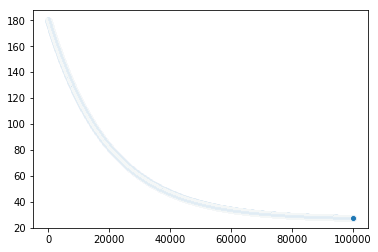

In [11]:
numIterations= 100000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numIterations)